In [1]:
from IPython.display import Audio
import matplotlib.pyplot as plt
import tensorflow as tf
import librosa
import pandas as pd
import numpy as np
import os
import glob
import re
from itertools import islice

In [2]:
db_root = '/home/madhavlab/Thesis_work/Audio Event/Data/Audio_event_all_files/event_detection/dataset'   # add your own database directory path

In [3]:
class log_mel_spec_builder:
    def __init__(self, db_root, sr, n_fft, hop_length, n_mels):
        self.db_root = db_root
        self.sr = sr
        self.n_fft = n_fft
        self.hop_length = hop_length
        self.n_mels = n_mels
        self.all_audio_root = db_root + '/samples'
        self.all_audio_files = sorted(glob.glob(self.all_audio_root + "/*.*"))
        self.logmel_saver_path = os.path.join(db_root, 'melspec_synth')

    
    def x_to_log_mel_spec(self, samples):
        samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)
        samples_log_mel_spec = librosa.power_to_db(samples_mel_spec)   # create log-melspectogram of audio
        return samples_log_mel_spec



    def samples_to_logmel_converter(self):
        audio_samples = []
        count = 0
        for audio in self.all_audio_files:
            audio_name = re.findall('[0-9]+', audio)[0]
            samples,sr = librosa.load(audio,sr=self.sr)

            if samples.shape[0]<(sr*10):        # append zeros if clip duration is less than 10 seconds
                appended_zeros = np.zeros(((sr*10)-samples.shape[0],))
                samples = np.append(samples,appended_zeros,axis=0)
            if samples.shape[0]>(sr*10):
                splitted_samples = np.split(samples,[sr*10])        # crop to 10 sec if clip length is larger
                samples = splitted_samples[0]

            samples_log_mel_spec = self.x_to_log_mel_spec(samples)
            samples_log_mel_spec = np.stack(samples_log_mel_spec)
            audio_samples.append(samples_log_mel_spec)
            count+=1
            print("count: {}, audio-file: {}.wav".format(count, audio_name))
        audio_samples = np.stack(audio_samples,axis=0)
        np.save(self.logmel_saver_path, audio_samples)    # saving all log-melspectogram in npy files
        return audio_samples





    

In [4]:
log_mel_spec = log_mel_spec_builder(db_root, 16000, 640, 320, 64)

In [5]:
audio_log_mel = log_mel_spec.samples_to_logmel_converter()

/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04557873 0.07023945 0.05718752 ... 0.09141885 0.0896569  0.0955753 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1, audio-file: 10.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00318296 0.00324518 0.00130217 ... 0.00592749 0.00552928 0.00632814] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2, audio-file: 1000.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00648442 0.01006515 0.00819195 ... 0.01212985 0.01225479 0.01215454] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 3, audio-file: 1003.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.0106245   0.02542672 -0.00984004 ...  0.00513246  0.01116914
  0.00723151] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 4, audio-file: 1006.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0632398  0.09411392 0.07706834 ... 0.09886071 0.09172451 0.10518639] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 5, audio-file: 1008.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00118792  0.00642642  0.0071201  ... -0.00057055 -0.00018393
 -0.00622847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 6, audio-file: 1009.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00425452 0.00596315 0.00548269 ... 0.00635918 0.0066113  0.00770125] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 7, audio-file: 1011.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0069809  0.01050337 0.00831865 ... 0.01142464 0.01095334 0.01271523] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 8, audio-file: 1012.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00420563  0.0067945   0.00647119 ... -0.00101137 -0.00025797
 -0.00104557] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 9, audio-file: 1014.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04611445 0.07284201 0.06053035 ... 0.0800401  0.07841513 0.08517055] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 10, audio-file: 1018.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.26393127 0.3996196  0.33484557 ... 0.4579524  0.43789747 0.4813576 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 11, audio-file: 1023.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05502621 0.08509637 0.06855103 ... 0.09242102 0.09223854 0.10810658] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 12, audio-file: 1024.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05915606 0.08864859 0.07315344 ... 0.10076498 0.09946414 0.10765982] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 13, audio-file: 1026.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.12951446 0.19433384 0.16698414 ... 0.22293185 0.21306157 0.23399523] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 14, audio-file: 1027.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00173915  0.00315012  0.00229417 ... -0.00071164 -0.00108955
 -0.00106686] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 15, audio-file: 1028.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.43949476 0.6659472  0.5577003  ... 0.7655125  0.731418   0.80208695] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 16, audio-file: 1029.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02631552 0.03923763 0.03234579 ... 0.05003775 0.03513269 0.04727849] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 17, audio-file: 1031.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.07671126 0.11343878 0.09565586 ... 0.12926354 0.12069104 0.13942954] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 18, audio-file: 1032.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00111029 0.00174735 0.00136362 ... 0.00177502 0.00178648 0.00208895] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 19, audio-file: 1034.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0142577  0.02021329 0.01843593 ... 0.02398951 0.02290339 0.02355967] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 20, audio-file: 1037.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0536001  0.08093391 0.06975377 ... 0.10030501 0.09866524 0.10652666] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 21, audio-file: 1038.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.15090345 0.22853324 0.191528   ... 0.27524528 0.26276448 0.28758502] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 22, audio-file: 1041.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05985702 0.08926933 0.07440832 ... 0.10240588 0.09627897 0.10619766] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 23, audio-file: 1043.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[-0.00035778  0.01214152  0.00060062 ...  0.00121774  0.00550793
  0.001291  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 24, audio-file: 1044.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[-0.00043396 -0.00607497 -0.01263535 ...  0.00436268  0.00451252
  0.00451856] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 25, audio-file: 1047.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00628817 0.00948945 0.00794728 ... 0.01027237 0.01003406 0.01115575] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 26, audio-file: 1050.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.24459767 0.36998877 0.3104401  ... 0.4150015  0.3943874  0.4366561 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 27, audio-file: 1051.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05372792 0.08105391 0.07078037 ... 0.08358373 0.07528163 0.08290537] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 28, audio-file: 1053.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00089802 0.00178411 0.00160509 ... 0.00054328 0.00068753 0.00101636] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 29, audio-file: 1056.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00560669 0.00953954 0.00614163 ... 0.01262428 0.01281546 0.01577313] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 30, audio-file: 1057.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01092047 0.01658579 0.01386555 ... 0.01704677 0.01661696 0.01847093] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 31, audio-file: 1058.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00625139 0.00960177 0.00795362 ... 0.01098399 0.01036529 0.01125159] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 32, audio-file: 1059.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05496081 0.08315744 0.06957791 ... 0.09555404 0.09140018 0.10038772] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 33, audio-file: 106.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00470021 0.00721014 0.00618306 ... 0.00871111 0.00812315 0.00886754] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 34, audio-file: 1062.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02355127 0.03678508 0.02860633 ... 0.03959855 0.04106183 0.03942515] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 35, audio-file: 1065.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.23331757 0.3529186  0.2954934  ... 0.40349498 0.3860516  0.42421558] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 36, audio-file: 1067.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00861751 0.01253911 0.01027948 ... 0.01227231 0.00427684 0.01079131] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 37, audio-file: 1068.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01239184 0.01834706 0.015025   ... 0.02142933 0.02178524 0.02282454] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 38, audio-file: 1069.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00182339 0.00281351 0.00251089 ... 0.00102408 0.01311392 0.00716421] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 39, audio-file: 107.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05694302 0.08676888 0.06979244 ... 0.08617721 0.07672511 0.08692273] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 40, audio-file: 1072.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00407102  0.00631419  0.00542299 ...  0.0014186  -0.01133428
  0.01331372] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 41, audio-file: 1073.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05389309 0.0799423  0.06526092 ... 0.08140492 0.07600228 0.0883221 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 42, audio-file: 1076.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04502953 0.06937108 0.06021257 ... 0.08617949 0.08540718 0.09293155] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 43, audio-file: 1077.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01578342 0.02260056 0.0169495  ... 0.02807345 0.02931729 0.02975622] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 44, audio-file: 1078.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02359236 0.03530567 0.03002742 ... 0.03871161 0.03764741 0.04007922] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 45, audio-file: 1085.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00529254 0.00806482 0.00655889 ... 0.00702827 0.00508584 0.00617618] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 46, audio-file: 1086.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.43654558 0.6616561  0.5542338  ... 0.7538512  0.7215559  0.79395473] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 47, audio-file: 1087.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05719126 0.08690918 0.07306893 ... 0.09921636 0.09506115 0.1043496 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 48, audio-file: 1088.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03268856 0.04880858 0.04116008 ... 0.05847644 0.05525012 0.06094817] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 49, audio-file: 1090.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05376827 0.08382352 0.07240675 ... 0.0942683  0.09140304 0.09977932] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 50, audio-file: 1092.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00103453 0.00147187 0.00144865 ... 0.00059619 0.00146292 0.00097892] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 51, audio-file: 1093.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04019014 0.0612885  0.04790073 ... 0.06804807 0.06485033 0.07163785] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 52, audio-file: 1096.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00094394 0.00140823 0.00119238 ... 0.00183055 0.00176178 0.00190388] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 53, audio-file: 1099.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.31941107 0.4833873  0.40555593 ... 0.5540093  0.52624756 0.5844927 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 54, audio-file: 110.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.09430873 0.14479595 0.11983781 ... 0.16334823 0.15530254 0.17048164] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 55, audio-file: 1106.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01057979 0.0150619  0.01124981 ... 0.01809972 0.01328025 0.01612258] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 56, audio-file: 1107.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01389551 0.01758953 0.01224844 ... 0.02258985 0.01998815 0.0240518 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 57, audio-file: 1112.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05704886 0.0845771  0.06696295 ... 0.08802778 0.08343077 0.09431534] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 58, audio-file: 1113.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05115854 0.07749554 0.06489353 ... 0.08857151 0.08523975 0.09319213] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 59, audio-file: 1116.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.3768777 0.570472  0.4779652 ... 0.6481819 0.6195767 0.6819844] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 60, audio-file: 1119.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0644757  0.09922743 0.08251528 ... 0.09717397 0.09327377 0.10377716] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 61, audio-file: 112.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02239142 0.03466328 0.02775788 ... 0.04067321 0.03737354 0.04017243] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 62, audio-file: 1121.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.34581167 0.5245114  0.43984702 ... 0.5857459  0.56206584 0.6157342 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 63, audio-file: 1123.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0020258  0.00319418 0.00308219 ... 0.00793813 0.00727833 0.00631853] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 64, audio-file: 1125.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05276103 0.07988273 0.06697011 ... 0.09223881 0.08768606 0.09652054] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 65, audio-file: 1127.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01902098 0.0321416  0.02736467 ... 0.03695239 0.03155251 0.04418085] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 66, audio-file: 1128.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00279862  0.00441718  0.00370904 ... -0.00065508  0.00528317
  0.01800052] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 67, audio-file: 1130.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02249329 0.03418375 0.03099171 ... 0.03806203 0.03509706 0.03895654] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 68, audio-file: 1131.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00075613  0.00125415  0.00109824 ... -0.00440668 -0.00478854
  0.00451131] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 69, audio-file: 1136.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.18064098 0.27347437 0.2288629  ... 0.31441456 0.30752563 0.334814  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 70, audio-file: 1137.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02224957 0.03405388 0.03168924 ... 0.04395024 0.04427278 0.04708982] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 71, audio-file: 1139.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00101283 0.00140896 0.00118295 ... 0.00955328 0.00752773 0.00723623] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 72, audio-file: 1140.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0002288  0.00034789 0.00030387 ... 0.00037077 0.00051537 0.00054447] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 73, audio-file: 1142.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00157744 0.00274171 0.00313506 ... 0.00246964 0.00251146 0.00264042] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 74, audio-file: 1143.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02389135 0.03576919 0.02916512 ... 0.04476047 0.04580181 0.05352769] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 75, audio-file: 1144.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00452615 0.0061959  0.00805616 ... 0.00919188 0.00801034 0.009498  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 76, audio-file: 1145.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03603629 0.05460093 0.04561687 ... 0.06000247 0.05394715 0.06072403] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 77, audio-file: 1146.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00680056 0.01057013 0.00851619 ... 0.01472225 0.01419555 0.01532566] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 78, audio-file: 1147.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05167007 0.07760097 0.0617076  ... 0.0851946  0.07987779 0.08782334] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 79, audio-file: 1150.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0109363  0.01693052 0.01598298 ... 0.04403006 0.03133895 0.01651035] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 80, audio-file: 1151.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00077601 0.00116015 0.00086713 ... 0.00147798 0.00155052 0.00155057] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 81, audio-file: 1152.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.06826442 0.10490406 0.08720788 ... 0.11911973 0.11544966 0.12643564] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 82, audio-file: 1153.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00218571  0.00330911  0.00234115 ... -0.00992116 -0.00676872
 -0.01201318] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 83, audio-file: 1154.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00314696 0.00556272 0.00389599 ... 0.00548353 0.00603835 0.00755237] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 84, audio-file: 1155.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00596706  0.00910396  0.00732368 ...  0.00685382 -0.00059116
  0.00040443] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 85, audio-file: 1157.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0172341  0.02626308 0.02194499 ... 0.02987633 0.02750169 0.04016691] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 86, audio-file: 1158.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.11047044 0.16739488 0.14032356 ... 0.19060974 0.18234079 0.19999988] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 87, audio-file: 1160.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.09577336 0.14564155 0.11677765 ... 0.16321327 0.15544872 0.17117153] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 88, audio-file: 1161.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02417306 0.03550228 0.03017753 ... 0.03830348 0.03661582 0.04107277] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 89, audio-file: 1163.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00966041 0.01467454 0.01217407 ... 0.02271665 0.01512749 0.01300839] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 90, audio-file: 1165.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.2610802  0.39535263 0.33171362 ... 0.4536471  0.43324652 0.4765929 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 91, audio-file: 1166.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0585387  0.09013069 0.07638783 ... 0.09781854 0.09656957 0.10063301] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 92, audio-file: 1167.wav
count: 93, audio-file: 1168.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00108951 0.00166603 0.00137973 ... 0.00293718 0.00116399 0.00229062] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 94, audio-file: 117.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02281839 0.03462892 0.02988781 ... 0.04865369 0.04623433 0.04816664] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 95, audio-file: 1170.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00702705  0.01025884  0.00872249 ...  0.02030386 -0.0067736
  0.01360786] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 96, audio-file: 1171.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00271482  0.00444918  0.0037242  ... -0.00194764 -0.00291122
 -0.00155644] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 97, audio-file: 1173.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00547342 0.00838262 0.00716514 ... 0.01507668 0.01347123 0.0135551 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 98, audio-file: 1175.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00425452 0.00596315 0.00548269 ... 0.00515204 0.00331522 0.00412133] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 99, audio-file: 1176.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.18462977 0.2722771  0.23515002 ... 0.31898248 0.30236286 0.33457348] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 100, audio-file: 1177.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03544316 0.05310724 0.04255983 ... 0.06440959 0.06294522 0.0687601 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 101, audio-file: 118.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05392399 0.07832605 0.06339014 ... 0.09297059 0.08887877 0.09677437] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 102, audio-file: 1182.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00531295 0.0078871  0.00650729 ... 0.01077707 0.00996601 0.01167721] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 103, audio-file: 1184.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00372455 0.00481804 0.00402192 ... 0.0101029  0.00955532 0.01000622] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 104, audio-file: 1186.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04277021 0.06523937 0.05090713 ... 0.07554296 0.07210694 0.07881253] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 105, audio-file: 1189.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01151449 0.01729765 0.01427486 ... 0.02582871 0.02544507 0.02519947] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 106, audio-file: 119.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03360032 0.04951118 0.04191563 ... 0.05181262 0.05131454 0.05639908] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 107, audio-file: 1190.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03998579 0.06054044 0.05075504 ... 0.07128444 0.06708552 0.07273493] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 108, audio-file: 1191.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04836218 0.07598656 0.06180808 ... 0.07950187 0.07531343 0.07805084] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 109, audio-file: 1193.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03916399 0.0607793  0.05078214 ... 0.05828964 0.05633548 0.05623662] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 110, audio-file: 1196.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00392938 0.00572858 0.00461758 ... 0.01065354 0.0060055  0.00298611] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 111, audio-file: 1197.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04683012 0.07130864 0.05983268 ... 0.08431842 0.08183605 0.09047353] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 112, audio-file: 1198.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0512929  0.07430804 0.0612017  ... 0.08902525 0.08347094 0.09141669] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 113, audio-file: 1199.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02294066 0.03432164 0.03062135 ... 0.04027808 0.04606942 0.04591838] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 114, audio-file: 12.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02352237 0.03419729 0.02856939 ... 0.0383038  0.03502962 0.04143644] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 115, audio-file: 1200.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04013841 0.05934145 0.05170091 ... 0.06082684 0.05712377 0.06652903] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 116, audio-file: 1202.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04256736 0.06398206 0.05500735 ... 0.07437545 0.07377599 0.08289375] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 117, audio-file: 1203.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02822284 0.04285348 0.03608174 ... 0.05255897 0.05043234 0.05520398] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 118, audio-file: 1204.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00167475 0.00191671 0.00170017 ... 0.00362548 0.00350759 0.00369563] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 119, audio-file: 1205.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.18462977 0.2722771  0.23515002 ... 0.31515166 0.30039293 0.33332726] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 120, audio-file: 1207.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00636254 0.00878208 0.00821756 ... 0.01149817 0.01067283 0.01188887] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 121, audio-file: 1208.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00435358 0.00661626 0.00541533 ... 0.00652674 0.00884028 0.01453801] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 122, audio-file: 1209.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0436541  0.06739025 0.05710098 ... 0.08489782 0.07261682 0.07589803] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 123, audio-file: 121.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0035046  0.00533602 0.00431074 ... 0.00611881 0.00603463 0.0064582 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 124, audio-file: 1210.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00628817 0.00948945 0.00794728 ... 0.01236959 0.01212542 0.01334632] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 125, audio-file: 1211.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.18524921 0.27981588 0.23403965 ... 0.31757927 0.307133   0.3397676 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 126, audio-file: 1213.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.21724084 0.32914206 0.27582285 ... 0.37629718 0.3593747  0.39518768] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 127, audio-file: 1215.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01505404 0.0249355  0.02041503 ... 0.01376868 0.02807662 0.03449389] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 128, audio-file: 1216.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.34896532 0.5274489  0.4426896  ... 0.60305536 0.57747555 0.63535744] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 129, audio-file: 1218.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00061251 0.00108201 0.0011273  ... 0.00158336 0.00163529 0.00175848] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 130, audio-file: 1220.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00347172  0.00495112  0.00416123 ... -0.00569413  0.00959089
  0.00279786] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 131, audio-file: 1221.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05783378 0.09010467 0.0768283  ... 0.10890949 0.10274298 0.11319443] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 132, audio-file: 1222.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0049164  0.00754642 0.00620653 ... 0.00798398 0.00709197 0.0067046 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 133, audio-file: 1223.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00196298 0.00284497 0.00221774 ... 0.00215569 0.0026899  0.00577548] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 134, audio-file: 1226.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.132178   0.19763145 0.1699843  ... 0.21709006 0.20669049 0.2271112 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 135, audio-file: 1227.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.34581167 0.5245114  0.43984702 ... 0.5886847  0.5618574  0.61966807] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 136, audio-file: 123.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03975142 0.06012427 0.05042894 ... 0.06428379 0.06181772 0.06674895] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 137, audio-file: 1230.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00035978 0.00051912 0.00043833 ... 0.03332264 0.03779134 0.03623525] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 138, audio-file: 1232.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01583537 0.02256043 0.01939566 ... 0.02848935 0.03081923 0.03388309] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 139, audio-file: 1233.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01113113 0.01754134 0.01473919 ... 0.02263564 0.02298761 0.02416578] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 140, audio-file: 1234.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0042577  0.00644485 0.00516943 ... 0.00323133 0.00510344 0.00648944] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 141, audio-file: 1235.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02056705 0.03160974 0.02745299 ... 0.02682027 0.02280025 0.02797733] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 142, audio-file: 1236.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.06220709 0.09488031 0.08022316 ... 0.09345928 0.08803363 0.10410791] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 143, audio-file: 1237.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00386327 0.00875125 0.00194212 ... 0.00724991 0.00720792 0.00719775] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 144, audio-file: 1238.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01967712 0.02993769 0.02481829 ... 0.04128753 0.03822735 0.03730628] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 145, audio-file: 1239.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00089891 0.00139329 0.00115987 ... 0.00701625 0.0061507  0.00615127] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 146, audio-file: 124.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00682025 0.0102529  0.00871759 ... 0.01375491 0.01496614 0.01671411] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 147, audio-file: 1240.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04389654 0.0678187  0.05430454 ... 0.07586426 0.07393347 0.07984544] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 148, audio-file: 1241.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03975142 0.06012427 0.05042894 ... 0.07962101 0.07531834 0.07979959] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 149, audio-file: 1243.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00488253 0.00672474 0.00352573 ... 0.00705274 0.00706882 0.00732917] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 150, audio-file: 1244.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0372393  0.05802797 0.0468837  ... 0.06485535 0.06313755 0.06842477] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 151, audio-file: 1246.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01582687 0.02400409 0.02018858 ... 0.02883458 0.02453341 0.02927814] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 152, audio-file: 1247.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00254448 0.00379953 0.00315276 ... 0.00461214 0.00434995 0.00411899] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 153, audio-file: 125.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05048395 0.0777899  0.06680502 ... 0.0799094  0.07765294 0.08890215] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 154, audio-file: 1250.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.43654558 0.6616561  0.5542338  ... 0.7409663  0.7248905  0.80583864] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 155, audio-file: 1252.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00110348 0.00156962 0.00123221 ... 0.00356825 0.00365732 0.0017963 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 156, audio-file: 1253.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00495249 0.00727114 0.00612047 ... 0.00792054 0.00745618 0.00760867] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 157, audio-file: 1254.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00144037  0.00177615  0.00196421 ...  0.00296023  0.00097989
 -0.00108572] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 158, audio-file: 1256.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05116749 0.0770639  0.06245833 ... 0.08757906 0.08382297 0.09362911] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 159, audio-file: 1257.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01778365 0.02490008 0.02215626 ... 0.032498   0.0307484  0.03463295] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 160, audio-file: 1258.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05491999 0.08588997 0.07357599 ... 0.08196254 0.07572736 0.0890448 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 161, audio-file: 1259.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01682086 0.02551404 0.02165125 ... 0.03024436 0.02819036 0.02954789] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 162, audio-file: 126.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01560584 0.02305918 0.01930808 ... 0.02733734 0.02445264 0.02727191] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 163, audio-file: 1260.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0489672  0.0756608  0.06337994 ... 0.07821012 0.07207968 0.0825473 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 164, audio-file: 1261.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00818474 0.01243178 0.01040993 ... 0.00771003 0.01436161 0.01313722] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 165, audio-file: 1262.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00818474 0.01243178 0.01040993 ... 0.01409479 0.01346557 0.01484375] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 166, audio-file: 1264.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01640479 0.02546217 0.02095016 ... 0.02758627 0.02706694 0.02994853] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 167, audio-file: 1265.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.16439866 0.24929187 0.2088995  ... 0.2698935  0.25843224 0.2819149 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 168, audio-file: 1268.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00633222 -0.00196066  0.00340282 ...  0.00986562  0.00944065
  0.0108225 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 169, audio-file: 1272.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.1870529  0.28265545 0.23719074 ... 0.32288316 0.3098348  0.33542722] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 170, audio-file: 1274.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00495249 0.00727114 0.00612047 ... 0.00667574 0.00605097 0.00671616] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 171, audio-file: 1275.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05175194 0.0770265  0.06221089 ... 0.08623087 0.08592119 0.09311022] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 172, audio-file: 1276.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0109363  0.01693052 0.01598298 ... 0.01520798 0.01379749 0.01009904] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 173, audio-file: 1277.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02248258 0.03739589 0.03185571 ... 0.04527062 0.04425425 0.04690753] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 174, audio-file: 1278.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0644757  0.09922743 0.08251528 ... 0.0958157  0.09162563 0.10497303] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 175, audio-file: 1279.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00838682 0.01304478 0.01154034 ... 0.00508434 0.00475688 0.00618604] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 176, audio-file: 128.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00075613  0.00125415  0.00109824 ... -0.00175557 -0.00079325
  0.01009863] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 177, audio-file: 1281.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00656169 0.00999859 0.00807607 ... 0.01042789 0.00958127 0.01065613] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 178, audio-file: 1286.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01187341 0.018523   0.01505909 ... 0.02421472 0.02229692 0.02577976] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 179, audio-file: 1287.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0415697  0.06178158 0.05432529 ... 0.08484714 0.07477705 0.07131161] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 180, audio-file: 1288.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.06370426 0.09402653 0.07732499 ... 0.09837376 0.09584806 0.1074939 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 181, audio-file: 129.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01239184 0.01834706 0.015025   ... 0.02353536 0.01850501 0.01744103] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 182, audio-file: 1292.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04910225 0.07319674 0.05900053 ... 0.09014962 0.08497682 0.09242269] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 183, audio-file: 1293.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05635437 0.08447452 0.06942394 ... 0.104638   0.09791594 0.10720278] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 184, audio-file: 1294.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04996653 0.07510942 0.06168719 ... 0.08729421 0.08336303 0.08994068] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 185, audio-file: 1295.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.41363272 0.62563246 0.5250398  ... 0.7146651  0.68406206 0.7520063 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 186, audio-file: 1299.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04933554 0.07475717 0.06258077 ... 0.08959816 0.09008369 0.0970208 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 187, audio-file: 130.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04621329 0.06986923 0.06026237 ... 0.08917759 0.07777514 0.06955457] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 188, audio-file: 1302.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01068365 0.0163025  0.01335061 ... 0.01132111 0.00821862 0.01542288] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 189, audio-file: 1305.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00165507  0.00309662  0.00263125 ... -0.00170618 -0.000846
  0.00584346] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 190, audio-file: 1307.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00287184  0.00436461  0.00387198 ... -0.01044057 -0.00480698
 -0.00216273] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 191, audio-file: 1309.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.06923328 0.10389126 0.08734269 ... 0.11960934 0.11355784 0.12595487] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 192, audio-file: 131.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.36636403 0.55534136 0.4660918  ... 0.6284771  0.6004534  0.66153663] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 193, audio-file: 1310.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.39116138 0.59269416 0.49675736 ... 0.679114   0.6480674  0.71180457] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 194, audio-file: 1314.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05175194 0.0770265  0.06221089 ... 0.08624242 0.08594044 0.09440666] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 195, audio-file: 1315.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00115422  0.00175964  0.00141252 ... -0.00239989 -0.00321321
 -0.00173354] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 196, audio-file: 1316.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00469694  0.00739745  0.0062033  ...  0.0014745  -0.00224187
  0.00241132] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 197, audio-file: 1318.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0011664  0.00177236 0.00140626 ... 0.00214102 0.00210555 0.00224342] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 198, audio-file: 1321.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.11812112 0.1805504  0.15439291 ... 0.2079857  0.20222592 0.22308452] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 199, audio-file: 1323.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01323927 0.01999528 0.01779554 ... 0.02800833 0.02643346 0.02759483] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 200, audio-file: 1324.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02866999 0.04314128 0.03772887 ... 0.04722743 0.04991224 0.05226415] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 201, audio-file: 1328.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.40930355 0.6195463  0.5187315  ... 0.72407    0.694858   0.7642229 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 202, audio-file: 1329.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05712511 0.08873578 0.07553465 ... 0.1040973  0.0993494  0.11427426] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 203, audio-file: 133.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0471327  0.07103501 0.05656949 ... 0.08666486 0.08383103 0.09360063] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 204, audio-file: 1330.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05792617 0.08679678 0.07505472 ... 0.09437986 0.09182117 0.1092572 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 205, audio-file: 1331.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.01142353  0.0165093   0.01600526 ...  0.01317498  0.00270258
 -0.00799695] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 206, audio-file: 1332.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00075613  0.00125415  0.00109824 ... -0.00477216 -0.00516828
  0.00400486] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 207, audio-file: 1333.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00443684 0.00679568 0.00560259 ... 0.00715817 0.00662356 0.00762061] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 208, audio-file: 1334.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.35536212 0.53786623 0.45106003 ... 0.6175702  0.5893799  0.64785194] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 209, audio-file: 1337.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04500873 0.06725897 0.0558815  ... 0.07993807 0.07366367 0.08023562] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 210, audio-file: 1338.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0154789  0.02216917 0.02154328 ... 0.02721295 0.02512936 0.02989276] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 211, audio-file: 1339.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01009057 0.0152717  0.01282068 ... 0.00831816 0.01795507 0.01801503] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 212, audio-file: 1342.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01298057 0.02172485 0.01675355 ... 0.02309516 0.02162362 0.02314939] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 213, audio-file: 1343.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00157817 0.00247413 0.00186924 ... 0.0022786  0.00038763 0.00200309] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 214, audio-file: 1347.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.22304627 0.33819947 0.28299308 ... 0.38569745 0.36868384 0.4056119 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 215, audio-file: 1348.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02089385 0.02827977 0.02699333 ... 0.03968426 0.03744033 0.03992578] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 216, audio-file: 135.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00616853 0.00910516 0.00751189 ... 0.03971554 0.02798605 0.02439312] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 217, audio-file: 1350.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01782115 0.02783291 0.02221174 ... 0.02914633 0.02778302 0.02368029] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 218, audio-file: 1351.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.42592144 0.646054   0.5411131  ... 0.73214585 0.6985769  0.7683936 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 219, audio-file: 1352.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.21674426 0.32837385 0.2751887  ... 0.3753231  0.35522935 0.4010278 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 220, audio-file: 1353.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04491106 0.0679036  0.05931694 ... 0.0832635  0.07690515 0.07369928] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 221, audio-file: 1354.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04950886 0.07487584 0.06147534 ... 0.0912482  0.09177032 0.09752784] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 222, audio-file: 1355.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00531295 0.0078871  0.00650729 ... 0.01077666 0.0099663  0.011677  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 223, audio-file: 1357.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00378094 0.00568885 0.00497433 ... 0.01131385 0.01071782 0.01246942] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 224, audio-file: 1358.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00744406 0.01119853 0.00999971 ... 0.00930398 0.00782056 0.00902817] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 225, audio-file: 1361.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03495872 0.05366593 0.04424135 ... 0.06985898 0.06486233 0.07467066] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 226, audio-file: 1362.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00643336 0.0095477  0.00800689 ... 0.01721829 0.01342253 0.01190173] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 227, audio-file: 1363.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01667393 0.02602946 0.02167276 ... 0.03135196 0.03116509 0.03346252] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 228, audio-file: 1364.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00941434 0.01439175 0.01258918 ... 0.01879729 0.01665825 0.01775773] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 229, audio-file: 1365.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00639771 0.00942279 0.00828738 ... 0.00973763 0.01073065 0.01145589] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 230, audio-file: 1366.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00122533 0.00201064 0.0018579  ... 0.00279488 0.00271542 0.00249531] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 231, audio-file: 1367.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00125222  0.00182725  0.00141649 ... -0.0034631  -0.00246947
  0.00260605] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 232, audio-file: 1369.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0133944  0.02207804 0.01916689 ... 0.01925443 0.01678208 0.02018395] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 233, audio-file: 137.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00678987 0.00987748 0.0068706  ... 0.01494264 0.01309885 0.01447691] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 234, audio-file: 1370.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0018686  0.00282007 0.0022572  ... 0.0034839  0.00337681 0.00374587] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 235, audio-file: 1371.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04368955 0.06532966 0.05188601 ... 0.05457421 0.04930411 0.06093559] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 236, audio-file: 1377.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00486383 0.00796682 0.00748871 ... 0.00938214 0.00903405 0.00982434] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 237, audio-file: 1378.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04122336 0.05909159 0.04836392 ... 0.05115407 0.04418848 0.05318869] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 238, audio-file: 138.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01719177 0.02627425 0.02216353 ... 0.02658786 0.02755575 0.03122695] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 239, audio-file: 1380.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00088144 0.00107222 0.00119915 ... 0.00135799 0.00173968 0.0020615 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 240, audio-file: 1381.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00101283 0.00140896 0.00118295 ... 0.00906238 0.00705656 0.00674867] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 241, audio-file: 1385.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00616853 0.00910516 0.00751189 ... 0.01167855 0.00973384 0.01091758] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 242, audio-file: 1386.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01381203 0.02170253 0.01720366 ... 0.03370156 0.03286092 0.03536387] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 243, audio-file: 1387.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.4332701  0.65624875 0.5495551  ... 0.7499962  0.71554655 0.786021  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 244, audio-file: 139.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01610603 0.02532328 0.02105999 ... 0.03699443 0.03278537 0.03203697] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 245, audio-file: 1391.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05330787 0.08044729 0.06654415 ... 0.08813814 0.08454714 0.09455719] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 246, audio-file: 1392.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00812167 0.01235589 0.01038184 ... 0.01108773 0.00970079 0.01147264] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 247, audio-file: 1395.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00469694 0.00739745 0.0062033  ... 0.00656593 0.00495859 0.00752919] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 248, audio-file: 1397.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.09577336 0.14564155 0.11677765 ... 0.16839638 0.16533546 0.17837211] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 249, audio-file: 1399.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01074905 0.0078714  0.00486124 ... 0.01028227 0.01028921 0.01294894] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 250, audio-file: 140.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01246459 0.01877679 0.01557818 ... 0.02022636 0.01942188 0.01206172] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 251, audio-file: 1404.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00084638  0.00129571  0.00107202 ... -0.01254531 -0.01298675
  0.00745195] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 252, audio-file: 1405.wav
count: 253, audio-file: 1409.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00861956 0.01318767 0.01063985 ... 0.01588103 0.01561297 0.01654219] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 254, audio-file: 1414.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00553124 0.00803235 0.00678747 ... 0.009134   0.00869785 0.01030955] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 255, audio-file: 1415.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0172341  0.02626308 0.02194499 ... 0.02278946 0.02179186 0.02557289] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 256, audio-file: 1418.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03883689 0.05818455 0.04686138 ... 0.06202725 0.06095459 0.06560483] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 257, audio-file: 142.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04005209 0.06334882 0.05202379 ... 0.06417611 0.06015849 0.06297983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 258, audio-file: 1420.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04965473 0.07280403 0.06091766 ... 0.09086473 0.08862339 0.09816758] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 259, audio-file: 1421.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02706374 0.04071037 0.03570981 ... 0.05022453 0.04947664 0.05164613] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 260, audio-file: 1422.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04252637 0.06476572 0.05229155 ... 0.06844177 0.06682129 0.07170036] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 261, audio-file: 1423.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.12564367 0.19031347 0.1595752  ... 0.23187654 0.21235697 0.2273558 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 262, audio-file: 1424.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00424008  0.00712623  0.00691854 ...  0.00551682  0.00482791
 -0.00093607] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 263, audio-file: 1425.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00089208 0.00134075 0.00113085 ... 0.00019428 0.00053116 0.00240207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 264, audio-file: 1428.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.3447181  0.5217257  0.43706512 ... 0.5860882  0.5535607  0.60702056] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 265, audio-file: 1429.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00570014 0.0085877  0.00757679 ... 0.0115558  0.01097395 0.01304215] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 266, audio-file: 143.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0276043  0.04185588 0.03506706 ... 0.0478035  0.04582514 0.05032511] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 267, audio-file: 1430.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03468047 0.05240378 0.04380632 ... 0.05796351 0.05519773 0.06084231] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 268, audio-file: 1433.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00094394  0.00140823  0.00119238 ...  0.00646072 -0.00188023
 -0.00118039] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 269, audio-file: 1434.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00039943 0.00095132 0.00180852 ... 0.00148321 0.0014816  0.00142824] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 270, audio-file: 1435.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00647438  0.00924305  0.00916779 ... -0.01480488 -0.01376614
 -0.00846132] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 271, audio-file: 1436.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03371081 0.04915025 0.04076248 ... 0.0527582  0.04986938 0.05371851] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 272, audio-file: 1437.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00632964 0.00687761 0.00508989 ... 0.01638135 0.01762824 0.02253608] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 273, audio-file: 1438.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.132178   0.19763145 0.1699843  ... 0.22916089 0.21843378 0.23996621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 274, audio-file: 1440.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01499863 0.02167001 0.01688474 ... 0.02457539 0.02395439 0.02623673] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 275, audio-file: 1443.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00158235  0.00219988  0.00171175 ... -0.00077563  0.00115925
  0.00262368] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 276, audio-file: 1444.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03224514 0.04895588 0.04036226 ... 0.05201516 0.05144287 0.06145791] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 277, audio-file: 1445.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00243591 -0.00011812  0.00190292 ...  0.00393202  0.00316367
  0.00451461] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 278, audio-file: 1446.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04621329 0.06986923 0.06026237 ... 0.07717016 0.07419117 0.08544774] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 279, audio-file: 1447.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.08492454 0.13135016 0.1101931  ... 0.151129   0.1453682  0.15879354] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 280, audio-file: 1448.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.4084495 0.6181242 0.5179184 ... 0.7074248 0.6763067 0.7440541] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 281, audio-file: 1449.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00314772 0.00462277 0.00474884 ... 0.00324532 0.00264871 0.00348013] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 282, audio-file: 145.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.09730666 0.14740133 0.12402408 ... 0.16817652 0.16040307 0.17656876] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 283, audio-file: 1450.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.43951213 0.66505736 0.55694795 ... 0.7892879  0.7534454  0.82269514] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 284, audio-file: 1451.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00838682 0.01304478 0.01154034 ... 0.00980331 0.00843965 0.00979131] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 285, audio-file: 1453.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0195843  0.02898432 0.02306641 ... 0.0476674  0.03547854 0.03467682] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 286, audio-file: 1454.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.12521535 0.18966313 0.15817942 ... 0.21317068 0.20313613 0.22437063] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 287, audio-file: 1455.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.33721873 0.5099585  0.42769766 ... 0.5830257  0.55738044 0.6134199 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 288, audio-file: 1456.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02924622 0.04558391 0.0363854  ... 0.04939625 0.04728973 0.05468819] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 289, audio-file: 1458.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02335116 0.03541835 0.02869537 ... 0.04028948 0.03820053 0.04170402] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 290, audio-file: 146.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0167948  0.02543522 0.02081433 ... 0.02612081 0.02652812 0.03074168] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 291, audio-file: 1461.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00819419 0.01311723 0.01114197 ... 0.01718562 0.0165783  0.01753382] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 292, audio-file: 1463.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04006066 0.06170886 0.05258323 ... 0.07693058 0.0762554  0.07818645] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 293, audio-file: 1464.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04125767 0.06370896 0.05216006 ... 0.0760565  0.07303137 0.07893701] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 294, audio-file: 1465.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.16174039 0.24542898 0.20563534 ... 0.28309673 0.2686349  0.29508948] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 295, audio-file: 1467.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05973956 0.09180353 0.0752499  ... 0.10639982 0.1024091  0.11725804] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 296, audio-file: 1468.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00258967 0.00387079 0.00342375 ... 0.00742464 0.00894889 0.00898698] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 297, audio-file: 1474.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00118792 0.00642642 0.0071201  ... 0.00478068 0.00688329 0.00437819] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 298, audio-file: 1475.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05394594 0.08006463 0.06870963 ... 0.08520055 0.0828387  0.09084414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 299, audio-file: 1476.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00112196 0.00184699 0.00151511 ... 0.00144703 0.00160265 0.00175484] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 300, audio-file: 1479.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05694302 0.08676888 0.06979244 ... 0.08585707 0.0772517  0.08737909] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 301, audio-file: 148.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05552365 0.08443064 0.07096241 ... 0.09721045 0.09106675 0.09818105] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 302, audio-file: 1482.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02577945 0.04047117 0.03268719 ... 0.05749142 0.05598544 0.05979997] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 303, audio-file: 1486.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.4265268  0.64531624 0.54039705 ... 0.73469156 0.7021337  0.77218455] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 304, audio-file: 1487.wav
count: 305, audio-file: 1488.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03856664 0.0573248  0.05055925 ... 0.05861384 0.05453973 0.06055964] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 306, audio-file: 1489.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00799715 0.01202555 0.01001906 ... 0.00596754 0.00512667 0.00791436] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 307, audio-file: 149.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05749798 0.08812384 0.0754439  ... 0.10000785 0.09293203 0.10348581] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 308, audio-file: 1491.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00122127  0.00185039  0.00148036 ...  0.01046173 -0.00594227
 -0.01616509] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 309, audio-file: 1492.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.06842615 0.10295992 0.08522973 ... 0.12983322 0.12534271 0.1368849 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 310, audio-file: 1493.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04017236 0.06072614 0.05085246 ... 0.06941346 0.06553039 0.07291896] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 311, audio-file: 1494.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03544316 0.05310724 0.04255983 ... 0.07769253 0.07421776 0.07588789] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 312, audio-file: 1497.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00553643 0.0084789  0.00714377 ... 0.00865806 0.00928566 0.00772992] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 313, audio-file: 1499.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01889755 0.02866598 0.02407845 ... 0.02774108 0.02538137 0.03093636] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 314, audio-file: 150.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.07124038 0.10797302 0.09043776 ... 0.04907043 0.03180926 0.04941685] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 315, audio-file: 1500.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.06603644 0.10013606 0.08387357 ... 0.11431409 0.1093077  0.12011883] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 316, audio-file: 1502.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04953655 0.07793172 0.06317449 ... 0.08161002 0.07913506 0.0853452 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 317, audio-file: 1503.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.10041958 0.1521737  0.12720472 ... 0.17389241 0.16619721 0.18257976] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 318, audio-file: 1504.wav
count: 319, audio-file: 1507.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0014414  0.00174925 0.00182882 ... 0.00229392 0.0025886  0.00312758] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 320, audio-file: 1510.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03900117 0.05920882 0.04888334 ... 0.10197421 0.05598016 0.062745  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 321, audio-file: 1511.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.18829481 0.28460225 0.23827222 ... 0.3213188  0.30701724 0.3390619 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 322, audio-file: 1513.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0436541  0.06739025 0.05710098 ... 0.075325   0.07380366 0.07898373] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 323, audio-file: 1514.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01003137 0.0235066  0.02861215 ... 0.01827604 0.01958824 0.02024772] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 324, audio-file: 1515.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01866027 0.02844528 0.02326073 ... 0.03171591 0.03107497 0.03428351] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 325, audio-file: 1516.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00228354 0.0034935  0.00271818 ... 0.00476244 0.00492428 0.00517801] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 326, audio-file: 1517.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01711357 0.02643067 0.02058611 ... 0.0260307  0.02277976 0.02799205] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 327, audio-file: 1518.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00407275 0.00643627 0.00551133 ... 0.00682616 0.0075921  0.00778167] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 328, audio-file: 1519.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0184976  0.02727984 0.02164905 ... 0.02505366 0.02009052 0.02240429] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 329, audio-file: 1521.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01762317 0.02689576 0.02264494 ... 0.02538341 0.02327384 0.02659171] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 330, audio-file: 1522.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00554385 0.0084436  0.00686968 ... 0.01180821 0.00839547 0.00261359] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 331, audio-file: 1523.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01178931 0.01818089 0.01516141 ... 0.01214614 0.01321461 0.01361448] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 332, audio-file: 1524.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.014498   0.02256084 0.0193332  ... 0.02985764 0.02965902 0.02996236] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 333, audio-file: 1525.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02993194 0.04564034 0.04011807 ... 0.05377068 0.04912332 0.05773805] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 334, audio-file: 1527.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0353897  0.05190703 0.04267578 ... 0.07530269 0.07026308 0.07641143] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 335, audio-file: 1529.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.20231451 0.30656466 0.25736353 ... 0.35091126 0.33448464 0.36770177] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 336, audio-file: 1530.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04953655 0.07793172 0.06317449 ... 0.08155387 0.07905444 0.08521748] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 337, audio-file: 1531.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04974118 0.07371736 0.06090197 ... 0.08316884 0.08026401 0.08793924] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 338, audio-file: 1532.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0179655  0.02900573 0.02524336 ... 0.0276101  0.02358533 0.02812634] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 339, audio-file: 1533.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03739775 0.05591843 0.04568082 ... 0.07283012 0.06911542 0.07431554] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 340, audio-file: 1535.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00435307 0.00647289 0.0053398  ... 0.00250061 0.00183641 0.00284948] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 341, audio-file: 1536.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04780459 0.07233717 0.0606004  ... 0.08284637 0.07862016 0.08717108] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 342, audio-file: 1537.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01517217 0.02490583 0.02042571 ... 0.0354546  0.03422017 0.03671422] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 343, audio-file: 1538.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00394122 0.00616705 0.00849177 ... 0.01300736 0.01478582 0.01665686] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 344, audio-file: 1539.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.37649238 0.5700085  0.47817293 ... 0.6517692  0.61888206 0.6844492 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 345, audio-file: 1541.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.033852   0.05203499 0.04417536 ... 0.04952426 0.04681041 0.05216209] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 346, audio-file: 1542.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.13386492 0.19934319 0.16729005 ... 0.22921051 0.2185305  0.24098471] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 347, audio-file: 1544.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00999203  0.01485297  0.0108312  ...  0.00051308 -0.00037649
  0.00148328] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 348, audio-file: 1545.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.2679074  0.40573853 0.34027967 ... 0.46283212 0.4427289  0.48654836] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 349, audio-file: 1546.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01522378 0.02347726 0.01937418 ... 0.02405006 0.02337838 0.02487109] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 350, audio-file: 1547.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03998579 0.06054044 0.05075504 ... 0.06929796 0.06615344 0.0727308 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 351, audio-file: 1548.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0011953  0.00180692 0.00139976 ... 0.0027211  0.00267006 0.00263761] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 352, audio-file: 155.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04478968 0.06668594 0.05692212 ... 0.08212075 0.07870882 0.08510229] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 353, audio-file: 1550.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0103615  0.01785394 0.0185285  ... 0.01565569 0.01405366 0.01529279] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 354, audio-file: 1552.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00723733 0.01137138 0.00928122 ... 0.01264267 0.01202231 0.01349089] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 355, audio-file: 1553.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02733294 0.04049795 0.03484872 ... 0.05335887 0.05405967 0.05865128] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 356, audio-file: 1554.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00752161 0.01218414 0.00982739 ... 0.0064805  0.00840704 0.01362955] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 357, audio-file: 1555.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00477449  0.00754817  0.00692424 ... -0.00211991 -0.01650948
 -0.00878167] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 358, audio-file: 1556.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00123037 0.00317632 0.00308422 ... 0.00194509 0.00185946 0.00208057] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 359, audio-file: 1558.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00954391 0.01469955 0.0128362  ... 0.01174931 0.01108956 0.0124303 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 360, audio-file: 156.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.44140837 0.6690219  0.5608346  ... 0.76321363 0.7238327  0.8024975 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 361, audio-file: 1560.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02907658 0.04483992 0.04017047 ... 0.05369763 0.05359735 0.05798209] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 362, audio-file: 1562.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02651583 0.04039219 0.03434763 ... 0.04408566 0.04299094 0.04947545] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 363, audio-file: 1563.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00720065 0.01129496 0.00989525 ... 0.01419253 0.0146162  0.01502303] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 364, audio-file: 1566.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00522265 0.00749677 0.00627499 ... 0.00984902 0.00951271 0.01030461] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 365, audio-file: 1567.wav
count: 366, audio-file: 1568.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00728402 0.01090453 0.009077   ... 0.01221787 0.01003577 0.0112159 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 367, audio-file: 1569.wav
count: 368, audio-file: 1570.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02935493 0.04454288 0.03750056 ... 0.05090947 0.04880548 0.05370517] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 369, audio-file: 1571.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03077004 0.04542198 0.03912769 ... 0.05774565 0.05437475 0.06067384] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 370, audio-file: 1572.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01720417 0.02603418 0.02178628 ... 0.09011367 0.0903952  0.10428829] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 371, audio-file: 1573.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.07267204 0.10702902 0.08985216 ... 0.12671718 0.12416376 0.13605477] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 372, audio-file: 1574.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.38701022 0.586076   0.49145278 ... 0.6673208  0.6369195  0.7011001 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 373, audio-file: 1575.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00529254 0.00806482 0.00655889 ... 0.00929152 0.00921127 0.00882926] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 374, audio-file: 1576.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00131243 0.00250879 0.00229138 ... 0.00131213 0.00139316 0.00147056] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 375, audio-file: 1578.wav
count: 376, audio-file: 1579.wav
count: 377, audio-file: 158.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00334813 0.00607706 0.00480567 ... 0.00700517 0.00767018 0.0076179 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 378, audio-file: 1581.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00719069 0.01030665 0.00843568 ... 0.01163066 0.01017741 0.01160726] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 379, audio-file: 1582.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.22786112 0.3466171  0.29041672 ... 0.39338186 0.38052315 0.4190102 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 380, audio-file: 1583.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00551773 0.00828504 0.00715571 ... 0.00850298 0.00348251 0.00767746] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 381, audio-file: 1584.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01905657 0.02939121 0.02043257 ... 0.02785853 0.03047539 0.03033732] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 382, audio-file: 1585.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.4084495  0.6181242  0.5179184  ... 0.7074247  0.67630684 0.744054  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 383, audio-file: 1586.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00166875 0.00256129 0.00214951 ... 0.00296564 0.00295173 0.0034497 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 384, audio-file: 1587.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01193179 0.01796759 0.01579308 ... 0.02967539 0.0283678  0.0312178 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 385, audio-file: 1588.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.07030119 0.10688493 0.08827679 ... 0.12055933 0.11499153 0.1262229 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 386, audio-file: 1589.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02168289 0.03302698 0.02639873 ... 0.03974269 0.0368723  0.04037511] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 387, audio-file: 159.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00861875 0.01259823 0.00774652 ... 0.01849715 0.01831648 0.01837838] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 388, audio-file: 1590.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.15618265 0.23621666 0.19790314 ... 0.26956406 0.25778645 0.28366494] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 389, audio-file: 1592.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00219676 0.0033342  0.0028794  ... 0.00348302 0.00286204 0.00413885] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 390, audio-file: 1594.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05858827 0.08864053 0.07420313 ... 0.10071577 0.09677263 0.10516696] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 391, audio-file: 1596.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03606907 0.05440463 0.04536604 ... 0.06650327 0.06184062 0.0683542 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 392, audio-file: 1597.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04897509 0.07637303 0.06230208 ... 0.08495897 0.07987083 0.09015728] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 393, audio-file: 1599.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01643757 0.02515003 0.02145378 ... 0.02917686 0.02874135 0.03060873] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 394, audio-file: 160.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.14035282 0.21602668 0.17653038 ... 0.24202381 0.23284934 0.25509238] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 395, audio-file: 1600.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00818474 0.01243178 0.01040993 ... 0.01367161 0.01299835 0.01448921] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 396, audio-file: 1601.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0020258  0.00319418 0.00308219 ... 0.0090494  0.00812747 0.00615781] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 397, audio-file: 1602.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0049164  0.00754642 0.00620653 ... 0.00740372 0.00711791 0.0078942 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 398, audio-file: 1603.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02252967 0.03407248 0.02856771 ... 0.0231834  0.02132776 0.02803785] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 399, audio-file: 1604.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[-0.00219027 -0.00293788 -0.00177158 ...  0.00070277  0.00055152
 -0.00016419] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 400, audio-file: 1605.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00548202 0.00785626 0.00694825 ... 0.01451302 0.01251152 0.01127926] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 401, audio-file: 1606.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00345337 0.00531062 0.00437507 ... 0.00639222 0.00589076 0.00514338] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 402, audio-file: 1607.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00100349 0.00153916 0.00121733 ... 0.00172257 0.00159399 0.00167692] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 403, audio-file: 1608.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.30798173 0.46591762 0.38955727 ... 0.4739708  0.46540892 0.5324495 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 404, audio-file: 1609.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01382398 0.01775224 0.01298098 ... 0.02552478 0.02533096 0.02684834] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 405, audio-file: 161.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04252637 0.06476572 0.05229155 ... 0.06862185 0.06557521 0.07152745] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 406, audio-file: 1610.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00131374 0.00200978 0.00174366 ... 0.0020435  0.00193305 0.00219822] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 407, audio-file: 1611.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00218571  0.00330911  0.00234115 ... -0.00155178 -0.00132696
 -0.00123001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 408, audio-file: 1612.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03816001 0.05726028 0.0483819  ... 0.06858321 0.06552438 0.07155348] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 409, audio-file: 1613.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00270031 0.00450549 0.00481629 ... 0.00337762 0.0028323  0.00330488] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 410, audio-file: 1614.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00111758 0.00183346 0.00161363 ... 0.0018199  0.00198315 0.00223104] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 411, audio-file: 1615.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02980591 0.04564617 0.03804485 ... 0.05432538 0.05117116 0.05610985] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 412, audio-file: 1617.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00392938 0.00572858 0.00461758 ... 0.00627092 0.00583516 0.0066516 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 413, audio-file: 1619.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03023922 0.04568671 0.03763064 ... 0.05731491 0.05536089 0.06077564] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 414, audio-file: 162.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00404349 -0.00112018  0.00612536 ...  0.00843846  0.00511309
  0.00629182] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 415, audio-file: 1620.wav
count: 416, audio-file: 1621.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05985702 0.08926933 0.07440832 ... 0.10239868 0.09627222 0.10620004] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 417, audio-file: 1622.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05405565 0.07823883 0.06861476 ... 0.09686466 0.09421439 0.10308643] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 418, audio-file: 1623.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0014414  0.00174925 0.00182882 ... 0.002324   0.00259397 0.0031061 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 419, audio-file: 1624.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.31941107 0.4833873  0.40555593 ... 0.55232775 0.52747864 0.58017474] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 420, audio-file: 1625.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00999605 0.01590725 0.01328087 ... 0.01538801 0.01473208 0.01620016] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 421, audio-file: 1627.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00163834 0.00147944 0.00128899 ... 0.00318456 0.00402462 0.00424141] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 422, audio-file: 1628.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00415797 0.00566185 0.0050111  ... 0.00590983 0.00398224 0.00940077] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 423, audio-file: 1629.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01055179 0.0157102  0.01400087 ... 0.01443995 0.01320176 0.01424264] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 424, audio-file: 163.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01142353 0.0165093  0.01600526 ... 0.01983846 0.00980101 0.00135152] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 425, audio-file: 1630.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.34675777 0.52574027 0.4399948  ... 0.59887075 0.5674328  0.63000304] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 426, audio-file: 1631.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00600311 0.00954224 0.00822973 ... 0.00520659 0.00871236 0.01260832] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 427, audio-file: 1633.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01151313 0.01743762 0.01461534 ... 0.01727353 0.01516416 0.01848356] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 428, audio-file: 1634.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03836068 0.05694782 0.04687669 ... 0.09467118 0.08086859 0.07151538] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 429, audio-file: 1635.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.21244131 0.32198402 0.2693835  ... 0.36501968 0.34962925 0.3861349 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 430, audio-file: 1638.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01834251 0.02882503 0.02422087 ... 0.02945584 0.02751199 0.02990549] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 431, audio-file: 1640.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.43949476 0.6659472  0.5577003  ... 0.76501167 0.7306116  0.8028846 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 432, audio-file: 1641.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.14013955 0.21110201 0.17670904 ... 0.24101575 0.22828688 0.25379768] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 433, audio-file: 1642.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00809063 0.0121771  0.0071577  ... 0.01115782 0.00783647 0.01049663] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 434, audio-file: 1645.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00066927 0.00101503 0.00086922 ... 0.00087681 0.00112339 0.0012675 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 435, audio-file: 1646.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0005476  0.00101195 0.0006172  ... 0.01040538 0.01075724 0.00929942] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 436, audio-file: 1647.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00664631 0.01014948 0.00758    ... 0.01194365 0.01128454 0.01205694] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 437, audio-file: 1648.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00488253 0.00672474 0.00352573 ... 0.00704606 0.00703535 0.00723972] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 438, audio-file: 1649.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00296898 0.00432198 0.00353883 ... 0.00519551 0.00496272 0.00558245] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 439, audio-file: 1650.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00374996 0.00548554 0.00424446 ... 0.00573838 0.00626074 0.0085153 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 440, audio-file: 1651.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00397628 0.00662206 0.00588827 ... 0.00977653 0.00912452 0.00988573] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 441, audio-file: 1652.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00859225 0.01168419 0.00928628 ... 0.01349832 0.01327127 0.01448336] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 442, audio-file: 1653.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04707124 0.06781878 0.05947796 ... 0.06150231 0.05759005 0.07006627] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 443, audio-file: 1654.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.09161736 0.13869515 0.11660633 ... 0.1602279  0.15347081 0.16839056] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 444, audio-file: 1655.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05595822 0.08449615 0.07332413 ... 0.10217734 0.09602772 0.10848703] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 445, audio-file: 1656.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00099261 0.00152565 0.00132277 ... 0.00173599 0.00166539 0.00182619] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 446, audio-file: 1657.wav
count: 447, audio-file: 1659.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00279068 0.00437939 0.00355341 ... 0.00702402 0.00716158 0.00767404] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 448, audio-file: 166.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00861845 0.01304659 0.01130276 ... 0.01309434 0.01008199 0.01383943] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 449, audio-file: 1661.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.08034087 0.121898   0.10236979 ... 0.13764316 0.13160315 0.1450618 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 450, audio-file: 1662.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00345933 0.00525207 0.00458361 ... 0.00614642 0.00590304 0.00638794] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 451, audio-file: 1663.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05858827 0.08864053 0.07420313 ... 0.09851621 0.0958265  0.10562796] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 452, audio-file: 1667.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00049668 0.00065943 0.00048255 ... 0.00063922 0.00057122 0.00065555] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 453, audio-file: 1668.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02979995 0.04500912 0.03754533 ... 0.05156485 0.04929534 0.05420285] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 454, audio-file: 167.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04243643 0.06467082 0.0549777  ... 0.06775979 0.06342886 0.07476766] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 455, audio-file: 1670.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02910393 0.04366724 0.03694031 ... 0.04753186 0.04534022 0.04983355] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 456, audio-file: 1673.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00279862  0.00441718  0.00370904 ... -0.00827674 -0.0127962
 -0.017554  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 457, audio-file: 1674.wav
count: 458, audio-file: 1677.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0050566  0.00802084 0.00862852 ... 0.00944896 0.00896253 0.01003799] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 459, audio-file: 1678.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00080717  0.00111686  0.00088275 ... -0.00323581 -0.00168423
 -0.00089539] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 460, audio-file: 1680.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.06923328 0.10389126 0.08734269 ... 0.11934688 0.11404473 0.12515032] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 461, audio-file: 1681.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0041726  0.00667093 0.00609361 ... 0.00376029 0.00193947 0.00298751] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 462, audio-file: 1682.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.35895172 0.5445846  0.45618606 ... 0.62027586 0.5913254  0.6503236 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 463, audio-file: 1685.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00115122 0.00168783 0.00137426 ... 0.00133507 0.00253516 0.00174747] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 464, audio-file: 1686.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00142425 0.00216853 0.0021613  ... 0.00221298 0.00167002 0.00185228] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 465, audio-file: 1687.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01526362 0.0240043  0.02200161 ... 0.01478164 0.01214814 0.01641523] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 466, audio-file: 1688.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.39798793 0.60247654 0.50458896 ... 0.69337314 0.662098   0.73767465] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 467, audio-file: 1690.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05138634 0.07734037 0.06512129 ... 0.08861838 0.08205018 0.0905346 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 468, audio-file: 1693.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03567681 0.05490186 0.04796031 ... 0.05788441 0.0550671  0.06102098] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 469, audio-file: 1695.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04180384 0.06625443 0.05533913 ... 0.07003524 0.06399901 0.07318027] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 470, audio-file: 1699.wav
count: 471, audio-file: 1700.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.0012517   0.00186179  0.00117567 ...  0.00702739 -0.00154511
 -0.01186286] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 472, audio-file: 1701.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.2109967  0.32001942 0.26815662 ... 0.36673132 0.35053658 0.3833484 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 473, audio-file: 1705.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00159432  0.00240432  0.00195151 ...  0.00345407 -0.00414331
  0.00034682] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 474, audio-file: 1706.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.10041958 0.1521737  0.12720472 ... 0.17386162 0.16617018 0.18256906] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 475, audio-file: 1707.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03023761 0.0477393  0.03895438 ... 0.05311443 0.05114995 0.05610123] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 476, audio-file: 1708.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0509034  0.07596915 0.06468806 ... 0.08586686 0.08215305 0.09048274] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 477, audio-file: 1709.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03887165 0.05914773 0.05210225 ... 0.07454353 0.06849419 0.07714029] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 478, audio-file: 171.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01401307 0.02213668 0.01817718 ... 0.02796104 0.02619107 0.02785101] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 479, audio-file: 1710.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04648785 0.07285199 0.06250969 ... 0.0751477  0.06984158 0.08176483] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 480, audio-file: 1712.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00121849  0.00178358  0.00153285 ... -0.01936201 -0.01868865
 -0.01829329] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 481, audio-file: 1715.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01503709 0.01947149 0.01682313 ... 0.03571461 0.03647835 0.03834249] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 482, audio-file: 1716.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05276103 0.07988273 0.06697011 ... 0.09683561 0.09389301 0.10287941] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 483, audio-file: 1717.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01711357 0.02643067 0.02058611 ... 0.0485769  0.0516155  0.06128055] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 484, audio-file: 1718.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.06842615 0.10295992 0.08522973 ... 0.13078502 0.12724385 0.13784315] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 485, audio-file: 1719.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03507699 0.05306853 0.04453709 ... 0.06095046 0.05838081 0.06352306] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 486, audio-file: 1722.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01210304 0.01822245 0.0153716  ... 0.02913665 0.02872682 0.02789872] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 487, audio-file: 1723.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.07518383 0.11208791 0.09373603 ... 0.12254135 0.1173478  0.13029107] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 488, audio-file: 1724.wav
count: 489, audio-file: 1725.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.2996964  0.45353797 0.38008577 ... 0.5220723  0.498511   0.54264164] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 490, audio-file: 1728.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.11293455 0.17059171 0.1422507  ... 0.19408369 0.18497545 0.20383222] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 491, audio-file: 1729.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00471041 -0.00011925  0.00510101 ...  0.00547195  0.00480343
  0.0067997 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 492, audio-file: 1730.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.14179833 0.21509002 0.18002644 ... 0.24234068 0.2326844  0.2559353 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 493, audio-file: 1732.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.15043166 0.2253849  0.19109373 ... 0.25149614 0.24199592 0.26417464] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 494, audio-file: 1734.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0023488  0.00350202 0.00293737 ... 0.00419897 0.00386969 0.00434519] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 495, audio-file: 1736.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05823787 0.08727935 0.07424565 ... 0.09073159 0.08597086 0.09761905] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 496, audio-file: 1738.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00129028 0.00201622 0.0017199  ... 0.00217768 0.00165972 0.00234969] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 497, audio-file: 1739.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00128757 0.00200616 0.00160753 ... 0.00199687 0.00191387 0.00212068] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 498, audio-file: 1740.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01393653 0.02184053 0.01722047 ... 0.02337888 0.02036694 0.02411792] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 499, audio-file: 1741.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.0012704   0.00176635  0.00133131 ...  0.00282908  0.00075996
 -0.00030219] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 500, audio-file: 1742.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00635358 0.0097391  0.00847633 ... 0.01165316 0.01110068 0.01162601] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 501, audio-file: 1744.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.35960162 0.54475915 0.45684448 ... 0.62136036 0.5937137  0.6538156 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 502, audio-file: 1745.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00490214 0.00743818 0.00621157 ... 0.00895294 0.00852928 0.00795869] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 503, audio-file: 1746.wav
count: 504, audio-file: 1747.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00224546 0.00234824 0.00100292 ... 0.00410982 0.00422899 0.00436583] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 505, audio-file: 1749.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00416307 0.00710485 0.00588985 ... 0.00809021 0.00814529 0.00880257] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 506, audio-file: 175.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00167475 0.00191671 0.00170017 ... 0.00383602 0.00371322 0.00392994] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 507, audio-file: 1750.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00955732 0.01390709 0.01149949 ... 0.01108664 0.00988112 0.01033966] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 508, audio-file: 1751.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04299303 0.06451979 0.05607292 ... 0.07761633 0.07453013 0.08302631] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 509, audio-file: 1752.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00465709 0.00704277 0.00460113 ... 0.00997593 0.00469056 0.00216049] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 510, audio-file: 1753.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02059318 0.03205438 0.02744407 ... 0.02486953 0.03043773 0.04145496] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 511, audio-file: 1754.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01151449 0.01729765 0.01427486 ... 0.03238583 0.03105064 0.03145232] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 512, audio-file: 1755.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00492124 0.00637483 0.00580524 ... 0.09655244 0.09980839 0.11129802] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 513, audio-file: 1756.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[-0.00106645 -0.0016876  -0.00158065 ...  0.00513526  0.00664416
  0.00577698] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 514, audio-file: 1757.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03598991 0.0531956  0.04170767 ... 0.05940456 0.05391536 0.06056379] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 515, audio-file: 1758.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00126499 0.00190721 0.00168868 ... 0.063185   0.06351258 0.0739965 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 516, audio-file: 1759.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.12028865 0.18218496 0.1529554  ... 0.20246823 0.19309361 0.21342956] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 517, audio-file: 1762.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.08314626 0.12043285 0.09486575 ... 0.13512526 0.12695722 0.14386736] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 518, audio-file: 1765.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.08613358 0.13049953 0.10782722 ... 0.14853977 0.14080738 0.15618184] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 519, audio-file: 1766.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00119859 0.00184897 0.001617   ... 0.00230967 0.00208549 0.00181607] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 520, audio-file: 1768.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0023923  0.00232777 0.0029355  ... 0.00399952 0.00396654 0.00430575] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 521, audio-file: 1769.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00499795 0.00888082 0.00659266 ... 0.00993004 0.01139772 0.00799746] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 522, audio-file: 177.wav
count: 523, audio-file: 1771.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00918998 0.01385482 0.01206195 ... 0.01877608 0.01818464 0.01910078] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 524, audio-file: 1773.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.07064527 0.1068074  0.08932985 ... 0.12260126 0.11497577 0.12535551] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 525, audio-file: 1775.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05080961 0.07842018 0.06546324 ... 0.08610395 0.08205296 0.09144817] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 526, audio-file: 1779.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03949755 0.05542025 0.0468313  ... 0.07114566 0.0688376  0.07432856] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 527, audio-file: 1780.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.07216851 0.10977355 0.08975951 ... 0.12133466 0.11531185 0.12832229] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 528, audio-file: 1781.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00469694 0.00739745 0.0062033  ... 0.00408105 0.0034275  0.00507829] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 529, audio-file: 1783.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00194106 0.00309295 0.00298957 ... 0.00359217 0.00344676 0.00348633] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 530, audio-file: 1786.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00812167 0.01235589 0.01038184 ... 0.0114918  0.01089158 0.01224162] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 531, audio-file: 1787.wav
count: 532, audio-file: 1789.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.19411886 0.29379207 0.24629828 ... 0.33617595 0.31898284 0.3528568 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 533, audio-file: 1790.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.22304627 0.33819947 0.28299308 ... 0.38581613 0.36876824 0.4056884 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 534, audio-file: 1791.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.3972657  0.60263574 0.50680286 ... 0.6858924  0.6544585  0.7209157 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 535, audio-file: 1792.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01329798 0.02016025 0.01689226 ... 0.02306348 0.01783619 0.01877469] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 536, audio-file: 1796.wav
count: 537, audio-file: 1797.wav
count: 538, audio-file: 1798.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00505178 0.0064291  0.00378453 ... 0.00842691 0.00809519 0.009116  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 539, audio-file: 1799.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00333964 -0.00597539  0.00174597 ...  0.00183846  0.00040655
  0.00225607] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 540, audio-file: 18.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.06245589 0.09070501 0.07337135 ... 0.10008454 0.09181048 0.10376556] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 541, audio-file: 1801.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02005177 0.02995598 0.02525377 ... 0.04030763 0.03639051 0.04571855] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 542, audio-file: 1802.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03608313 0.05470204 0.04549888 ... 0.06375877 0.05959333 0.06471919] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 543, audio-file: 1805.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05490858 0.08626735 0.07181025 ... 0.10169774 0.09526183 0.10832798] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 544, audio-file: 1807.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01905657 0.02939121 0.02043257 ... 0.02863885 0.02830831 0.02845766] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 545, audio-file: 1808.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00407102 0.00631419 0.00542299 ... 0.00739465 0.00735816 0.00799645] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 546, audio-file: 1809.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05733084 0.08379979 0.07077831 ... 0.09706888 0.09197382 0.10395107] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 547, audio-file: 181.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00529572 0.00815788 0.00694398 ... 0.01319586 0.00909174 0.00986412] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 548, audio-file: 1810.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0038489  0.00601698 0.00512028 ... 0.00397825 0.00363367 0.00416949] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 549, audio-file: 1811.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00106464 0.00160161 0.00122456 ... 0.00225612 0.00225525 0.00226601] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 550, audio-file: 1812.wav
count: 551, audio-file: 1813.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00165507  0.00309662  0.00263125 ... -0.05345209 -0.05311111
 -0.03569958] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 552, audio-file: 1814.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[5.1020208e-04 7.5488782e-04 6.0922961e-04 ... 4.7509305e-04 8.3561509e-04
 1.4919118e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 553, audio-file: 1816.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0041726  0.00667093 0.00609361 ... 0.00336118 0.00318298 0.00410978] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 554, audio-file: 1817.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01179656 0.01897513 0.01563728 ... 0.01397552 0.01445741 0.03813874] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 555, audio-file: 1818.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04559325 0.07155102 0.06046885 ... 0.07557192 0.06919848 0.07891071] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 556, audio-file: 182.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01334142 0.02069298 0.01672774 ... 0.03140987 0.02926161 0.03349693] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 557, audio-file: 1820.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.36195013 0.5480283  0.4582437  ... 0.62751085 0.5938415  0.6598733 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 558, audio-file: 1822.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03906633 0.0592303  0.04962108 ... 0.06987109 0.06676941 0.07337433] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 559, audio-file: 1823.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05196913 0.08132465 0.06584197 ... 0.07706104 0.07260204 0.08171021] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 560, audio-file: 1828.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00522265 0.00749677 0.00627499 ... 0.00784746 0.00952218 0.01212465] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 561, audio-file: 1829.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.12564367 0.19031347 0.1595752  ... 0.21712537 0.2074322  0.22834092] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 562, audio-file: 183.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05153677 0.07582874 0.06803235 ... 0.09047478 0.08615699 0.09223423] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 563, audio-file: 1831.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01519276 0.0227879  0.01890904 ... 0.01995615 0.01683049 0.02066939] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 564, audio-file: 1832.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03836068 0.05694782 0.04687669 ... 0.06491958 0.06574955 0.07216495] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 565, audio-file: 1834.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01903942 0.02963106 0.02373936 ... 0.02493029 0.02615261 0.02954737] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 566, audio-file: 1835.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.13546465 0.20549431 0.17230302 ... 0.23235482 0.22456972 0.24641323] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 567, audio-file: 1836.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02454609 0.0369924  0.02971607 ... 0.04475636 0.0340379  0.0392772 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 568, audio-file: 1837.wav
count: 569, audio-file: 1839.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00129341 0.00195383 0.0015632  ... 0.00242366 0.00195435 0.00326154] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 570, audio-file: 184.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0208201  0.03290671 0.02744267 ... 0.04742691 0.04203653 0.04388985] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 571, audio-file: 1841.wav
count: 572, audio-file: 1842.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00234103 0.00399694 0.0035975  ... 0.02197477 0.02302412 0.0222542 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 573, audio-file: 1843.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02902165 0.04334277 0.03661944 ... 0.06154747 0.06069984 0.06395591] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 574, audio-file: 1844.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00501502 -0.00282551 -0.0268021  ...  0.01333696  0.01362047
  0.0129404 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 575, audio-file: 1845.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04119862 0.06300075 0.05160205 ... 0.06986975 0.06795565 0.07334379] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 576, audio-file: 1851.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01932776 0.03978767 0.00744674 ... 0.02492468 0.02395996 0.02770389] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 577, audio-file: 1852.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00952592 0.01478956 0.01182493 ... 0.01327932 0.01282762 0.01293173] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 578, audio-file: 1854.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00030518 0.00046982 0.00042049 ... 0.00036533 0.00225034 0.00185047] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 579, audio-file: 1857.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05640013 0.08532795 0.06764096 ... 0.08968879 0.08400773 0.09346858] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 580, audio-file: 1858.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00044573 0.00067972 0.00053697 ... 0.00069453 0.00067567 0.0007534 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 581, audio-file: 1859.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01869805 0.02825259 0.02420585 ... 0.04547683 0.04439158 0.04722364] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 582, audio-file: 1860.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01275227 0.02201696 0.0170603  ... 0.01650426 0.01396562 0.01686096] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 583, audio-file: 1861.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.42592144 0.646054   0.5411131  ... 0.73788935 0.6968438  0.7698468 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 584, audio-file: 1862.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0012517  0.00186179 0.00117567 ... 0.00173304 0.00139542 0.00193521] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 585, audio-file: 1865.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00509998 0.00794288 0.00703223 ... 0.01143504 0.0112752  0.01199038] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 586, audio-file: 1866.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.39798793 0.60247654 0.50458896 ... 0.6850466  0.65299803 0.7194162 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 587, audio-file: 1867.wav
count: 588, audio-file: 1869.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01702792 0.02578799 0.02291127 ... 0.02987489 0.02804274 0.032295  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 589, audio-file: 1872.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00854853 0.01294632 0.01085134 ... 0.0116059  0.01064215 0.01164782] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 590, audio-file: 1874.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00103078 0.00159208 0.0013516  ... 0.00096716 0.00315689 0.0008394 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 591, audio-file: 1878.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01205961 0.01989811 0.01720625 ... 0.02674589 0.02591016 0.02762295] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 592, audio-file: 1879.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.09975051 0.15093611 0.126405   ... 0.17208654 0.1639809  0.18443757] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 593, audio-file: 188.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01434119 0.02224645 0.01910894 ... 0.02794678 0.02573581 0.02780985] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 594, audio-file: 1881.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.1905176  0.28837657 0.2418041  ... 0.33121514 0.31211334 0.3471731 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 595, audio-file: 1884.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00165612 0.00407841 0.00421541 ... 0.01072038 0.01119176 0.0102537 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 596, audio-file: 1890.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03825803 0.05642923 0.04755288 ... 0.04958873 0.0451259  0.05274741] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 597, audio-file: 1896.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00730503 0.01920069 0.01041376 ... 0.02439938 0.02174198 0.02100261] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 598, audio-file: 1897.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03816001 0.05726028 0.0483819  ... 0.06802765 0.06495252 0.06986177] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 599, audio-file: 1899.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01660462 0.02568859 0.02074598 ... 0.03685739 0.03479024 0.03693238] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 600, audio-file: 19.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01593401 0.02394517 0.01938679 ... 0.02439723 0.02527423 0.02695367] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 601, audio-file: 1900.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00036909  0.00054308  0.0002476  ... -0.00096044 -0.0006296
 -0.00050099] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 602, audio-file: 1908.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00486383 0.00796682 0.00748871 ... 0.00931141 0.00897193 0.00974127] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 603, audio-file: 1909.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00564595 0.00856605 0.00670748 ... 0.00919099 0.00887563 0.00933912] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 604, audio-file: 1912.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03358782 0.05061885 0.04395783 ... 0.06848706 0.06412481 0.06925169] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 605, audio-file: 1915.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01055179 0.0157102  0.01400087 ... 0.0143009  0.01306801 0.01408633] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 606, audio-file: 1916.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04948679 0.07432028 0.06154506 ... 0.08699594 0.08465715 0.08991208] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 607, audio-file: 1918.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00435358 0.00661626 0.00541533 ... 0.00807286 0.00742046 0.01026751] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 608, audio-file: 192.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01353519 0.02484072 0.02119754 ... 0.02452572 0.02402229 0.02590723] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 609, audio-file: 1920.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00125972 0.0019563  0.00167629 ... 0.00238114 0.00218955 0.00236586] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 610, audio-file: 1921.wav
count: 611, audio-file: 1923.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04965473 0.07280403 0.06091766 ... 0.09001285 0.08668393 0.09381174] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 612, audio-file: 1924.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04232833 0.05798844 0.04798803 ... 0.07105133 0.06952587 0.07555781] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 613, audio-file: 1925.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00625139 0.00960177 0.00795362 ... 0.01098396 0.01036548 0.01125131] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 614, audio-file: 1927.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05003208 0.07488503 0.06262901 ... 0.06892137 0.06407239 0.07299137] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 615, audio-file: 1928.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01270914 0.01942759 0.01629044 ... 0.00710345 0.03418937 0.02622681] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 616, audio-file: 1930.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01361009 0.02072774 0.01508624 ... 0.02219768 0.02076849 0.02305188] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 617, audio-file: 1931.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00676255 0.01015558 0.00862313 ... 0.00987343 0.01585676 0.0100836 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 618, audio-file: 1934.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01948104 0.02860767 0.02424717 ... 0.03357937 0.03243817 0.03548901] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 619, audio-file: 1935.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00470479  0.00702145  0.00589759 ...  0.01275942  0.00239236
 -0.00532351] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 620, audio-file: 1937.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01866027 0.02844528 0.02326073 ... 0.03298092 0.03025233 0.03420794] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 621, audio-file: 1938.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.07397012 0.11198798 0.09391361 ... 0.12805384 0.1223588  0.1345795 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 622, audio-file: 194.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05605856 0.08403097 0.06848428 ... 0.08332552 0.08066789 0.09076285] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 623, audio-file: 1941.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0525639  0.07985198 0.06513522 ... 0.08571797 0.07979613 0.08904232] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 624, audio-file: 1942.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00529572 0.00815788 0.00694398 ... 0.01316303 0.00912559 0.00983001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 625, audio-file: 1943.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00296898 0.00432198 0.00353883 ... 0.00526959 0.00495554 0.00557656] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 626, audio-file: 1945.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.08654009 0.13120736 0.11014371 ... 0.14959149 0.14298837 0.15728016] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 627, audio-file: 1946.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0125367  0.01884079 0.01743435 ... 0.0440386  0.02403118 0.01515105] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 628, audio-file: 1948.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05710163 0.08823511 0.0755493  ... 0.10305364 0.09735349 0.10749681] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 629, audio-file: 1949.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0323297  0.04710484 0.03918115 ... 0.05395608 0.05234276 0.05780916] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 630, audio-file: 195.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.11720446 0.1774983  0.1489401  ... 0.20332466 0.19234654 0.2134098 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 631, audio-file: 1950.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00287184 0.00436461 0.00387198 ... 0.0067187  0.00784835 0.00808289] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 632, audio-file: 1954.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03106677 0.04704208 0.03946625 ... 0.05121293 0.04949813 0.05621448] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 633, audio-file: 1956.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00459483 0.00711299 0.0070077  ... 0.01028631 0.00978057 0.01032419] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 634, audio-file: 1957.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0045825  0.00698105 0.00553864 ... 0.0056497  0.00481808 0.00592192] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 635, audio-file: 1959.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.09750286 0.14686707 0.12306977 ... 0.16984437 0.16193487 0.17093472] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 636, audio-file: 196.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04005209 0.06334882 0.05202379 ... 0.06900384 0.06543387 0.06880432] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 637, audio-file: 1960.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03516181 0.05310454 0.04446729 ... 0.06563783 0.06329568 0.06879013] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 638, audio-file: 1961.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05048395 0.0777899  0.06680502 ... 0.0801492  0.07769381 0.08863772] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 639, audio-file: 1962.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01304901 0.01923029 0.01564958 ... 0.01636861 0.01531978 0.01829555] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 640, audio-file: 1963.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02975428 0.04495294 0.03607152 ... 0.05655205 0.05616003 0.05970265] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 641, audio-file: 1965.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00529254 0.00806482 0.00655889 ... 0.00798119 0.00788995 0.00882813] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 642, audio-file: 1966.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00730503 0.01920069 0.01041376 ... 0.01819027 0.01999074 0.02126259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 643, audio-file: 1967.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05204716 0.07926505 0.06578068 ... 0.09414594 0.08873434 0.09311226] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 644, audio-file: 1968.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05385352 0.08124062 0.06841333 ... 0.08771335 0.08204702 0.09278738] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 645, audio-file: 197.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00420563  0.0067945   0.00647119 ... -0.00109352 -0.00212044
 -0.00048386] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 646, audio-file: 1970.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00444659 0.00662893 0.00540011 ... 0.00853824 0.007861   0.00891609] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 647, audio-file: 1971.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.11983728 0.17380586 0.13995793 ... 0.19378048 0.18443078 0.20449379] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 648, audio-file: 1973.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.30798173 0.46591762 0.38955727 ... 0.53375036 0.5111222  0.5612876 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 649, audio-file: 1975.wav
count: 650, audio-file: 1976.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01815246 0.02402421 0.02232747 ... 0.01959025 0.01798967 0.02071649] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 651, audio-file: 1977.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03816001 0.05726028 0.0483819  ... 0.06724045 0.06395557 0.0685949 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 652, audio-file: 198.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00612091 0.00941585 0.00794865 ... 0.01136354 0.01102451 0.01166896] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 653, audio-file: 1980.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.11621698 0.17288662 0.14570321 ... 0.20008379 0.19065426 0.21026605] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 654, audio-file: 1981.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00653946 0.01092641 0.00892136 ... 0.01204848 0.01165117 0.01066387] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 655, audio-file: 1984.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00148104  0.00392196  0.00140166 ...  0.00334443 -0.00207619
  0.00077821] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 656, audio-file: 1985.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00885132 0.01319858 0.01129863 ... 0.00651765 0.00663209 0.00897864] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 657, audio-file: 1988.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.07308111 0.11007905 0.09184778 ... 0.12321828 0.11882956 0.12972777] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 658, audio-file: 1989.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03074085 0.04575512 0.03826412 ... 0.04834675 0.05469277 0.06925744] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 659, audio-file: 199.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.10802544 0.16338083 0.13780168 ... 0.18488373 0.17630982 0.19434549] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 660, audio-file: 1992.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00304431 0.00463532 0.00385138 ... 0.00318416 0.00491949 0.00510036] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 661, audio-file: 1993.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02252967 0.03407248 0.02856771 ... 0.02318159 0.02132911 0.02803682] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 662, audio-file: 1995.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04958712 0.07289252 0.06398573 ... 0.08881469 0.086595   0.09403292] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 663, audio-file: 1996.wav
count: 664, audio-file: 1998.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00084344 0.00127455 0.00118442 ... 0.00262006 0.001342   0.00149997] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 665, audio-file: 2000.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00491557 0.00719669 0.00589688 ... 0.00692015 0.00636448 0.00742045] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 666, audio-file: 2008.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01029122 0.01557812 0.0130856  ... 0.01775925 0.01679378 0.01869022] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 667, audio-file: 201.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00514835 0.00884053 0.00793399 ... 0.01248094 0.01174533 0.0128647 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 668, audio-file: 2012.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00118792 0.00642642 0.0071201  ... 0.00468959 0.00681481 0.00424478] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 669, audio-file: 2016.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01128629 0.01590821 0.01386559 ... 0.01551069 0.01448424 0.01706575] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 670, audio-file: 2017.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01031781 0.01609643 0.01299276 ... 0.02159605 0.02097118 0.02216392] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 671, audio-file: 2018.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0022431  0.00319374 0.00363293 ... 0.01059499 0.01080068 0.01053184] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 672, audio-file: 2019.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01959889 0.02951101 0.02521236 ... 0.03753633 0.03634452 0.03921696] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 673, audio-file: 202.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03507699 0.05306853 0.04453709 ... 0.08537656 0.066527   0.07044197] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 674, audio-file: 2021.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.35536212 0.53786623 0.45106003 ... 0.59707963 0.5672932  0.6258674 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 675, audio-file: 2024.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01858128 0.02642872 0.01934572 ... 0.03182307 0.03111617 0.03406212] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 676, audio-file: 2025.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00927969 0.0145216  0.01124496 ... 0.01642494 0.0156347  0.01700594] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 677, audio-file: 2026.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04996653 0.07510942 0.06168719 ... 0.08725722 0.08338543 0.09000648] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 678, audio-file: 2027.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00562911 0.00858185 0.00718402 ... 0.01244109 0.01034828 0.00934105] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 679, audio-file: 2030.wav
count: 680, audio-file: 2031.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01218708 0.01837341 0.01318521 ... 0.01946139 0.01937301 0.02045115] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 681, audio-file: 2036.wav
count: 682, audio-file: 2038.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04274554 0.06415141 0.05499938 ... 0.06984598 0.06360232 0.07131285] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 683, audio-file: 204.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00225697 0.0042258  0.00444558 ... 0.00518116 0.00361241 0.00655745] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 684, audio-file: 2041.wav
count: 685, audio-file: 2043.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00436116 0.00598467 0.00474246 ... 0.00833826 0.00805212 0.00878036] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 686, audio-file: 2045.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00249564 0.00360761 0.00305484 ... 0.00633664 0.004647   0.00449418] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 687, audio-file: 2047.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00682025 0.0102529  0.00871759 ... 0.01092939 0.0101785  0.01148948] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 688, audio-file: 2048.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05601684 0.08534601 0.07164369 ... 0.09482063 0.09311446 0.10115668] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 689, audio-file: 2050.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.07570477 0.11470738 0.09388214 ... 0.12776777 0.12257949 0.1360051 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 690, audio-file: 2052.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.33721873 0.5099585  0.42769766 ... 0.581986   0.55727774 0.61369026] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 691, audio-file: 2053.wav
count: 692, audio-file: 2056.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[5.6704928e-05 1.1063048e-04 1.3744608e-04 ... 1.4509179e-04 1.3569232e-04
 1.5032713e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 693, audio-file: 2058.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[-8.6828441e-05 -3.0769454e-05  1.2244267e-04 ... -1.9070845e-03
 -2.0098458e-03 -1.8180775e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 694, audio-file: 2059.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00271482 0.00444918 0.0037242  ... 0.00401096 0.00389497 0.00432441] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 695, audio-file: 206.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04095405 0.06032553 0.04785371 ... 0.06004979 0.05830698 0.06914858] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 696, audio-file: 2060.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01522473 0.02309778 0.01943243 ... 0.02622164 0.02508061 0.02780194] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 697, audio-file: 2061.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01570179 0.0230734  0.01859212 ... 0.02608673 0.02540446 0.02953091] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 698, audio-file: 2063.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.033852   0.05203499 0.04417536 ... 0.04899462 0.04623763 0.0516578 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 699, audio-file: 2064.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00907425 0.01375849 0.01089828 ... 0.01485833 0.01368708 0.01502884] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 700, audio-file: 2066.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.063297   0.09655605 0.08326216 ... 0.11107818 0.10555307 0.11672392] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 701, audio-file: 2067.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.09750286 0.14686707 0.12306977 ... 0.16973649 0.16190524 0.17104669] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 702, audio-file: 2068.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00740776 0.01082221 0.00959332 ... 0.00376013 0.00227346 0.00455842] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 703, audio-file: 2069.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04354908 0.06483165 0.05326113 ... 0.06907724 0.06697586 0.07571752] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 704, audio-file: 2070.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0021407  0.00305511 0.00268788 ... 0.00334668 0.00308063 0.0035265 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 705, audio-file: 2072.wav
count: 706, audio-file: 2074.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0566837  0.08597794 0.07242091 ... 0.09527501 0.08879074 0.09777888] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 707, audio-file: 2075.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04971023 0.07840454 0.06471276 ... 0.08954526 0.08938932 0.09623095] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 708, audio-file: 2076.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01082629 0.01619327 0.01323905 ... 0.01663418 0.01508925 0.01617306] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 709, audio-file: 2077.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00347771 0.00535178 0.00451879 ... 0.00555058 0.00520847 0.00572566] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 710, audio-file: 208.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02920605 0.04439626 0.03519626 ... 0.0555215  0.05438029 0.0570744 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 711, audio-file: 2082.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01730268 0.02713505 0.02245801 ... 0.03495916 0.0341684  0.03623633] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 712, audio-file: 2089.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02417306 0.03550228 0.03017753 ... 0.04264514 0.04043453 0.04429481] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 713, audio-file: 2093.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02168289 0.03302698 0.02639873 ... 0.04160951 0.0392562  0.04280352] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 714, audio-file: 2100.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00372455 0.00481804 0.00402192 ... 0.00934791 0.01046111 0.01232778] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 715, audio-file: 2101.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0456439  0.07116247 0.05789201 ... 0.08776691 0.08389296 0.08704727] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 716, audio-file: 2102.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0169639  0.02490454 0.02234276 ... 0.02094697 0.018882   0.02282481] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 717, audio-file: 2103.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00134069 0.00311136 0.00206745 ... 0.00216742 0.00153778 0.00375973] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 718, audio-file: 2104.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03790675 0.05793601 0.04864479 ... 0.0792021  0.07266927 0.07440333] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 719, audio-file: 2105.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.24804679 0.3761358  0.31508714 ... 0.4293102  0.41036668 0.45096946] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 720, audio-file: 2108.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01755332 0.02574294 0.01936592 ... 0.02587043 0.02349197 0.03069242] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 721, audio-file: 2109.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00981356 0.01464625 0.01245478 ... 0.01567103 0.01336093 0.01681085] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 722, audio-file: 211.wav
count: 723, audio-file: 2111.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00731357 0.01145175 0.01060531 ... 0.03868756 0.03650751 0.04619843] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 724, audio-file: 2113.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04079338 0.06340659 0.05132076 ... 0.0745602  0.07029571 0.07935329] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 725, audio-file: 2115.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01443158 0.01862498 0.01464003 ... 0.02405026 0.02193316 0.02604991] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 726, audio-file: 2119.wav
count: 727, audio-file: 2122.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.020545   0.0313158  0.02834653 ... 0.036332   0.03343095 0.0359446 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 728, audio-file: 2124.wav
count: 729, audio-file: 2125.wav
count: 730, audio-file: 2126.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00720785 0.0127872  0.01105336 ... 0.01248661 0.01246661 0.01358692] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 731, audio-file: 2129.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02434527 0.03688395 0.03070425 ... 0.03905018 0.03768233 0.04017533] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 732, audio-file: 2130.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00337956 0.00495661 0.0049609  ... 0.00567387 0.00651717 0.00653932] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 733, audio-file: 2131.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00180044 0.00258403 0.00201562 ... 0.00327905 0.00299632 0.00335004] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 734, audio-file: 2138.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00155953 0.00265025 0.00224359 ... 0.00235809 0.00357503 0.00530747] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 735, audio-file: 2139.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00860126 0.01067803 0.01194053 ... 0.02118645 0.02109007 0.02203871] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 736, audio-file: 214.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00755292 0.01156124 0.00975632 ... 0.01405209 0.01360274 0.01387262] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 737, audio-file: 2143.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00418711  0.00279639 -0.00231258 ...  0.01420388  0.01233844
  0.01387454] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 738, audio-file: 2145.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.2244785  0.33878568 0.28482494 ... 0.38762832 0.36987668 0.40661794] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 739, audio-file: 2147.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.1463884  0.22198354 0.18609747 ... 0.25166565 0.24408029 0.2629611 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 740, audio-file: 2149.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00943475 0.01493663 0.00925019 ... 0.01931596 0.02148864 0.02612985] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 741, audio-file: 2153.wav
count: 742, audio-file: 2154.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01075076 0.01691801 0.01725072 ... 0.03118385 0.02852858 0.02884024] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 743, audio-file: 2158.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.0041436   0.00609949  0.00481292 ... -0.01740026 -0.01628887
 -0.01825762] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 744, audio-file: 2159.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01368662 0.02094336 0.01619941 ... 0.02703242 0.0264004  0.02869155] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 745, audio-file: 216.wav
count: 746, audio-file: 2161.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02360832 0.03494759 0.02832833 ... 0.041898   0.04014431 0.04692509] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 747, audio-file: 2165.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0005476  0.00101195 0.0006172  ... 0.01042003 0.01074213 0.00931465] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 748, audio-file: 2166.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.06980576 0.10374362 0.0919303  ... 0.1197697  0.11327627 0.12730883] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 749, audio-file: 2167.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00174518  0.00363716  0.00401967 ...  0.01720303  0.00549486
 -0.0044093 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 750, audio-file: 2168.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00329483 0.00500605 0.00401248 ... 0.00639552 0.00643026 0.00682394] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 751, audio-file: 2171.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00199088 0.00284639 0.0021024  ... 0.03622448 0.03360621 0.03238242] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 752, audio-file: 2173.wav
count: 753, audio-file: 2177.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01299882 0.01504995 0.01349361 ... 0.01891138 0.01970385 0.02115713] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 754, audio-file: 2178.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01964152 0.02927995 0.02430752 ... 0.03041542 0.03005176 0.03477702] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 755, audio-file: 2179.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01246459 0.01877679 0.01557818 ... 0.01944069 0.02056523 0.02237262] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 756, audio-file: 218.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04524662 0.06623193 0.05570621 ... 0.08232179 0.07825659 0.08756123] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 757, audio-file: 2180.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03128991 0.04795536 0.03953029 ... 0.05326649 0.05093919 0.05728897] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 758, audio-file: 2181.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03825803 0.05642923 0.04755288 ... 0.05950339 0.05614782 0.06393552] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 759, audio-file: 2182.wav
count: 760, audio-file: 2183.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03837984 0.05865426 0.04805911 ... 0.07104459 0.06669107 0.07519194] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 761, audio-file: 2184.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03591327 0.05138399 0.0381178  ... 0.05902617 0.05772148 0.06422776] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 762, audio-file: 2185.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.2433738  0.36909992 0.31060714 ... 0.41779408 0.3983547  0.43882555] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 763, audio-file: 219.wav
count: 764, audio-file: 2192.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0035046  0.00533602 0.00431074 ... 0.00614051 0.00601226 0.00648073] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 765, audio-file: 2196.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00344639 0.00457384 0.0041982  ... 0.0095404  0.00945863 0.0090623 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 766, audio-file: 2197.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0034116  0.00537062 0.00392401 ... 0.00726289 0.0107459  0.00750802] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 767, audio-file: 2199.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.27284434 0.41229025 0.34608743 ... 0.46990928 0.44875    0.49415877] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 768, audio-file: 2202.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00708605 0.01038877 0.00617156 ... 0.00568204 0.00474604 0.00632716] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 769, audio-file: 2203.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00228354 0.0034935  0.00271818 ... 0.00036099 0.00142929 0.0012455 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 770, audio-file: 2206.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01985587 0.03159999 0.02757866 ... 0.0453197  0.04286589 0.04185563] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 771, audio-file: 2209.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.15095171 0.22937848 0.19171256 ... 0.27523407 0.26235875 0.28580776] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 772, audio-file: 2210.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01909418 0.02662684 0.02242101 ... 0.02287622 0.02301079 0.02448199] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 773, audio-file: 2215.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[-0.00219027 -0.00293788 -0.00177158 ...  0.00531608  0.00539481
  0.00569343] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 774, audio-file: 2217.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.16294374 0.24606138 0.20591973 ... 0.2791975  0.266022   0.29304346] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 775, audio-file: 2219.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00205302 0.00291473 0.00223173 ... 0.00795987 0.00684593 0.00510356] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 776, audio-file: 2220.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00110416 0.00168298 0.0014157  ... 0.00298448 0.00266101 0.00286546] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 777, audio-file: 2223.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02493651 0.03678897 0.03035388 ... 0.04413467 0.04150009 0.04511945] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 778, audio-file: 2224.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00146423 0.00244495 0.00196503 ... 0.00380414 0.00383739 0.00263266] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 779, audio-file: 2226.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01424825 0.02211973 0.01901464 ... 0.02397798 0.02302754 0.02523143] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 780, audio-file: 2229.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.11189093 0.16951099 0.14202982 ... 0.19400118 0.18554442 0.20406127] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 781, audio-file: 2231.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03630609 0.05499335 0.04609278 ... 0.07478698 0.06759579 0.06730952] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 782, audio-file: 2232.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00334153 0.00491729 0.00393563 ... 0.00632303 0.00569302 0.0062801 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 783, audio-file: 2235.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00251269 0.00392963 0.00317524 ... 0.0042972  0.00358824 0.00637831] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 784, audio-file: 2237.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03944201 0.06278975 0.05506779 ... 0.07458749 0.07171153 0.07605182] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 785, audio-file: 2238.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05518314 0.08256785 0.06850201 ... 0.08487267 0.08183147 0.09365253] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 786, audio-file: 2239.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00554385 0.0084436  0.00686968 ... 0.00794833 0.00739338 0.00859276] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 787, audio-file: 224.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.15563409 0.23383853 0.19451267 ... 0.27236533 0.26068807 0.2863327 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 788, audio-file: 2240.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.18829481 0.28460225 0.23827222 ... 0.31455427 0.3020053  0.33677816] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 789, audio-file: 2241.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.2911364  0.44038558 0.36890346 ... 0.4975437  0.47521856 0.5239536 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 790, audio-file: 2242.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01091242 0.01669874 0.01521897 ... 0.02004609 0.01599234 0.01956552] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 791, audio-file: 2245.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02641556 0.03951717 0.03312055 ... 0.04550787 0.04359525 0.04909474] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 792, audio-file: 2249.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02971151 0.07003623 0.03217963 ... 0.05648789 0.06008162 0.05988365] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 793, audio-file: 225.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03702081 0.05550192 0.04571024 ... 0.06558938 0.06285501 0.06879714] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 794, audio-file: 2252.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00541012 0.00904567 0.00775923 ... 0.00889553 0.00834974 0.00853001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 795, audio-file: 2256.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00935432 0.01701485 0.01345897 ... 0.01626136 0.01535752 0.01719911] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 796, audio-file: 2258.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03949755 0.05542025 0.0468313  ... 0.07111924 0.06890623 0.07437433] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 797, audio-file: 2259.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01350098 0.02005333 0.01821975 ... 0.020558   0.01939845 0.02048607] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 798, audio-file: 2260.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.08314626 0.12043285 0.09486575 ... 0.13269144 0.12485909 0.14059904] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 799, audio-file: 2263.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.43620363 0.66054493 0.55381554 ... 0.7571682  0.7230892  0.7943517 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 800, audio-file: 2266.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00310107 0.00454182 0.00387087 ... 0.00271989 0.01063505 0.00318952] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 801, audio-file: 2268.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01766236 0.02675744 0.0222426  ... 0.03806538 0.03587083 0.03703946] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 802, audio-file: 2269.wav
count: 803, audio-file: 227.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00029274  0.00156909  0.00150206 ... -0.00015769  0.00081923
  0.00228659] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 804, audio-file: 2272.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00512829 0.00651312 0.00420303 ... 0.00729088 0.00691264 0.00743255] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 805, audio-file: 2275.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00129341 0.00195383 0.0015632  ... 0.00232717 0.00222702 0.002397  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 806, audio-file: 2277.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00490556 0.00821947 0.00652975 ... 0.00935954 0.01028772 0.01345955] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 807, audio-file: 2279.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02535613 0.03828824 0.03211061 ... 0.04369793 0.04171818 0.04595945] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 808, audio-file: 2282.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0548529  0.08661505 0.07270028 ... 0.09146293 0.09060937 0.10260145] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 809, audio-file: 2285.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02216529 0.03176764 0.02986492 ... 0.03040749 0.02457721 0.03235669] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 810, audio-file: 2287.wav
count: 811, audio-file: 2288.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03167829 0.04381946 0.03435096 ... 0.05121313 0.04500686 0.05270108] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 812, audio-file: 229.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03472797 0.04922722 0.04225536 ... 0.06884401 0.06978188 0.07506908] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 813, audio-file: 2292.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0172856  0.02675655 0.02283779 ... 0.0316781  0.03189524 0.03410852] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 814, audio-file: 2296.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01125387 0.01758383 0.01573879 ... 0.01876233 0.01716013 0.01804608] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 815, audio-file: 2306.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.09730666 0.14740133 0.12402408 ... 0.16880152 0.15975861 0.17721803] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 816, audio-file: 2307.wav
count: 817, audio-file: 2308.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00836334 0.01160173 0.01332224 ... 0.01595458 0.01503531 0.01616748] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 818, audio-file: 2310.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.19319993 0.29220277 0.2445926  ... 0.33185992 0.31764853 0.3493138 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 819, audio-file: 2311.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00182339  0.00281351  0.00251089 ... -0.00529126  0.01006229
  0.00270878] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 820, audio-file: 2312.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00334813 0.00607706 0.00480567 ... 0.00720982 0.0069218  0.00731984] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 821, audio-file: 2313.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0014414  0.00174925 0.00182882 ... 0.00232394 0.00259401 0.00310606] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 822, audio-file: 2317.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.39150646 0.5924719  0.496013   ... 0.6780864  0.6488131  0.7128757 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 823, audio-file: 2318.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00167475 0.00191671 0.00170017 ... 0.01969385 0.01178479 0.0122919 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 824, audio-file: 232.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00181474 0.00291404 0.00242786 ... 0.00233966 0.00207443 0.002471  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 825, audio-file: 2321.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0012704  0.00176635 0.00133131 ... 0.00055072 0.00094267 0.00231478] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 826, audio-file: 2326.wav
count: 827, audio-file: 233.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02090476 0.03168919 0.02559079 ... 0.04060317 0.04008953 0.04489823] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 828, audio-file: 2330.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00126499  0.00190721  0.00168868 ...  0.00247465  0.00360585
 -0.00629159] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 829, audio-file: 2331.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00792032 0.00862628 0.00588658 ... 0.01375638 0.01133153 0.01406721] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 830, audio-file: 2334.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04932738 0.0770845  0.06443661 ... 0.07652568 0.07412525 0.08354087] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 831, audio-file: 2336.wav
count: 832, audio-file: 2337.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00817564 0.01200893 0.0098491  ... 0.00750825 0.00877698 0.01354611] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 833, audio-file: 2344.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01210369 0.0176189  0.01538662 ... 0.0037272  0.00506376 0.01025702] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 834, audio-file: 2346.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01195135 0.02187786 0.02992553 ... 0.03519581 0.03628627 0.03719295] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 835, audio-file: 2347.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03794676 0.05895714 0.05059411 ... 0.06768091 0.06492528 0.07061223] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 836, audio-file: 2349.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03466091 0.05289328 0.04301874 ... 0.06153044 0.05833465 0.06557096] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 837, audio-file: 2350.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00029232 0.00056262 0.00045711 ... 0.00087219 0.0014454  0.00106073] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 838, audio-file: 2352.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02146185 0.0301123  0.02600239 ... 0.04986319 0.04334398 0.04908575] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 839, audio-file: 2354.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02375946 0.03585456 0.02879253 ... 0.04479856 0.04433453 0.0470307 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 840, audio-file: 2359.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01758562 0.02686836 0.02222366 ... 0.04482605 0.04638844 0.04766945] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 841, audio-file: 2360.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05346228 0.07974662 0.06674246 ... 0.08606452 0.08419965 0.09359487] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 842, audio-file: 2362.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04149497 0.0641105  0.05197753 ... 0.07656645 0.07534318 0.07818574] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 843, audio-file: 2363.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02147985 0.03369598 0.02831159 ... 0.03928944 0.03918085 0.0422349 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 844, audio-file: 2365.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03472797 0.04922722 0.04225536 ... 0.07005795 0.07175855 0.07757299] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 845, audio-file: 2367.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01583537 0.02256043 0.01939566 ... 0.03525826 0.03621654 0.03787154] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 846, audio-file: 2371.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00422078 0.00354028 0.00201148 ... 0.00420703 0.00572936 0.00618064] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 847, audio-file: 2372.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0005102  0.00075489 0.00060923 ... 0.00054936 0.00087322 0.00023037] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 848, audio-file: 2373.wav
count: 849, audio-file: 2377.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04927244 0.07163142 0.05904992 ... 0.08578844 0.08144264 0.09069493] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 850, audio-file: 2379.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02551962 0.03675821 0.03163745 ... 0.05545928 0.04144904 0.05119629] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 851, audio-file: 2380.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05333368 0.08125941 0.06504195 ... 0.08840802 0.08377136 0.09728654] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 852, audio-file: 2383.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0013527  0.00145306 0.00140284 ... 0.00094585 0.00137147 0.0021327 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 853, audio-file: 2386.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04667052 0.07145394 0.05998367 ... 0.07467198 0.07032084 0.07614104] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 854, audio-file: 2387.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0013527  0.00145306 0.00140284 ... 0.00095579 0.00136153 0.00214258] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 855, audio-file: 2389.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04084122 0.05922989 0.05019302 ... 0.06559309 0.0628852  0.06903808] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 856, audio-file: 2392.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01035995 0.0153769  0.01426809 ... 0.14959912 0.1569546  0.15010984] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 857, audio-file: 2395.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00647438  0.00924305  0.00916779 ... -0.01435341 -0.01232695
 -0.00570671] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 858, audio-file: 2397.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01917741 0.02533002 0.01909571 ... 0.02692524 0.02121686 0.02929787] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 859, audio-file: 2399.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.12501688 0.18920563 0.15833658 ... 0.21744825 0.20950298 0.22891322] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 860, audio-file: 2401.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00472524 0.00661183 0.00562953 ... 0.00829346 0.00746818 0.00871586] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 861, audio-file: 2402.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00653946 0.01092641 0.00892136 ... 0.01119911 0.01091519 0.00854504] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 862, audio-file: 2403.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.3972657  0.60263574 0.50680286 ... 0.6923945  0.6470299  0.71350545] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 863, audio-file: 2405.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.14154711 0.21374314 0.17910744 ... 0.24284881 0.22746408 0.24693193] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 864, audio-file: 2406.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0169639  0.02490454 0.02234276 ... 0.02285587 0.01722503 0.0184055 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 865, audio-file: 2407.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0451844  0.06823645 0.05534134 ... 0.09024511 0.08509785 0.09431079] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 866, audio-file: 2408.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01549763 0.02700577 0.01998815 ... 0.02435572 0.0266637  0.03353284] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 867, audio-file: 2409.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00205302  0.00291473  0.00223173 ... -0.01195757 -0.00988932
 -0.00936474] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 868, audio-file: 2410.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0509034  0.07596915 0.06468806 ... 0.10589682 0.08722923 0.10602459] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 869, audio-file: 2411.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00146423  0.00233287  0.0019077  ...  0.00581451  0.00348804
 -0.00695351] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 870, audio-file: 2412.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02352237 0.03419729 0.02856939 ... 0.03739235 0.03200025 0.0397507 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 871, audio-file: 2413.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01031781 0.01609643 0.01299276 ... 0.02313717 0.0228209  0.0234101 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 872, audio-file: 2414.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.39997095 0.60536647 0.50765526 ... 0.6892664  0.63904697 0.72154933] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 873, audio-file: 2415.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00412515 0.00481888 0.00086004 ... 0.03202866 0.03124689 0.03284796] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 874, audio-file: 2417.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04683012 0.07130864 0.05983268 ... 0.08639402 0.08058627 0.09075376] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 875, audio-file: 2418.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00682025 0.0102529  0.00871759 ... 0.00133345 0.01043443 0.00706741] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 876, audio-file: 2419.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01270914 0.01942759 0.01629044 ... 0.02319273 0.02331228 0.02203296] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 877, audio-file: 2420.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05967941 0.09039578 0.07578935 ... 0.11267388 0.11418841 0.09704319] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 878, audio-file: 2421.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05712511 0.08873578 0.07553465 ... 0.10068288 0.09774058 0.11788784] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 879, audio-file: 2422.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03495872 0.05366593 0.04424135 ... 0.03611649 0.05012957 0.09401701] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 880, audio-file: 2423.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00035978 0.00051912 0.00043833 ... 0.03303693 0.03902264 0.0368754 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 881, audio-file: 2424.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.21674426 0.32837385 0.2751887  ... 0.37416387 0.354108   0.39965245] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 882, audio-file: 2425.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01583537 0.02256043 0.01939566 ... 0.01892922 0.0299907  0.02676267] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 883, audio-file: 2426.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00182866 0.0028457  0.00236459 ... 0.00202471 0.00389685 0.00489723] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 884, audio-file: 2427.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.3292586  0.49884287 0.41796973 ... 0.5700458  0.54364884 0.59840685] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 885, audio-file: 2428.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01151313 0.01743762 0.01461534 ... 0.01661787 0.01447406 0.01770141] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 886, audio-file: 2429.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03116402 0.04715708 0.03954463 ... 0.05578922 0.04236277 0.04862531] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 887, audio-file: 2430.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02736644 0.04283767 0.03629091 ... 0.0473148  0.04546938 0.05060232] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 888, audio-file: 2431.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.19870724 0.30035937 0.25137123 ... 0.349584   0.33161944 0.35855597] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 889, audio-file: 2432.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04274554 0.06415141 0.05499938 ... 0.07062084 0.06210565 0.06795811] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 890, audio-file: 2433.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01377334 0.02083003 0.01716858 ... 0.02114991 0.01933978 0.02073515] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 891, audio-file: 2434.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.4265268  0.64531624 0.54039705 ... 0.7352917  0.7106535  0.7752562 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 892, audio-file: 2435.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.4416818  0.6689871  0.5603653  ... 0.75708944 0.7316124  0.8053088 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 893, audio-file: 2436.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04176642 0.0620756  0.05350137 ... 0.07485924 0.06890972 0.07961211] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 894, audio-file: 2437.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 4.3286115e-04  6.3718797e-04  6.6462919e-05 ... -1.2206719e-03
 -3.2682499e-04  1.1483531e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 895, audio-file: 2438.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00647438  0.00924305  0.00916779 ... -0.02663705 -0.01716898
 -0.00348497] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 896, audio-file: 2440.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00141433 0.00238817 0.00186748 ... 0.00371744 0.00394588 0.00248744] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 897, audio-file: 2442.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01917741 0.02533002 0.01909571 ... 0.02713483 0.02172394 0.02828342] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 898, audio-file: 2444.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04533609 0.06709612 0.05577492 ... 0.0786876  0.07501735 0.07300199] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 899, audio-file: 2446.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01178931 0.01818089 0.01516141 ... 0.01499774 0.00844446 0.01799048] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 900, audio-file: 2447.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0047151  0.00731411 0.00628168 ... 0.01453958 0.02883573 0.01414984] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 901, audio-file: 2448.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00115114  0.00180503  0.00156953 ...  0.00384898  0.00113365
 -0.00114948] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 902, audio-file: 2449.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00174518 0.00363716 0.00401967 ... 0.00334927 0.00161317 0.00478167] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 903, audio-file: 245.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.07671126 0.11343878 0.09565586 ... 0.13054706 0.12228759 0.13890006] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 904, audio-file: 2450.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.1018688  0.15314615 0.12973957 ... 0.17837706 0.17294423 0.18986468] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 905, audio-file: 2451.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03900117 0.05920882 0.04888334 ... 0.07045136 0.06972368 0.07568263] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 906, audio-file: 2452.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01435689 0.02205647 0.01883047 ... 0.02496385 0.02410765 0.02672003] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 907, audio-file: 2456.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02260646 0.03533822 0.0285198  ... 0.02754774 0.04336648 0.04799313] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 908, audio-file: 2458.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.17098945 0.25914747 0.21730167 ... 0.2814114  0.27819923 0.3183275 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 909, audio-file: 2459.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03643954 0.05427292 0.0460431  ... 0.06884731 0.06851544 0.07533663] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 910, audio-file: 2460.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00581689 0.00946276 0.00767585 ... 0.01083061 0.00872572 0.0111344 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 911, audio-file: 2462.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00484964  0.00826206  0.00928017 ...  0.00208409 -0.0011514
  0.0050935 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 912, audio-file: 2463.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 1.3645013e-03  1.5663690e-03  1.6832964e-03 ...  2.2883590e-03
  6.9174720e-03 -7.4793228e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 913, audio-file: 2464.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00731357 0.01145175 0.01060531 ... 0.0081556  0.0073451  0.00705136] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 914, audio-file: 2466.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00066927 0.00101503 0.00086922 ... 0.00652177 0.00560842 0.00471791] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 915, audio-file: 2467.wav
count: 916, audio-file: 2468.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04734424 0.0712074  0.05961727 ... 0.0717062  0.06833398 0.06932548] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 917, audio-file: 2469.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.43620363 0.66054493 0.55381554 ... 0.7561061  0.72198516 0.7931863 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 918, audio-file: 247.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00647438  0.00924305  0.00916779 ... -0.01498362 -0.01893565
 -0.01551745] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 919, audio-file: 2470.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02166902 0.03320726 0.02792901 ... 0.04299391 0.04384087 0.04749836] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 920, audio-file: 2472.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.15572028 0.23510216 0.19719195 ... 0.2718292  0.25664774 0.2798191 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 921, audio-file: 2474.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0523751  0.0804899  0.06546871 ... 0.08694017 0.08078729 0.0898652 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 922, audio-file: 2475.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.06108032 0.09108245 0.07751412 ... 0.10582743 0.09482325 0.10721017] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 923, audio-file: 2476.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01519276 0.0227879  0.01890904 ... 0.01735992 0.01424559 0.0178766 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 924, audio-file: 2478.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[-0.00016516 -0.00053145 -0.000523   ...  0.00086548  0.00162996
  0.0004568 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 925, audio-file: 2479.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01762162 0.02583992 0.02041912 ... 0.03628561 0.03349496 0.02502067] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 926, audio-file: 248.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 1.4686538e-03  2.2872523e-03  1.8984291e-03 ...  9.4848238e-03
  3.6279075e-03 -8.5601583e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 927, audio-file: 2480.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01239184 0.01834706 0.015025   ... 0.00954992 0.01537015 0.02325946] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 928, audio-file: 2481.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00186021 0.00277316 0.00222737 ... 0.00455561 0.00468465 0.004082  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 929, audio-file: 2483.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02745893 0.03980763 0.03561193 ... 0.04049477 0.03460265 0.04208411] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 930, audio-file: 2484.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.17582466 0.26608238 0.2229526  ... 0.30736622 0.29834133 0.32944256] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 931, audio-file: 2485.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.19751257 0.29960147 0.25167787 ... 0.3344484  0.3175576  0.35142666] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 932, audio-file: 2486.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01271578 0.01671129 0.01295006 ... 0.02495079 0.02618546 0.02628825] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 933, audio-file: 2487.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00190177  0.00300501  0.00251527 ... -0.01396082 -0.00022291
 -0.01841446] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 934, audio-file: 2488.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00302504 0.00454864 0.00392719 ... 0.00596577 0.00580005 0.00599475] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 935, audio-file: 2489.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04714032 0.07255518 0.05955928 ... 0.07610504 0.07109675 0.08077338] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 936, audio-file: 249.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.24804679 0.3761358  0.31508714 ... 0.44538367 0.42274258 0.47303653] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 937, audio-file: 2490.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.09577336 0.14564155 0.11677765 ... 0.1659274  0.15897216 0.16935824] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 938, audio-file: 2492.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01023099 0.01666519 0.0143264  ... 0.03006448 0.02628512 0.03112046] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 939, audio-file: 2496.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.4329249  0.65655476 0.55063564 ... 0.7508849  0.7196263  0.7937941 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 940, audio-file: 2497.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04836218 0.07598656 0.06180808 ... 0.07933725 0.07838669 0.08733951] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 941, audio-file: 2500.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.07216851 0.10977355 0.08975951 ... 0.1209476  0.11726277 0.1276038 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 942, audio-file: 2501.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00110348 0.00156962 0.00123221 ... 0.00359362 0.00360365 0.00364752] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 943, audio-file: 2503.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05028567 0.07559427 0.0609072  ... 0.09792242 0.09642618 0.09963568] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 944, audio-file: 2504.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00307335 0.00511096 0.00488753 ... 0.00282815 0.00298458 0.00485206] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 945, audio-file: 2505.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05716687 0.0877715  0.07313575 ... 0.09998073 0.09303335 0.10541482] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 946, audio-file: 2506.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04234768 0.06647106 0.05144866 ... 0.07219714 0.06597384 0.07774206] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 947, audio-file: 2509.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03023761 0.0477393  0.03895438 ... 0.05156405 0.05136124 0.05443778] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 948, audio-file: 251.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03380087 0.05150653 0.04234397 ... 0.06333491 0.04955949 0.05390843] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 949, audio-file: 2512.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00747905 0.01031945 0.00812237 ... 0.02117697 0.01905884 0.02715877] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 950, audio-file: 2513.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0082493  0.01237404 0.01038694 ... 0.01863916 0.0168723  0.01478065] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 951, audio-file: 2514.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01068365 0.0163025  0.01335061 ... 0.01254442 0.00807136 0.0139619 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 952, audio-file: 2515.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02015808 0.03067556 0.02647123 ... 0.04024914 0.03778614 0.02981917] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 953, audio-file: 2516.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02305668 0.03371537 0.0278527  ... 0.04317609 0.03633307 0.04270754] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 954, audio-file: 2518.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03490647 0.05609823 0.04489538 ... 0.06035351 0.06203943 0.0683494 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 955, audio-file: 2519.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02248258 0.03739589 0.03185571 ... 0.0451392  0.0443896  0.04677128] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 956, audio-file: 252.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03361738 0.0514607  0.0441893  ... 0.05725527 0.05907168 0.05800333] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 957, audio-file: 2520.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02344576 0.03546198 0.02973675 ... 0.04700151 0.04544177 0.04748965] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 958, audio-file: 2521.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00186021  0.00277316  0.00222737 ...  0.00086763 -0.00252183
 -0.00454586] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 959, audio-file: 2522.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02180625 0.03301499 0.02346633 ... 0.03617321 0.02522396 0.03775217] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 960, audio-file: 2523.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04976991 0.07410689 0.06362706 ... 0.08332466 0.07988763 0.08080387] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 961, audio-file: 2526.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01065951 0.01605782 0.01478257 ... 0.02503715 0.02291755 0.02660635] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 962, audio-file: 2527.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04559325 0.07155102 0.06046885 ... 0.07029441 0.06480469 0.07370322] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 963, audio-file: 2528.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.14694008 0.22268073 0.18653631 ... 0.24563484 0.24081182 0.27051473] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 964, audio-file: 2529.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05372455 0.07867169 0.06740145 ... 0.09496626 0.0872011  0.10004555] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 965, audio-file: 253.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.39150646 0.5924719  0.496013   ... 0.67562896 0.64126104 0.7167902 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 966, audio-file: 2530.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00157744 0.00274171 0.00313506 ... 0.00132993 0.00137913 0.00130111] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 967, audio-file: 2531.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00164709 0.00301095 0.00240456 ... 0.0064191  0.00881969 0.00892111] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 968, audio-file: 2532.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00678987 0.00987748 0.0068706  ... 0.02526556 0.01043695 0.01323548] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 969, audio-file: 2534.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0057029  0.00810841 0.00691876 ... 0.01642912 0.01124414 0.01332822] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 970, audio-file: 2535.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.16810407 0.2492546  0.20937568 ... 0.28740388 0.27583474 0.30421475] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 971, audio-file: 2538.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01807857 0.02736482 0.0229035  ... 0.03089302 0.02947818 0.03251705] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 972, audio-file: 254.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00790676 0.01285713 0.01148492 ... 0.01585645 0.02041995 0.00856396] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 973, audio-file: 2540.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.4265268  0.64531624 0.54039705 ... 0.7314046  0.71713346 0.7785377 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 974, audio-file: 2541.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02089385 0.02827977 0.02699333 ... 0.02709348 0.03789946 0.03656445] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 975, audio-file: 2542.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.009473   0.01424593 0.01131187 ... 0.01850404 0.02069777 0.02062965] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 976, audio-file: 2545.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0010596  0.00148233 0.00084437 ... 0.00334514 0.00713731 0.00419457] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 977, audio-file: 2546.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03358782 0.05061885 0.04395783 ... 0.07226881 0.06170646 0.06189603] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 978, audio-file: 2547.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04802215 0.07347263 0.05966002 ... 0.07536272 0.07123201 0.07947944] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 979, audio-file: 2548.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00529254  0.00806482  0.00655889 ...  0.00475022 -0.01133894
  0.00441074] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 980, audio-file: 2549.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00348488  0.00482788 -0.00212668 ... -0.01313359 -0.00396265
  0.02876163] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 981, audio-file: 2550.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00165507  0.00309662  0.00263125 ... -0.00435573 -0.0014992
  0.00583178] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 982, audio-file: 2553.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02535613 0.03828824 0.03211061 ... 0.05071376 0.04707089 0.04418995] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 983, audio-file: 2554.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0525639  0.07985198 0.06513522 ... 0.09035917 0.08190162 0.08640482] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 984, audio-file: 2556.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03710539 0.05735269 0.04789719 ... 0.05857113 0.0591654  0.06835943] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 985, audio-file: 2557.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.09975051 0.15093611 0.126405   ... 0.20085615 0.15339957 0.2082259 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 986, audio-file: 2562.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01382398 0.01775224 0.01298098 ... 0.02051064 0.02126412 0.02198906] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 987, audio-file: 2563.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02604467 0.03919223 0.03313534 ... 0.05495443 0.0537832  0.05063803] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 988, audio-file: 2564.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00376388 0.00529704 0.00627087 ... 0.01359188 0.0130052  0.00955927] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 989, audio-file: 2566.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02417306 0.03550228 0.03017753 ... 0.04369544 0.03552626 0.03287049] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 990, audio-file: 2567.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04309422 0.06545856 0.05418443 ... 0.07432064 0.0801495  0.08145382] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 991, audio-file: 2568.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.10802544 0.16338083 0.13780168 ... 0.1839104  0.17717554 0.19806224] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 992, audio-file: 2569.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.048627   0.07281823 0.0596201  ... 0.07790542 0.07131322 0.07978337] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 993, audio-file: 257.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04280846 0.06576316 0.05539116 ... 0.08190056 0.06006022 0.07485016] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 994, audio-file: 2570.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04668888 0.07048728 0.0603551  ... 0.08529987 0.0832492  0.09294442] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 995, audio-file: 2571.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05346228 0.07974662 0.06674246 ... 0.0857847  0.08403254 0.09275404] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 996, audio-file: 2572.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02979995 0.04500912 0.03754533 ... 0.05981408 0.04113781 0.06141111] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 997, audio-file: 2574.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00585716 0.00893236 0.0076468  ... 0.00637609 0.00433004 0.0075205 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 998, audio-file: 2577.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.2812457  0.42623472 0.35732144 ... 0.47907007 0.457836   0.5104818 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 999, audio-file: 2578.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02168289 0.03302698 0.02639873 ... 0.04116328 0.0323848  0.03744962] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1000, audio-file: 2579.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01250977 0.01893901 0.01587313 ... 0.0215961  0.02065069 0.02271284] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1001, audio-file: 258.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02824569 0.04297334 0.03591882 ... 0.0343962  0.03648111 0.04917146] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1002, audio-file: 2581.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.43951213 0.66505736 0.55694795 ... 0.7472324  0.71616274 0.7801679 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1003, audio-file: 2582.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05103914 0.07596218 0.06363355 ... 0.1010702  0.0980115  0.11148353] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1004, audio-file: 2583.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03606907 0.05440463 0.04536604 ... 0.06559096 0.06182187 0.06834311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1005, audio-file: 2584.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03972761 0.06021252 0.04834995 ... 0.06080801 0.0586737  0.06449462] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1006, audio-file: 2587.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.40364936 0.6106231  0.5100996  ... 0.70783013 0.67029846 0.735782  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1007, audio-file: 2589.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02797054 0.04238587 0.03514627 ... 0.05426147 0.05596231 0.05790178] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1008, audio-file: 259.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02188145 0.03133482 0.02505293 ... 0.04083571 0.03622211 0.04611925] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1009, audio-file: 2590.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00300214  0.0044982   0.00450214 ... -0.01573049 -0.00171393
  0.00747778] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1010, audio-file: 2593.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0020278  0.00330861 0.00288684 ... 0.00375455 0.00536395 0.00799183] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1011, audio-file: 2594.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03314408 0.04939708 0.04160142 ... 0.05140717 0.05163319 0.05356264] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1012, audio-file: 2596.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00122127  0.00185039  0.00148036 ...  0.01332104  0.00876756
 -0.00126317] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1013, audio-file: 2597.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04045827 0.05804273 0.05151564 ... 0.07335939 0.07077299 0.07203887] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1014, audio-file: 2598.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.37543526 0.56991094 0.47581857 ... 0.63352144 0.6230976  0.6901057 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1015, audio-file: 2599.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04122336 0.05909159 0.04836392 ... 0.05132923 0.04387366 0.05307686] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1016, audio-file: 26.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00512829 0.00651312 0.00420303 ... 0.00937901 0.00777972 0.00593492] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1017, audio-file: 2600.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00095031  0.00135218  0.00098072 ...  0.00767191  0.00276687
 -0.0047981 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1018, audio-file: 2601.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01029122 0.01557812 0.0130856  ... 0.01894636 0.01842221 0.02015733] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1019, audio-file: 2602.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04176642 0.0620756  0.05350137 ... 0.06944423 0.06483779 0.07035406] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1020, audio-file: 2603.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.3348356  0.5070662  0.42454037 ... 0.58914864 0.5448571  0.6112509 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1021, audio-file: 2605.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00678987 0.00987748 0.0068706  ... 0.0188505  0.01755619 0.01950388] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1022, audio-file: 2606.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02417306 0.03550228 0.03017753 ... 0.03841098 0.03505554 0.04050532] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1023, audio-file: 2607.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03023761 0.0477393  0.03895438 ... 0.05159283 0.05882883 0.05948878] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1024, audio-file: 2608.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0323575  0.04898566 0.04104775 ... 0.05957865 0.04903667 0.05833708] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1025, audio-file: 2612.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02841487 0.04436189 0.03383082 ... 0.04298637 0.03901731 0.04536208] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1026, audio-file: 2614.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04095405 0.06032553 0.04785371 ... 0.07157292 0.0685881  0.0763093 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1027, audio-file: 2616.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04267083 0.0646744  0.05391155 ... 0.07962567 0.07496995 0.07921019] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1028, audio-file: 2617.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01743477 0.02620205 0.02200938 ... 0.02973727 0.02769545 0.03071547] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1029, audio-file: 2619.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.36129028 0.5473883  0.45956475 ... 0.63202655 0.609115   0.6587587 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1030, audio-file: 2620.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01148212 0.01366663 0.01047162 ... 0.01829764 0.01826401 0.01689618] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1031, audio-file: 2621.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00115114 0.00180503 0.00156953 ... 0.00397855 0.00557674 0.00687192] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1032, audio-file: 2624.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01045244 0.01599174 0.01324653 ... 0.02639668 0.01664474 0.032308  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1033, audio-file: 2626.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.2996964  0.45353797 0.38008577 ... 0.51593554 0.49395803 0.54289085] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1034, audio-file: 2628.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00854853 0.01294632 0.01085134 ... 0.00862989 0.00977285 0.02014348] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1035, audio-file: 2630.wav
count: 1036, audio-file: 2632.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05003208 0.07488503 0.06262901 ... 0.07816227 0.0678846  0.06426871] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1037, audio-file: 2633.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01491113 0.02258387 0.01894049 ... 0.02523641 0.02971272 0.00489456] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1038, audio-file: 2634.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01573299 0.02417018 0.02003826 ... 0.02874691 0.02589978 0.02908468] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1039, audio-file: 2637.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.41015238 0.62166446 0.52051955 ... 0.71501213 0.6734454  0.75030094] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1040, audio-file: 2640.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.01078382  0.01540608  0.01140979 ...  0.00667482 -0.01007152
  0.0134851 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1041, audio-file: 2642.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01704158 0.02715352 0.02264696 ... 0.03446906 0.03591916 0.03802933] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1042, audio-file: 2644.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05491999 0.08588997 0.07357599 ... 0.09287342 0.08433831 0.09249692] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1043, audio-file: 2645.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00348488  0.00482788 -0.00212668 ...  0.00487022  0.01216772
  0.01241928] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1044, audio-file: 2647.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05115854 0.07749554 0.06489353 ... 0.08302667 0.08189224 0.09466144] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1045, audio-file: 2648.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00653946 0.01092641 0.00892136 ... 0.01213947 0.00913712 0.00327335] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1046, audio-file: 2649.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00056161  0.00088084  0.00062276 ... -0.00651566  0.0036583
 -0.00724202] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1047, audio-file: 2651.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 6.8148668e-03  9.6304184e-03  8.4408652e-03 ...  1.1497219e-02
  3.9811335e-03 -4.5845183e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1048, audio-file: 2655.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00702447 0.01129341 0.00872923 ... 0.01049396 0.0166916  0.01462218] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1049, audio-file: 2656.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00465709 0.00704277 0.00460113 ... 0.01363005 0.00581399 0.01062402] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1050, audio-file: 2657.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00036909 0.00054308 0.0002476  ... 0.00451483 0.01350901 0.00902889] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1051, audio-file: 2658.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01298057 0.02172485 0.01675355 ... 0.01626711 0.03110307 0.02654754] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1052, audio-file: 2661.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0282675  0.04224799 0.03328552 ... 0.04720611 0.04548457 0.04665412] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1053, audio-file: 2662.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02280443 0.03377749 0.02766956 ... 0.04196441 0.04077034 0.04594735] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1054, audio-file: 2665.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.08998644 0.13630061 0.11402117 ... 0.1586127  0.15158598 0.16429783] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1055, audio-file: 2666.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04714032 0.07255518 0.05955928 ... 0.0727817  0.06912603 0.07591298] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1056, audio-file: 2668.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05015365 0.07618662 0.06188899 ... 0.08841995 0.08725961 0.09387555] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1057, audio-file: 2670.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0523751  0.0804899  0.06546871 ... 0.10397384 0.0780496  0.08106055] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1058, audio-file: 2671.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00671765  0.01008238  0.00834146 ... -0.00964389  0.00557721
  0.01819503] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1059, audio-file: 2672.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02146252 0.03245356 0.02753484 ... 0.04812866 0.04832494 0.03387919] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1060, audio-file: 2674.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02178875 0.03057915 0.02652724 ... 0.031073   0.03230556 0.03796897] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1061, audio-file: 2675.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.19411886 0.29379207 0.24629828 ... 0.33514446 0.32006818 0.35218778] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1062, audio-file: 2676.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00146423 0.00244495 0.00196503 ... 0.00478191 0.00944901 0.0009665 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1063, audio-file: 2677.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00819419 0.01311723 0.01114197 ... 0.01707634 0.01601622 0.01799733] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1064, audio-file: 2678.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.32230318 0.488139   0.409125   ... 0.5519622  0.52717704 0.5796911 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1065, audio-file: 268.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03295832 0.04764298 0.03946352 ... 0.05529424 0.0537204  0.060124  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1066, audio-file: 2680.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.30457887 0.46145466 0.386242   ... 0.52903634 0.5036037  0.55388504] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1067, audio-file: 2681.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00435358 0.00661626 0.00541533 ... 0.00732823 0.0080689  0.00949377] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1068, audio-file: 2683.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00211045  0.00325052  0.00277975 ...  0.00434348 -0.00947275
  0.00787034] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1069, audio-file: 2684.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05552365 0.08443064 0.07096241 ... 0.10753358 0.09076397 0.10370351] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1070, audio-file: 2685.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03794676 0.05895714 0.05059411 ... 0.06828532 0.06915583 0.07175212] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1071, audio-file: 2686.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00118792 0.00642642 0.0071201  ... 0.00404445 0.00507977 0.00415631] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1072, audio-file: 2687.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04950886 0.07487584 0.06147534 ... 0.09799328 0.07726756 0.07759242] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1073, audio-file: 2688.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0353897  0.05190703 0.04267578 ... 0.06575828 0.0734906  0.0745579 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1074, audio-file: 2689.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03425932 0.05191893 0.04363515 ... 0.06105529 0.05664088 0.06004535] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1075, audio-file: 2691.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.4329249  0.65655476 0.55063564 ... 0.7598012  0.7194732  0.7868386 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1076, audio-file: 2694.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01667393 0.02602946 0.02167276 ... 0.02407319 0.03869487 0.03265733] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1077, audio-file: 2696.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00348781 0.00543813 0.00474514 ... 0.00326431 0.00523423 0.00747278] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1078, audio-file: 2697.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04621329 0.06986923 0.06026237 ... 0.09814098 0.10112659 0.09663699] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1079, audio-file: 2698.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00287945 0.00219865 0.00547547 ... 0.00670178 0.00485608 0.0030845 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1080, audio-file: 270.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00364717  0.00547835  0.00452218 ...  0.0077479  -0.00872242
  0.01407367] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1081, audio-file: 2700.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03739423 0.0562116  0.04689562 ... 0.06616484 0.06431147 0.07046899] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1082, audio-file: 2702.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01730268 0.02713505 0.02245801 ... 0.0590389  0.05842235 0.04891921] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1083, audio-file: 2703.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.15095171 0.22937848 0.19171256 ... 0.27532303 0.25490412 0.28252736] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1084, audio-file: 2704.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.11339033 0.17154242 0.1438901  ... 0.19510183 0.18684179 0.20847948] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1085, audio-file: 2705.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01885176 0.0265675  0.02238783 ... 0.03334226 0.03819245 0.04195036] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1086, audio-file: 2706.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00214788 0.00329223 0.00279997 ... 0.00312836 0.00705874 0.00559721] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1087, audio-file: 2709.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05389309 0.0799423  0.06526092 ... 0.08496151 0.08125478 0.09236687] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1088, audio-file: 2710.wav
count: 1089, audio-file: 2712.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00089208  0.00134075  0.00113085 ... -0.00851468 -0.00839231
  0.01800991] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1090, audio-file: 2714.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.39819893 0.60331553 0.5056687  ... 0.7024797  0.67518747 0.7469997 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1091, audio-file: 2715.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.07124038  0.10797302  0.09043776 ...  0.05013108 -0.00135211
  0.03632452] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1092, audio-file: 2719.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.06982046 0.10397435 0.08615202 ... 0.1258185  0.12089574 0.13468073] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1093, audio-file: 272.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.0012704   0.00176635  0.00133131 ...  0.00131907  0.00241462
 -0.00027076] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1094, audio-file: 2724.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03669647 0.05556299 0.04639345 ... 0.06306048 0.06161136 0.06366057] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1095, audio-file: 2725.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.09750286 0.14686707 0.12306977 ... 0.16964059 0.16205399 0.17107102] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1096, audio-file: 2728.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01211187 0.01728218 0.01469786 ... 0.02019895 0.01773976 0.01951692] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1097, audio-file: 273.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.4367156  0.66173095 0.55460167 ... 0.74930507 0.7047164  0.7822969 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1098, audio-file: 2730.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00128144 0.0022454  0.00224763 ... 0.0018602  0.00172928 0.00199595] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1099, audio-file: 2733.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0049585  0.00769172 0.00640985 ... 0.00481253 0.00831019 0.01089231] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1100, audio-file: 2735.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00174518  0.00363716  0.00401967 ...  0.00192469 -0.00045676
  0.00240774] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1101, audio-file: 2736.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05651755 0.08493474 0.07106098 ... 0.0797023  0.09110431 0.11315101] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1102, audio-file: 2737.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00131586 0.00172212 0.00121731 ... 0.00220241 0.00186533 0.00233424] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1103, audio-file: 274.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03249658 0.04751564 0.03889612 ... 0.0654048  0.0612911  0.06704424] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1104, audio-file: 2743.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.31941107 0.4833873  0.40555593 ... 0.55805266 0.5279398  0.57553685] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1105, audio-file: 2744.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.07267204 0.10702902 0.08985216 ... 0.1192776  0.12310392 0.12215012] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1106, audio-file: 2745.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02852772 0.04413384 0.03755962 ... 0.04802163 0.04610802 0.04894174] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1107, audio-file: 2747.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00752161 0.01218414 0.00982739 ... 0.00029481 0.02363671 0.00177199] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1108, audio-file: 275.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00201557 0.00332051 0.00296899 ... 0.00650018 0.00180552 0.00432815] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1109, audio-file: 2752.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.10243988 0.15518363 0.12990874 ... 0.18497378 0.16727704 0.18763672] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1110, audio-file: 2753.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01719177 0.02627425 0.02216353 ... 0.02838771 0.03394888 0.03277589] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1111, audio-file: 2758.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05116749 0.0770639  0.06245833 ... 0.08713398 0.08243513 0.09277008] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1112, audio-file: 276.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00503108 0.00652924 0.0054209  ... 0.01110935 0.01151852 0.01185578] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1113, audio-file: 2766.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01843758 0.02929378 0.02475111 ... 0.02429872 0.03474024 0.029187  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1114, audio-file: 2768.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02631552 0.03923763 0.03234579 ... 0.04914883 0.03471039 0.0475402 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1115, audio-file: 2769.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0536001  0.08093391 0.06975377 ... 0.09723718 0.0974333  0.1057454 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1116, audio-file: 277.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05492306 0.08380212 0.07391889 ... 0.09659766 0.09818541 0.10309719] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1117, audio-file: 2770.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0509034  0.07596915 0.06468806 ... 0.08665614 0.07827763 0.08818889] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1118, audio-file: 2773.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01124409 0.01752346 0.01510193 ... 0.02739919 0.02690707 0.02453974] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1119, audio-file: 278.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00216529  0.00340894  0.00299628 ...  0.00179582  0.00041331
 -0.00517277] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1120, audio-file: 2780.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04084122 0.05922989 0.05019302 ... 0.0698465  0.06813692 0.06812344] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1121, audio-file: 2781.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.13546465 0.20549431 0.17230302 ... 0.23326904 0.22316888 0.24513827] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1122, audio-file: 2782.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00089208 0.00134075 0.00113085 ... 0.00201566 0.00111272 0.00057493] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1123, audio-file: 2784.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00503108 0.00652924 0.0054209  ... 0.0224786  0.02594505 0.02103467] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1124, audio-file: 2787.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00257245 0.00393833 0.00325443 ... 0.00410066 0.00388452 0.00431194] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1125, audio-file: 279.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00376388 0.00529704 0.00627087 ... 0.01520888 0.01663084 0.01223702] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1126, audio-file: 2791.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00752797 0.01212647 0.01490243 ... 0.01097767 0.0193695  0.0236147 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1127, audio-file: 2792.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05392399 0.07832605 0.06339014 ... 0.09211037 0.0858923  0.09658145] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1128, audio-file: 2796.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.39032692 0.5915607  0.4963685  ... 0.6771754  0.6486003  0.7122957 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1129, audio-file: 2798.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.09270044 0.1406156  0.11774699 ... 0.16403443 0.15750313 0.17275673] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1130, audio-file: 28.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.11623134 0.17781347 0.14773265 ... 0.19835198 0.19104831 0.21279567] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1131, audio-file: 280.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.21674426 0.32837385 0.2751887  ... 0.37239155 0.35163677 0.4026209 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1132, audio-file: 2800.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.01517217  0.02490583  0.02042571 ...  0.02645398  0.0063517
 -0.00274094] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1133, audio-file: 2803.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.06821878 0.10331609 0.08669414 ... 0.11672101 0.11263289 0.12407721] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1134, audio-file: 2808.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00298678 0.00460802 0.0039126  ... 0.00579636 0.00237698 0.01247222] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1135, audio-file: 2812.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04327006 0.06736894 0.05604899 ... 0.06692816 0.0656301  0.07167119] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1136, audio-file: 2814.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04013841 0.05934145 0.05170091 ... 0.06463113 0.05636695 0.07308608] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1137, audio-file: 2817.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00150878 0.00171191 0.00139317 ... 0.00178431 0.00271826 0.00359587] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1138, audio-file: 282.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00084638  0.00129571  0.00107202 ...  0.00942421  0.00898305
 -0.01212541] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1139, audio-file: 2821.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04810751 0.07348769 0.06138015 ... 0.08418591 0.08434071 0.09488235] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1140, audio-file: 2822.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0276043  0.04185588 0.03506706 ... 0.0603706  0.06180918 0.05853209] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1141, audio-file: 2824.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.18212931 0.27550012 0.23148166 ... 0.32549953 0.31402528 0.350642  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1142, audio-file: 2825.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00407275 0.00643627 0.00551133 ... 0.00504876 0.00426219 0.00726343] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1143, audio-file: 2827.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04458934 0.06726594 0.05566999 ... 0.08909827 0.08732097 0.09120151] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1144, audio-file: 283.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.16294374 0.24606138 0.20591973 ... 0.27538702 0.268619   0.30306265] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1145, audio-file: 2832.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0525639  0.07985198 0.06513522 ... 0.08299368 0.06004208 0.09099751] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1146, audio-file: 2836.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01210304 0.01822245 0.0153716  ... 0.03255867 0.03224352 0.03007163] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1147, audio-file: 284.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0035046  0.00533602 0.00431074 ... 0.00313419 0.00526876 0.00485817] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1148, audio-file: 2842.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00523595 0.00803572 0.00674708 ... 0.01059175 0.00705332 0.00699554] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1149, audio-file: 2845.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02935493 0.04454288 0.03750056 ... 0.05880389 0.05616223 0.06135361] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1150, audio-file: 2846.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05081278 0.07423453 0.06276711 ... 0.08049849 0.07710814 0.08556554] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1151, audio-file: 2847.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.4275292  0.6476619  0.5428138  ... 0.73540336 0.7029491  0.77365273] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1152, audio-file: 2850.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00094282  0.00147586  0.0011118  ...  0.00338396 -0.00473812
 -0.00190397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1153, audio-file: 2852.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00317375  0.00654659  0.00673578 ... -0.00209546  0.00285987
  0.00238948] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1154, audio-file: 2855.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03145764 0.04789234 0.04140278 ... 0.06955303 0.0749514  0.08445994] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1155, audio-file: 2859.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.2996964  0.45353797 0.38008577 ... 0.5177452  0.49442652 0.54072076] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1156, audio-file: 2861.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01329322 0.01716847 0.01702006 ... 0.03010618 0.02451872 0.02542171] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1157, audio-file: 2864.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01246407 0.01972908 0.01519527 ... 0.02180018 0.02220142 0.0232979 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1158, audio-file: 2870.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00073165  0.00077918  0.00078933 ... -0.00354289 -0.00014641
  0.00865621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1159, audio-file: 2875.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01329322 0.01716847 0.01702006 ... 0.0105851  0.010694   0.02559852] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1160, audio-file: 2881.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.37430367 0.56681603 0.47506487 ... 0.6441301  0.61078936 0.6885648 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1161, audio-file: 2885.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01905657 0.02939121 0.02043257 ... 0.02853699 0.02741415 0.02701923] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1162, audio-file: 2886.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05711976 0.08674189 0.07193785 ... 0.09365162 0.09304312 0.09552015] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1163, audio-file: 2887.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03588148 0.05212726 0.04463703 ... 0.05827935 0.07268066 0.06763785] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1164, audio-file: 2889.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01361009 0.02072774 0.01508624 ... 0.02216591 0.02073478 0.02299462] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1165, audio-file: 289.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00760759 0.01097019 0.00950668 ... 0.01135886 0.01341627 0.01372472] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1166, audio-file: 2893.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.07077895 0.10617747 0.09028298 ... 0.12910077 0.11735447 0.12704898] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1167, audio-file: 2894.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00596706 0.00910396 0.00732368 ... 0.00931326 0.0075677  0.00923967] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1168, audio-file: 2895.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00505178 0.0064291  0.00378453 ... 0.00809703 0.0086681  0.00807102] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1169, audio-file: 2898.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.06653257 0.10103594 0.08397745 ... 0.11726543 0.1134145  0.12277742] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1170, audio-file: 29.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0163802  0.02170197 0.01964276 ... 0.02645824 0.02654306 0.02610725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1171, audio-file: 290.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01910455 0.02773487 0.02333347 ... 0.02457429 0.03283326 0.0381921 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1172, audio-file: 2902.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05635437 0.08447452 0.06942394 ... 0.09911115 0.09385469 0.10481999] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1173, audio-file: 2903.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00148104  0.00392196  0.00140166 ...  0.00345661 -0.0025954
  0.00376389] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1174, audio-file: 2907.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00520892 0.00820698 0.00681126 ... 0.00941849 0.00963765 0.0061949 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1175, audio-file: 2908.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00275403 0.0032194  0.0011543  ... 0.00281922 0.00162272 0.00062686] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1176, audio-file: 2909.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01165413 0.01762345 0.01431605 ... 0.01708776 0.01586643 0.01798898] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1177, audio-file: 291.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00501297  0.00723203  0.00613996 ...  0.02817799  0.00327476
 -0.01792294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1178, audio-file: 2910.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00015739 0.00019112 0.00021834 ... 0.01873014 0.02144396 0.00061625] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1179, audio-file: 2914.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05312626 0.08242222 0.06878895 ... 0.0925036  0.09207219 0.09750365] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1180, audio-file: 2915.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00361897 0.00791448 0.00768398 ... 0.00514444 0.01680182 0.00831066] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1181, audio-file: 2916.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.06603644 0.10013606 0.08387357 ... 0.11231752 0.10938827 0.12220343] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1182, audio-file: 2917.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05934436 0.08999811 0.07474596 ... 0.09073604 0.08711173 0.09882651] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1183, audio-file: 2919.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01344348 0.02206862 0.01925124 ... 0.02846958 0.02567688 0.02234823] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1184, audio-file: 292.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02841487 0.04436189 0.03383082 ... 0.04345255 0.04056133 0.04595089] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1185, audio-file: 2922.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00702447 0.01129341 0.00872923 ... 0.01116532 0.01472604 0.01586437] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1186, audio-file: 2925.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.11317451 0.17090645 0.14307372 ... 0.19897503 0.19007419 0.207938  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1187, audio-file: 293.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.15770781 0.23857033 0.19991581 ... 0.26306507 0.25342998 0.29373547] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1188, audio-file: 2936.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0184976  0.02727984 0.02164905 ... 0.02599144 0.02060374 0.02584323] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1189, audio-file: 2937.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01771883 0.02628921 0.01949837 ... 0.01655858 0.00773898 0.0295174 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1190, audio-file: 2938.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02935493 0.04454288 0.03750056 ... 0.05344835 0.04889052 0.05149881] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1191, audio-file: 2941.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00347771  0.00535178  0.00451879 ... -0.00548447 -0.00374289
 -0.00312077] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1192, audio-file: 2944.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00935432 0.01701485 0.01345897 ... 0.01505153 0.01670681 0.0154363 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1193, audio-file: 2945.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00205302 0.00291473 0.00223173 ... 0.00181638 0.00490598 0.00590462] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1194, audio-file: 2946.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00084801  0.00129277  0.00110581 ... -0.01093945  0.00398289
 -0.0054015 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1195, audio-file: 2956.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0323575  0.04898566 0.04104775 ... 0.04896768 0.07144894 0.0595676 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1196, audio-file: 2957.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00066927 0.00101503 0.00086922 ... 0.00256913 0.00833072 0.00505125] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1197, audio-file: 2958.wav
count: 1198, audio-file: 296.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00838682 0.01304478 0.01154034 ... 0.01038892 0.01007515 0.00984754] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1199, audio-file: 2962.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[-0.00219027 -0.00293788 -0.00177158 ... -0.00623559 -0.00333708
  0.00340555] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1200, audio-file: 2963.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02058451 0.03102878 0.02957181 ... 0.02950552 0.03001005 0.03562271] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1201, audio-file: 2967.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00978254 0.01633051 0.0142881  ... 0.00549323 0.01377854 0.0204028 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1202, audio-file: 2970.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03086446 0.04649869 0.0401011  ... 0.06202508 0.06168706 0.07423607] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1203, audio-file: 2972.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00413156 0.00613971 0.0052606  ... 0.00902357 0.01112306 0.00688164] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1204, audio-file: 2974.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.1742716  0.26734513 0.22340022 ... 0.30293742 0.28993282 0.31841943] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1205, audio-file: 298.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.13528726 0.2047463  0.1717088  ... 0.22850868 0.21315461 0.23121019] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1206, audio-file: 2984.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00689422 0.01043351 0.00969462 ... 0.00992115 0.02009229 0.01290069] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1207, audio-file: 2985.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03782174 0.05907411 0.05083732 ... 0.07238733 0.07184819 0.07449487] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1208, audio-file: 2989.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00621156 0.00953399 0.00788516 ... 0.01597887 0.00517227 0.01188044] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1209, audio-file: 2991.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.06313918 0.09420335 0.0769142  ... 0.10176902 0.0877818  0.10215646] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1210, audio-file: 2993.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05399427 0.07788049 0.06666035 ... 0.10016667 0.09227847 0.09450559] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1211, audio-file: 2999.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02249508 0.03741916 0.03200053 ... 0.04565408 0.04610506 0.04674528] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1212, audio-file: 3002.wav
count: 1213, audio-file: 301.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00861721 0.01342505 0.01208479 ... 0.01995618 0.01731153 0.01128043] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1214, audio-file: 3012.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.06971657 0.10396271 0.08544777 ... 0.12369714 0.12591054 0.13249785] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1215, audio-file: 3018.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00203211  0.00205415  0.00412343 ... -0.00263047  0.00326273
  0.00518924] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1216, audio-file: 3024.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04623805 0.06984502 0.06023835 ... 0.08015106 0.07612406 0.08393098] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1217, audio-file: 3027.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02967309 0.04482978 0.03833723 ... 0.05127978 0.04782292 0.05519328] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1218, audio-file: 3037.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05382815 0.08122523 0.06828859 ... 0.0873863  0.08470853 0.09768295] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1219, audio-file: 3039.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00107103 0.00169118 0.00139195 ... 0.00187487 0.00479257 0.00246099] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1220, audio-file: 3049.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.06497808 0.09834531 0.08241158 ... 0.11253306 0.10591307 0.11535808] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1221, audio-file: 3059.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03335611 0.04992584 0.04052772 ... 0.06238984 0.06440969 0.06221747] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1222, audio-file: 306.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01491113 0.02258387 0.01894049 ... 0.02573949 0.02472844 0.02712866] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1223, audio-file: 3066.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00279068 0.00437939 0.00355341 ... 0.01276512 0.01945003 0.00463635] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1224, audio-file: 3068.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00710245 0.01139511 0.0093522  ... 0.01353572 0.00935049 0.01045222] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1225, audio-file: 307.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00585716 0.00893236 0.0076468  ... 0.02258645 0.00905202 0.01074988] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1226, audio-file: 3074.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01060345 0.01759467 0.01292478 ... 0.01653268 0.02512926 0.0254014 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1227, audio-file: 3075.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00131319 0.00455449 0.00671647 ... 0.01806457 0.0124855  0.00988737] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1228, audio-file: 3076.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00133282 0.00216491 0.00211312 ... 0.00279092 0.00267248 0.00329996] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1229, audio-file: 3079.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00168589  0.00248891  0.00209585 ...  0.00241071  0.00561445
 -0.02704756] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1230, audio-file: 3081.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02690531 0.04093251 0.03159838 ... 0.04485234 0.04556799 0.05232028] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1231, audio-file: 3084.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04764804 0.07296634 0.06213023 ... 0.07491746 0.07396796 0.08076987] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1232, audio-file: 3085.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00643219 0.01004138 0.00819322 ... 0.00893496 0.00520536 0.007323  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1233, audio-file: 3087.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0763769  0.11213741 0.09355897 ... 0.12718783 0.12008196 0.13207561] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1234, audio-file: 309.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00146865  0.00219103  0.00197499 ... -0.00331293 -0.00343737
 -0.003114  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1235, audio-file: 3090.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01089035 0.01681456 0.00992037 ... 0.011144   0.00921632 0.01155497] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1236, audio-file: 3094.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04485407 0.0682244  0.05940406 ... 0.09776718 0.09952134 0.1001512 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1237, audio-file: 3095.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00347172 0.00495112 0.00416123 ... 0.00557546 0.00472707 0.00434108] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1238, audio-file: 3099.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00159432  0.00240432  0.00195151 ...  0.00321458 -0.00538098
 -0.00162406] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1239, audio-file: 310.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02513765 0.03829075 0.03273185 ... 0.04472362 0.04368642 0.0454898 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1240, audio-file: 3104.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[-0.00059536  0.0118773   0.01463155 ...  0.00978126  0.02283633
  0.02643276] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1241, audio-file: 3113.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03362713 0.05219653 0.04393476 ... 0.04892401 0.04591769 0.05305289] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1242, audio-file: 3116.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05605856 0.08403097 0.06848428 ... 0.08382472 0.08104017 0.09051514] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1243, audio-file: 312.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04714032 0.07255518 0.05955928 ... 0.07246349 0.07584174 0.09419657] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1244, audio-file: 3123.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02116821 0.03202394 0.02679886 ... 0.03635509 0.03474556 0.03822653] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1245, audio-file: 3125.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04971023 0.07840454 0.06471276 ... 0.08658947 0.08762536 0.0957561 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1246, audio-file: 3128.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00841572 0.01350606 0.01171104 ... 0.0253571  0.01896512 0.0166387 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1247, audio-file: 3129.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00354197 0.00556571 0.00459085 ... 0.00623433 0.00563355 0.00618514] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1248, audio-file: 313.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02847825 0.04367211 0.03748388 ... 0.05794061 0.06468744 0.06459398] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1249, audio-file: 3130.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02058451 0.03102878 0.02957181 ... 0.02927122 0.02991173 0.03332886] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1250, audio-file: 3132.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00512713 0.0079472  0.00651923 ... 0.00454486 0.00481734 0.00638248] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1251, audio-file: 3134.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.132178   0.19763145 0.1699843  ... 0.22798885 0.21168049 0.24025568] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1252, audio-file: 3137.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00240651  0.00161468 -0.00224944 ...  0.00187643  0.00226311
  0.00258734] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1253, audio-file: 3143.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0551316  0.081552   0.06601895 ... 0.08599709 0.08500816 0.09566084] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1254, audio-file: 3144.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05200715 0.08030953 0.06772364 ... 0.08258466 0.07914533 0.08942217] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1255, audio-file: 3145.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04557873 0.07023945 0.05718752 ... 0.08834165 0.08331212 0.09111511] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1256, audio-file: 3147.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03794676 0.05895714 0.05059411 ... 0.05514447 0.05914084 0.06833673] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1257, audio-file: 3148.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00709671 0.00743086 0.00769987 ... 0.0109322  0.00813298 0.01095909] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1258, audio-file: 3149.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05651755 0.08493474 0.07106098 ... 0.09545825 0.0910223  0.09939445] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1259, audio-file: 315.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04067121 0.0596772  0.05284889 ... 0.07783165 0.06532606 0.06264562] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1260, audio-file: 3150.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01677488 0.02585731 0.02207651 ... 0.03411391 0.02603066 0.02319282] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1261, audio-file: 3151.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04048422 0.06165465 0.05127523 ... 0.0709914  0.06643362 0.0734764 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1262, audio-file: 3153.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04473064 0.06576884 0.0558486  ... 0.08419193 0.08070372 0.08650805] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1263, audio-file: 3154.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03249658 0.04751564 0.03889612 ... 0.06327432 0.05953632 0.06585644] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1264, audio-file: 3155.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03507699 0.05306853 0.04453709 ... 0.21217132 0.20500697 0.22702448] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1265, audio-file: 3158.wav
count: 1266, audio-file: 316.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03306928 0.0498313  0.04079601 ... 0.05891868 0.05402932 0.06136793] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1267, audio-file: 3162.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00343633 0.00525264 0.00439544 ... 0.00664158 0.006337   0.00740032] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1268, audio-file: 3173.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0078958  0.01193738 0.01001749 ... 0.01042266 0.01404417 0.01449702] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1269, audio-file: 3177.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.06220709 0.09488031 0.08022316 ... 0.09386394 0.08991233 0.1005227 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1270, audio-file: 3183.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01640479 0.02546217 0.02095016 ... 0.02738148 0.02756284 0.02980815] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1271, audio-file: 3185.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01670655 0.02795359 0.0219102  ... 0.03390044 0.0345155  0.03397691] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1272, audio-file: 3186.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00225284  0.00337992  0.00297105 ... -0.00553974 -0.01862518
 -0.00765225] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1273, audio-file: 3187.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00270031 0.00450549 0.00481629 ... 0.00411285 0.00362518 0.00430249] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1274, audio-file: 319.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05569857 0.08354411 0.07059508 ... 0.09414229 0.08814369 0.09817158] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1275, audio-file: 3195.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.18229854 0.27588466 0.23090832 ... 0.31480074 0.2994159  0.32995996] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1276, audio-file: 3196.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.07287503 0.11150866 0.09386741 ... 0.11808519 0.11648443 0.13584784] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1277, audio-file: 3198.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.08358672 0.12472976 0.1042788  ... 0.1438822  0.13924403 0.1498639 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1278, audio-file: 32.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01151313 0.01743762 0.01461534 ... 0.01661819 0.01447375 0.01770169] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1279, audio-file: 320.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00708605 0.01038877 0.00617156 ... 0.01068966 0.00800211 0.00171539] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1280, audio-file: 3202.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04485407 0.0682244  0.05940406 ... 0.08622245 0.08775487 0.09157299] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1281, audio-file: 3204.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00861875  0.01259823  0.00774652 ...  0.00954089 -0.00241621
  0.00897921] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1282, audio-file: 3206.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00039963 0.00066763 0.00059785 ... 0.00348804 0.0028948  0.00294586] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1283, audio-file: 3208.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00812167 0.01235589 0.01038184 ... 0.01162112 0.01096756 0.01235798] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1284, audio-file: 321.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00895004 0.0129664  0.01137455 ... 0.0125718  0.01467443 0.01647599] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1285, audio-file: 3211.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.34403187 0.5213048  0.43699563 ... 0.5966981  0.56917113 0.62530005] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1286, audio-file: 3212.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0065727  0.01020626 0.00877785 ... 0.01171861 0.01135527 0.01200207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1287, audio-file: 3217.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02902165 0.04334277 0.03661944 ... 0.06075481 0.0602202  0.06350567] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1288, audio-file: 3221.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.12028865 0.18218496 0.1529554  ... 0.20629087 0.19615367 0.20862746] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1289, audio-file: 3224.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05684296 0.08479184 0.07096485 ... 0.10369181 0.10208461 0.1064098 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1290, audio-file: 3227.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0125367  0.01884079 0.01743435 ... 0.01990988 0.01759264 0.02069015] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1291, audio-file: 323.wav
count: 1292, audio-file: 3230.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04974118 0.07371736 0.06090197 ... 0.07790807 0.07484782 0.08374032] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1293, audio-file: 3231.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00350827 0.00598131 0.00486599 ... 0.00649134 0.00669773 0.00700967] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1294, audio-file: 3237.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01872299 0.02576358 0.02024083 ... 0.03386772 0.03214448 0.03413866] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1295, audio-file: 3239.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00671765 0.01008238 0.00834146 ... 0.01503184 0.0139795  0.01456395] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1296, audio-file: 324.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01311062 0.02090893 0.01706683 ... 0.02117633 0.01946419 0.0214187 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1297, audio-file: 3240.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00121344 0.00176033 0.00151981 ... 0.00458758 0.0013491  0.00301031] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1298, audio-file: 3244.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00165507  0.00309662  0.00263125 ... -0.00313017 -0.00208723
  0.00284864] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1299, audio-file: 3249.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05170865 0.0772498  0.06620603 ... 0.09132247 0.08871548 0.09716526] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1300, audio-file: 3253.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0139832  0.02016047 0.01797044 ... 0.02106648 0.02205465 0.02262617] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1301, audio-file: 3254.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00131243  0.00250879  0.00229138 ... -0.00236239  0.00192196
  0.00265633] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1302, audio-file: 3259.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0585387  0.09013069 0.07638783 ... 0.09686082 0.09562931 0.09960613] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1303, audio-file: 326.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01210369 0.0176189  0.01538662 ... 0.01947534 0.0191121  0.02226081] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1304, audio-file: 3262.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.11187524 0.16923024 0.14183028 ... 0.1934129  0.19239692 0.2074966 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1305, audio-file: 3263.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03703807 0.05594823 0.04654509 ... 0.06212178 0.06034057 0.06769133] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1306, audio-file: 3266.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00747905 0.01031945 0.00812237 ... 0.00914558 0.01092014 0.00083152] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1307, audio-file: 3271.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04417008 0.06204326 0.04670922 ... 0.08913608 0.07527667 0.06986567] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1308, audio-file: 3277.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.13386492 0.19934319 0.16729005 ... 0.22348239 0.21319762 0.23494141] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1309, audio-file: 3279.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01182388 0.0193029  0.01038323 ... 0.01752371 0.01615421 0.01003877] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1310, audio-file: 3280.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02824569 0.04297334 0.03591882 ... 0.04958489 0.0491841  0.05751709] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1311, audio-file: 3281.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00258562 0.00373862 0.00320407 ... 0.00446964 0.00345479 0.00296228] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1312, audio-file: 3282.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01843758 0.02929378 0.02475111 ... 0.02510879 0.02587413 0.03020866] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1313, audio-file: 3284.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04341839 0.06717315 0.05570587 ... 0.0648016  0.06193413 0.06044194] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1314, audio-file: 3289.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01110565 0.01696674 0.01411229 ... 0.02320668 0.02190901 0.02420923] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1315, audio-file: 3292.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01393653 0.02184053 0.01722047 ... 0.024094   0.01955228 0.02343295] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1316, audio-file: 3294.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00999203  0.01485297  0.0108312  ... -0.00325419 -0.0042304
 -0.00470504] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1317, audio-file: 3295.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01908122 0.02967511 0.02412741 ... 0.03728599 0.02545562 0.02693371] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1318, audio-file: 3297.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.22873107 0.34702748 0.28993028 ... 0.39431027 0.3766945  0.41470435] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1319, audio-file: 3299.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01006837 0.01562883 0.01456778 ... 0.01986132 0.01853079 0.02046177] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1320, audio-file: 33.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00607331  0.00891474  0.00722844 ...  0.00534849  0.00496737
 -0.0020252 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1321, audio-file: 330.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03472797 0.04922722 0.04225536 ... 0.0667436  0.07190968 0.08277417] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1322, audio-file: 3309.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03856664 0.0573248  0.05055925 ... 0.05853384 0.05451566 0.06053275] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1323, audio-file: 331.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00518252 0.00958796 0.00835418 ... 0.01204933 0.00851897 0.01049402] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1324, audio-file: 3310.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.37457332 0.56723005 0.47422817 ... 0.64483094 0.6159489  0.67949146] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1325, audio-file: 3311.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00213271 0.00312153 0.0026283  ... 0.00521504 0.00529417 0.00514757] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1326, audio-file: 3313.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00101771 0.00150827 0.00106182 ... 0.00165161 0.0015715  0.00172364] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1327, audio-file: 3314.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.43620363 0.66054493 0.55381554 ... 0.7561155  0.72198355 0.7931869 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1328, audio-file: 3316.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05404369 0.08172176 0.06865705 ... 0.09044717 0.08129401 0.0860393 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1329, audio-file: 3317.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00771435 0.01205061 0.00969355 ... 0.01640791 0.01472105 0.01009909] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1330, audio-file: 3322.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00122211 0.00172599 0.00137259 ... 0.00191385 0.00181908 0.00209042] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1331, audio-file: 3323.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03944201 0.06278975 0.05506779 ... 0.07420679 0.07137728 0.07615068] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1332, audio-file: 3324.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01156127 0.01687021 0.01387297 ... 0.03578967 0.03304761 0.03586751] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1333, audio-file: 3326.wav
count: 1334, audio-file: 3333.wav
count: 1335, audio-file: 3334.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00681364 0.01006817 0.00841106 ... 0.01194753 0.01139678 0.01271142] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1336, audio-file: 3338.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.10219791 0.15489511 0.12941666 ... 0.17753111 0.1725851  0.19123726] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1337, audio-file: 334.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01013464 0.01216932 0.00995528 ... 0.01491672 0.01401797 0.01631546] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1338, audio-file: 3345.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.13386492 0.19934319 0.16729005 ... 0.2289786  0.2184562  0.24025424] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1339, audio-file: 3346.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00298515 0.00449912 0.00356636 ... 0.00857124 0.00709321 0.01018432] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1340, audio-file: 3351.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0208201  0.03290671 0.02744267 ... 0.05009265 0.04422893 0.0458549 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1341, audio-file: 3354.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05719126 0.08690918 0.07306893 ... 0.10103139 0.09486146 0.10294029] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1342, audio-file: 3355.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.15676913 0.23694007 0.19894223 ... 0.27251574 0.2597416  0.28816596] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1343, audio-file: 3356.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01204569 0.01824122 0.01540903 ... 0.02591449 0.01064417 0.0044415 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1344, audio-file: 3357.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01377334 0.02083003 0.01716858 ... 0.02098466 0.01923385 0.02058683] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1345, audio-file: 3358.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04553166 0.06899495 0.05609765 ... 0.10370293 0.08893367 0.08827125] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1346, audio-file: 3359.wav
count: 1347, audio-file: 3362.wav
count: 1348, audio-file: 3363.wav
count: 1349, audio-file: 3366.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00554385 0.0084436  0.00686968 ... 0.00798057 0.00736013 0.00862626] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1350, audio-file: 337.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00992248 0.01528475 0.0126464  ... 0.01541467 0.02033492 0.02084227] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1351, audio-file: 3371.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02641556 0.03951717 0.03312055 ... 0.0441001  0.04192504 0.04759828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1352, audio-file: 3372.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0042692  0.00654554 0.00544987 ... 0.00522761 0.00544702 0.00458291] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1353, audio-file: 3373.wav
count: 1354, audio-file: 3376.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01263122 0.00816981 0.0066578  ... 0.01351942 0.01220297 0.0135441 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1355, audio-file: 3381.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00307269 0.0046259  0.00395643 ... 0.00076282 0.00132602 0.0009088 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1356, audio-file: 3382.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00158235  0.00219988  0.00171175 ... -0.00074646  0.00116611
  0.00261314] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1357, audio-file: 3388.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00258562  0.00373862  0.00320407 ...  0.01019044  0.01229494
 -0.00117204] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1358, audio-file: 339.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00477449 0.00754817 0.00692424 ... 0.00888212 0.00981567 0.01116132] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1359, audio-file: 3392.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00300214 0.0044982  0.00450214 ... 0.00563407 0.00490474 0.0049961 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1360, audio-file: 3394.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0203255  0.03131269 0.02580277 ... 0.03527675 0.03417457 0.03750016] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1361, audio-file: 3397.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00848907 0.01151181 0.00584952 ... 0.00866133 0.00035677 0.01413039] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1362, audio-file: 3400.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05635437 0.08447452 0.06942394 ... 0.09827428 0.09446002 0.10426642] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1363, audio-file: 3401.wav
count: 1364, audio-file: 3403.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0062394  0.00949557 0.00788933 ... 0.01194167 0.01018045 0.01119396] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1365, audio-file: 3405.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.01151313  0.01743762  0.01461534 ...  0.0292065  -0.01198524
  0.03575314] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1366, audio-file: 3406.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00861751 0.01253911 0.01027948 ... 0.01250204 0.01278751 0.01441275] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1367, audio-file: 3407.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05936553 0.09441268 0.08049517 ... 0.09789862 0.09890489 0.10512879] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1368, audio-file: 3409.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.18651877 0.28300813 0.23711915 ... 0.313703   0.29901636 0.32910717] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1369, audio-file: 341.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00928559 0.01515579 0.00896073 ... 0.02067143 0.01849399 0.02125653] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1370, audio-file: 3414.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.30457887 0.46145466 0.386242   ... 0.52521193 0.50180995 0.551904  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1371, audio-file: 3417.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01229017 0.01692983 0.01481896 ... 0.02042868 0.0176805  0.0200507 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1372, audio-file: 342.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02113333 0.03204537 0.02694764 ... 0.02937153 0.02864015 0.03210251] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1373, audio-file: 3424.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00754556 0.01057694 0.00991404 ... 0.00903206 0.00908265 0.01016035] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1374, audio-file: 3426.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.17098145 0.2590544  0.21697457 ... 0.29596895 0.28339797 0.3113385 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1375, audio-file: 3427.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00481003  0.00651616  0.00493647 ...  0.00530466 -0.00324262
 -0.00958851] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1376, audio-file: 3434.wav
count: 1377, audio-file: 3436.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00314772 0.00462277 0.00474884 ... 0.01025348 0.01032931 0.01151437] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1378, audio-file: 3437.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05605856 0.08403097 0.06848428 ... 0.08310711 0.0818306  0.09009749] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1379, audio-file: 3445.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00199136  0.00067026 -0.00042741 ...  0.00303749  0.0047686
  0.00169244] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1380, audio-file: 345.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01743477 0.02620205 0.02200938 ... 0.03001743 0.02864853 0.0316085 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1381, audio-file: 3451.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03669647 0.05556299 0.04639345 ... 0.06891174 0.06726933 0.07263368] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1382, audio-file: 3454.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00560669 0.00953954 0.00614163 ... 0.00928105 0.00879713 0.01011315] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1383, audio-file: 3455.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.12501289 0.18828365 0.15500772 ... 0.21099035 0.19794515 0.2202345 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1384, audio-file: 3456.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00505707 0.00758293 0.00646394 ... 0.00841745 0.00770485 0.00846572] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1385, audio-file: 3457.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02015604 0.02948949 0.02487377 ... 0.03161609 0.02898031 0.03255156] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1386, audio-file: 346.wav
count: 1387, audio-file: 3462.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05636299 0.0854378  0.07249427 ... 0.09291162 0.08724856 0.0969038 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1388, audio-file: 3463.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.40364936 0.6106231  0.5100996  ... 0.7440652  0.6994974  0.78620285] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1389, audio-file: 3464.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05168374 0.07704224 0.06455869 ... 0.08898895 0.0870546  0.0946262 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1390, audio-file: 3465.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.41396505 0.6266744  0.5238096  ... 0.7163243  0.6847375  0.7530998 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1391, audio-file: 3468.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00401416 0.00715122 0.00808931 ... 0.01770664 0.01641076 0.0145238 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1392, audio-file: 3469.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01167947 0.01762871 0.01517352 ... 0.02653449 0.02440313 0.02387487] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1393, audio-file: 3472.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05710163 0.08823511 0.0755493  ... 0.09670381 0.08916236 0.09968746] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1394, audio-file: 3473.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0057179  0.00858781 0.00738525 ... 0.01319603 0.01352401 0.01523559] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1395, audio-file: 3474.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.18525915 0.2786279  0.2333682  ... 0.32372865 0.3078224  0.33620661] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1396, audio-file: 3475.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0304466  0.04679219 0.03747563 ... 0.05806915 0.05648543 0.06175079] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1397, audio-file: 3476.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0154789  0.02216917 0.02154328 ... 0.02867988 0.02629085 0.03091427] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1398, audio-file: 3478.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00700714 0.01074437 0.00895934 ... 0.01185133 0.01078084 0.01168224] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1399, audio-file: 3479.wav
count: 1400, audio-file: 3482.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01329798 0.02016025 0.01689226 ... 0.02513826 0.01774428 0.01787297] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1401, audio-file: 3489.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0020258  0.00319418 0.00308219 ... 0.00407282 0.00363266 0.00411498] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1402, audio-file: 3493.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00413156 0.00613971 0.0052606  ... 0.00625407 0.00595113 0.0067311 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1403, audio-file: 3496.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0061853  0.00950316 0.00814913 ... 0.01059207 0.00987914 0.01084704] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1404, audio-file: 3497.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00855954 0.01060678 0.00194619 ... 0.01492508 0.02001331 0.020453  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1405, audio-file: 3498.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.05027727  0.05986309  0.0278471  ...  0.00359809 -0.00382491
  0.00947514] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1406, audio-file: 3499.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00121666 0.00184722 0.0015123  ... 0.0018814  0.00184101 0.00206046] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1407, audio-file: 350.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05066595 0.07848315 0.06748197 ... 0.09180481 0.09219499 0.10099871] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1408, audio-file: 3500.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04950886 0.07487584 0.06147534 ... 0.10413976 0.10126403 0.10684313] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1409, audio-file: 3501.wav
count: 1410, audio-file: 3502.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00347771 0.00535178 0.00451879 ... 0.00581631 0.00504312 0.00609016] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1411, audio-file: 3511.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00142425 0.00216853 0.0021613  ... 0.00223389 0.00167356 0.00180121] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1412, audio-file: 3514.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03836916 0.05746438 0.04744829 ... 0.06050349 0.05798529 0.06393304] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1413, audio-file: 3515.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.11181148 0.16938524 0.14205064 ... 0.19368401 0.18499164 0.20356122] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1414, audio-file: 3519.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01311149 0.01937923 0.01556736 ... 0.02330182 0.02131635 0.02456   ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1415, audio-file: 352.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05881988 0.0887781  0.07241299 ... 0.10561768 0.09900214 0.11028997] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1416, audio-file: 3524.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01890508 0.02864193 0.0230219  ... 0.03659232 0.03506577 0.03741409] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1417, audio-file: 3526.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00547521 0.0082661  0.00685685 ... 0.01057742 0.01021413 0.01021441] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1418, audio-file: 3527.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04240716 0.06536443 0.05516822 ... 0.07175106 0.0669262  0.07341715] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1419, audio-file: 3529.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05909027 0.0913222  0.07485956 ... 0.09235449 0.08737487 0.09601807] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1420, audio-file: 353.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0047151  0.00731411 0.00628168 ... 0.00756408 0.00681771 0.00745047] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1421, audio-file: 3535.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05204716 0.07926505 0.06578068 ... 0.09156337 0.0856548  0.09066133] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1422, audio-file: 3537.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.09430873 0.14479595 0.11983781 ... 0.13687225 0.13044067 0.1392335 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1423, audio-file: 3538.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05095131 0.07340118 0.06327724 ... 0.07798406 0.07561575 0.08628485] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1424, audio-file: 3539.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00157817 0.00247413 0.00186924 ... 0.0023962  0.00223921 0.0023558 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1425, audio-file: 354.wav
count: 1426, audio-file: 3541.wav
count: 1427, audio-file: 3542.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00415797 0.00566185 0.0050111  ... 0.00593648 0.00402904 0.00944346] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1428, audio-file: 3543.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03099664 0.04730831 0.04048571 ... 0.06586335 0.0657197  0.06715248] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1429, audio-file: 3546.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0184976  0.02727984 0.02164905 ... 0.02386994 0.02198397 0.02546977] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1430, audio-file: 3550.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04810751 0.07348769 0.06138015 ... 0.0822718  0.07970264 0.08754785] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1431, audio-file: 3553.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0524705  0.08297335 0.06827197 ... 0.08369682 0.08208192 0.0880152 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1432, audio-file: 3557.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00858055 0.01294615 0.01080283 ... 0.01440509 0.01366135 0.0150167 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1433, audio-file: 3558.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01400924 0.02112658 0.01726452 ... 0.0532225  0.03331582 0.0403523 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1434, audio-file: 3561.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01208449 0.01764365 0.01498982 ... 0.02075037 0.02001444 0.02248845] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1435, audio-file: 3562.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00168589 0.00248891 0.00209585 ... 0.00273616 0.0025473  0.00290575] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1436, audio-file: 3565.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04601152 0.07127661 0.05949765 ... 0.08232189 0.07970615 0.08724277] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1437, audio-file: 3566.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01181915 0.01899821 0.01858396 ... 0.02114947 0.01983929 0.02263441] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1438, audio-file: 3571.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0047151  0.00731411 0.00628168 ... 0.00836469 0.00764616 0.0086984 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1439, audio-file: 3576.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00854853 0.01294632 0.01085134 ... 0.01487932 0.01421828 0.01563531] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1440, audio-file: 3579.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.17406078 0.2631837  0.21988352 ... 0.30216247 0.2862081  0.3123374 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1441, audio-file: 359.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.37543526 0.56991094 0.47581857 ... 0.6501704  0.61646885 0.6834578 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1442, audio-file: 3590.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04552523 0.0687556  0.06065747 ... 0.07424106 0.07151033 0.07597493] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1443, audio-file: 3591.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01443158 0.01862498 0.01464003 ... 0.01085749 0.00798631 0.00663382] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1444, audio-file: 3594.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.005722   0.00947073 0.00851709 ... 0.01144014 0.01072326 0.01187383] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1445, audio-file: 3596.wav
count: 1446, audio-file: 3597.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05392399 0.07832605 0.06339014 ... 0.09325386 0.08128762 0.10155336] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1447, audio-file: 3598.wav
count: 1448, audio-file: 36.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02168289 0.03302698 0.02639873 ... 0.0412972  0.03726805 0.03749367] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1449, audio-file: 360.wav
count: 1450, audio-file: 3602.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00681487 0.00963042 0.00844087 ... 0.0131613  0.01186648 0.01250095] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1451, audio-file: 3603.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00296898 0.00432198 0.00353883 ... 0.00584614 0.00601444 0.00642468] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1452, audio-file: 3604.wav
count: 1453, audio-file: 3605.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03314408 0.04939708 0.04160142 ... 0.05216786 0.05018083 0.05410599] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1454, audio-file: 3608.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.1018688  0.15314615 0.12973957 ... 0.17346013 0.17153567 0.18349506] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1455, audio-file: 3613.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.11720446 0.1774983  0.1489401  ... 0.20294078 0.19202557 0.21292968] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1456, audio-file: 3616.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01210161 0.02100725 0.01912733 ... 0.02421823 0.02461172 0.0276216 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1457, audio-file: 3623.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05101828 0.07536177 0.06085761 ... 0.09047455 0.088908   0.09808359] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1458, audio-file: 3624.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00151952 0.00270671 0.00196076 ... 0.00214539 0.0020603  0.00236295] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1459, audio-file: 3625.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00229477 0.0043678  0.00425293 ... 0.00603678 0.00515303 0.00443701] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1460, audio-file: 3626.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04176642 0.0620756  0.05350137 ... 0.07396115 0.0693823  0.07829913] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1461, audio-file: 3629.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05710163 0.08823511 0.0755493  ... 0.10326352 0.09799451 0.10649017] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1462, audio-file: 3631.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00334779 0.00503723 0.00415307 ... 0.00932638 0.01025267 0.01212825] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1463, audio-file: 3634.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04974118 0.07371736 0.06090197 ... 0.07831243 0.07539158 0.08333374] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1464, audio-file: 3635.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01082629 0.01619327 0.01323905 ... 0.01806745 0.01879962 0.01090948] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1465, audio-file: 3637.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00643336 0.0095477  0.00800689 ... 0.01299445 0.01206076 0.01266337] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1466, audio-file: 3639.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03806756 0.05545289 0.04964647 ... 0.06933106 0.06662334 0.07032   ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1467, audio-file: 364.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02343346 0.03692307 0.02892572 ... 0.04406878 0.04397982 0.04958954] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1468, audio-file: 3640.wav
count: 1469, audio-file: 3641.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00812167 0.01235589 0.01038184 ... 0.01162114 0.01096755 0.01235799] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1470, audio-file: 3646.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00671615 0.00997027 0.00823202 ... 0.00849521 0.00981157 0.01111015] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1471, audio-file: 3650.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00964703 0.01519852 0.01268295 ... 0.0222543  0.03271964 0.01434876] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1472, audio-file: 3652.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00030518 0.00046982 0.00042049 ... 0.00373908 0.00283453 0.00099245] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1473, audio-file: 3654.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01872299 0.02576358 0.02024083 ... 0.0321391  0.03109133 0.03285924] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1474, audio-file: 3657.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0364374  0.05663456 0.04816415 ... 0.068419   0.06491571 0.07164969] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1475, audio-file: 3660.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05713593 0.08445907 0.07301702 ... 0.09900841 0.09217545 0.10390627] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1476, audio-file: 3662.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00495279 0.00737545 0.00618384 ... 0.02478184 0.00641134 0.003709  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1477, audio-file: 3663.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05468186 0.0811553  0.06873889 ... 0.09041124 0.08537462 0.09410899] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1478, audio-file: 3667.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02739841 0.04138159 0.03299586 ... 0.07732044 0.07564876 0.08274471] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1479, audio-file: 367.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0010034  0.00160202 0.00139416 ... 0.00210513 0.00199581 0.00212329] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1480, audio-file: 3675.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.10041958 0.1521737  0.12720472 ... 0.17858946 0.16809674 0.18371114] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1481, audio-file: 3676.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02924622 0.04558391 0.0363854  ... 0.05046096 0.04800356 0.05351635] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1482, audio-file: 3678.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00861845 0.01304659 0.01130276 ... 0.0149989  0.01468743 0.01594704] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1483, audio-file: 3679.wav
count: 1484, audio-file: 3680.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00123037 0.00317632 0.00308422 ... 0.00168736 0.0015223  0.00171881] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1485, audio-file: 3682.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00181474 0.00291404 0.00242786 ... 0.00265192 0.00101717 0.00124668] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1486, audio-file: 3684.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 4.3286115e-04  6.3718797e-04  6.6462919e-05 ...  3.2395213e-03
  4.3162826e-04 -7.3293259e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1487, audio-file: 3685.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01522378 0.02347726 0.01937418 ... 0.0270956  0.02900811 0.0233133 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1488, audio-file: 3687.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00282581 0.00429433 0.00354554 ... 0.00330827 0.00334175 0.00551907] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1489, audio-file: 3688.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00747905 0.01031945 0.00812237 ... 0.01768084 0.01804224 0.01569276] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1490, audio-file: 3689.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00579468 0.01031631 0.00781086 ... 0.0098592  0.01104704 0.0107485 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1491, audio-file: 369.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05167007 0.07760097 0.0617076  ... 0.0836281  0.08081673 0.08819218] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1492, audio-file: 3690.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00868597 0.01317758 0.01114409 ... 0.01502532 0.00500011 0.00118203] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1493, audio-file: 3692.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00401416 0.00715122 0.00808931 ... 0.0167947  0.03170546 0.01664119] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1494, audio-file: 3695.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00665671 0.00981701 0.00794616 ... 0.02309716 0.01357719 0.0189954 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1495, audio-file: 3696.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00520583  0.00975836  0.00971766 ... -0.00881905  0.00231912
  0.01216973] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1496, audio-file: 3698.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0023923  0.00232777 0.0029355  ... 0.02369834 0.01397606 0.02426469] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1497, audio-file: 3699.wav
count: 1498, audio-file: 37.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01509687 0.02238323 0.01858659 ... 0.02422648 0.02267632 0.02503664] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1499, audio-file: 3702.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.31941107 0.4833873  0.40555593 ... 0.552972   0.52832395 0.5815503 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1500, audio-file: 3704.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00089802 0.00178411 0.00160509 ... 0.00140743 0.00119451 0.00146661] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1501, audio-file: 371.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00354197  0.00556571  0.00459085 ... -0.0048772   0.00360265
  0.00611883] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1502, audio-file: 3713.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0347924  0.05309295 0.04138857 ... 0.06643079 0.06403254 0.07069767] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1503, audio-file: 3714.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05066595 0.07848315 0.06748197 ... 0.0939495  0.08555843 0.08869877] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1504, audio-file: 3715.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04347075 0.06773745 0.057034   ... 0.07716449 0.07607187 0.09499605] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1505, audio-file: 3716.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00529254 0.00806482 0.00655889 ... 0.00855604 0.00823116 0.00906446] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1506, audio-file: 3717.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0172856  0.02675655 0.02283779 ... 0.03001933 0.03032577 0.03472881] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1507, audio-file: 3718.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00271482 0.00444918 0.0037242  ... 0.00402224 0.00498556 0.00590516] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1508, audio-file: 3719.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00219342 0.00261236 0.00329047 ... 0.00147219 0.00283703 0.00149819] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1509, audio-file: 3721.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00524044 0.00797851 0.00676342 ... 0.01612274 0.01625999 0.01713906] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1510, audio-file: 3722.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01245931 0.02031937 0.01750582 ... 0.02909658 0.02494052 0.03217808] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1511, audio-file: 3723.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0057179  0.00858781 0.00738525 ... 0.01229418 0.01259646 0.01497174] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1512, audio-file: 3726.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00220769 0.00407331 0.00473978 ... 0.01199728 0.01719149 0.02195574] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1513, audio-file: 3727.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04764804 0.07296634 0.06213023 ... 0.07544335 0.07335104 0.08199945] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1514, audio-file: 3728.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00298515  0.00449912  0.00356636 ... -0.00421194 -0.00412046
 -0.0035952 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1515, audio-file: 3729.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01229017 0.01692983 0.01481896 ... 0.03012619 0.02701997 0.01001615] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1516, audio-file: 3730.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.2911364  0.44038558 0.36890346 ... 0.48284397 0.45820016 0.4974479 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1517, audio-file: 3732.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.11228514 0.16973212 0.14255774 ... 0.1938774  0.18719546 0.20527321] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1518, audio-file: 3733.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00711413  0.01077255  0.00898428 ... -0.0117636   0.00134795
  0.0029328 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1519, audio-file: 3734.wav
count: 1520, audio-file: 3739.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00110416 0.00168298 0.0014157  ... 0.00200714 0.00194363 0.00232973] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1521, audio-file: 374.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00506173 0.00701385 0.00572933 ... 0.00799382 0.0115007  0.01142632] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1522, audio-file: 3740.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02281839 0.03462892 0.02988781 ... 0.04940503 0.04435713 0.04445689] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1523, audio-file: 3742.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.23114032 0.34990162 0.29340142 ... 0.40301856 0.37881252 0.4251157 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1524, audio-file: 3744.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00725114 0.01064177 0.00884578 ... 0.01286102 0.01106993 0.01189951] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1525, audio-file: 3745.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.07671126 0.11343878 0.09565586 ... 0.12892471 0.12190995 0.14143074] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1526, audio-file: 3747.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.432135   0.6547068  0.5490552  ... 0.75036085 0.7156951  0.7859919 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1527, audio-file: 3748.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05716687 0.0877715  0.07313575 ... 0.09348974 0.08549851 0.09656927] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1528, audio-file: 3749.wav
count: 1529, audio-file: 3750.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02609561 0.0399122  0.03416508 ... 0.03789539 0.03372993 0.03949725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1530, audio-file: 3752.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03698907 0.05736584 0.04973701 ... 0.07413425 0.07063314 0.07580137] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1531, audio-file: 3753.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01889755 0.02866598 0.02407845 ... 0.0274839  0.02671387 0.03192064] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1532, audio-file: 3754.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03794676 0.05895714 0.05059411 ... 0.0579155  0.05542576 0.0665243 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1533, audio-file: 3755.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03747869 0.05340832 0.04043112 ... 0.04920571 0.04580688 0.05023905] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1534, audio-file: 3756.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01245931 0.02031937 0.01750582 ... 0.02091107 0.01781273 0.01824968] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1535, audio-file: 3757.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05145378 0.07931519 0.06553506 ... 0.0852571  0.07894876 0.08221623] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1536, audio-file: 3758.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03916399 0.0607793  0.05078214 ... 0.06618476 0.06245416 0.06907152] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1537, audio-file: 376.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05553171 0.08522808 0.07023597 ... 0.10793564 0.0846405  0.08380634] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1538, audio-file: 3760.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.01003137  0.0235066   0.02861215 ... -0.00156096 -0.02258373
 -0.01545465] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1539, audio-file: 3761.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01743477 0.02620205 0.02200938 ... 0.03072152 0.03053463 0.03618193] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1540, audio-file: 3762.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.06100801 0.09378299 0.07761133 ... 0.10515355 0.10467818 0.10578867] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1541, audio-file: 3763.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00348781 0.00543813 0.00474514 ... 0.01416623 0.00102658 0.01071951] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1542, audio-file: 3764.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00146892 0.00140734 0.00093227 ... 0.0009538  0.00099605 0.00109594] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1543, audio-file: 3765.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04643082 0.07304374 0.06100615 ... 0.08296559 0.08665909 0.09069852] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1544, audio-file: 3768.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00249564 0.00360761 0.00305484 ... 0.02243015 0.01967522 0.01494252] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1545, audio-file: 3770.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00379037 0.00669521 0.00512397 ... 0.00760839 0.00761669 0.0078384 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1546, audio-file: 3771.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02648991 0.04004581 0.03403838 ... 0.04438986 0.04159124 0.04606357] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1547, audio-file: 3772.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[-0.00043396 -0.00607497 -0.01263535 ... -0.00266508  0.006462
  0.00450072] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1548, audio-file: 3773.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04252637 0.06476572 0.05229155 ... 0.08080561 0.06513603 0.06560116] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1549, audio-file: 3775.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01350098 0.02005333 0.01821975 ... 0.06321003 0.05870957 0.06715675] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1550, audio-file: 3776.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.0036281   0.00431113  0.00458745 ... -0.01276677 -0.01359176
 -0.01121248] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1551, audio-file: 3777.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01006837 0.01562883 0.01456778 ... 0.0116625  0.01100704 0.01181201] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1552, audio-file: 3778.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02442488 0.03759554 0.03156404 ... 0.04779346 0.04685841 0.04601375] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1553, audio-file: 3779.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00123508  0.00188066  0.00144841 ... -0.00248491 -0.00040427
  0.00083786] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1554, audio-file: 3781.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03116402 0.04715708 0.03954463 ... 0.05274901 0.04725105 0.04959286] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1555, audio-file: 3782.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03606907 0.05440463 0.04536604 ... 0.06775622 0.06298192 0.06828762] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1556, audio-file: 3784.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02335116 0.03541835 0.02869537 ... 0.03961115 0.04187411 0.05276701] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1557, audio-file: 3785.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00334242  0.00494915  0.00493837 ... -0.0054953  -0.01629697
  0.01309944] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1558, audio-file: 3786.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.4265268  0.64531624 0.54039705 ... 0.76684743 0.7332524  0.80331695] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1559, audio-file: 3787.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05553171 0.08522808 0.07023597 ... 0.09473923 0.09338894 0.099182  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1560, audio-file: 3788.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.07942407 0.12013969 0.10071049 ... 0.12931833 0.12060671 0.13566339] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1561, audio-file: 3792.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03728815 0.05740257 0.05074106 ... 0.05882002 0.05752747 0.07936689] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1562, audio-file: 3793.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01329134 0.02102067 0.01720558 ... 0.02287395 0.02234394 0.02713817] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1563, audio-file: 3795.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00265379 0.00464059 0.00370036 ... 0.00994302 0.0110019  0.01548884] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1564, audio-file: 3796.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00089208 0.00134075 0.00113085 ... 0.00248068 0.00228598 0.00208551] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1565, audio-file: 3799.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00441701 0.0066417  0.00600965 ... 0.00878256 0.0085804  0.00916007] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1566, audio-file: 38.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0172856  0.02675655 0.02283779 ... 0.03143691 0.03056123 0.03422872] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1567, audio-file: 380.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.20231451 0.30656466 0.25736353 ... 0.35201353 0.32364222 0.36808348] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1568, audio-file: 3800.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.12521535 0.18966313 0.15817942 ... 0.21460469 0.20459017 0.22621906] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1569, audio-file: 3802.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01948104 0.02860767 0.02424717 ... 0.02477757 0.01996696 0.0296838 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1570, audio-file: 3803.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0506269  0.075388   0.0626987  ... 0.07835732 0.07412902 0.08452941] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1571, audio-file: 3804.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00146865  0.00219103  0.00197499 ... -0.00155595 -0.00078594
 -0.00482531] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1572, audio-file: 3805.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01074905 0.0078714  0.00486124 ... 0.01027348 0.00951689 0.01787023] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1573, audio-file: 3807.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03074085 0.04575512 0.03826412 ... 0.0539361  0.06654961 0.0772135 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1574, audio-file: 3808.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05037669 0.07728221 0.06209817 ... 0.08119281 0.07687301 0.08890661] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1575, audio-file: 3809.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.10219791 0.15489511 0.12941666 ... 0.18702705 0.17986788 0.20415576] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1576, audio-file: 3810.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05635437 0.08447452 0.06942394 ... 0.10181027 0.09648935 0.1048497 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1577, audio-file: 3812.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00089802 0.00178411 0.00160509 ... 0.00455306 0.00400981 0.00550391] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1578, audio-file: 3814.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02326203 0.03539221 0.02889537 ... 0.04636408 0.05046676 0.04752761] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1579, audio-file: 3815.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.16656473 0.25439164 0.21325506 ... 0.29115084 0.27816486 0.3058872 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1580, audio-file: 3816.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00289518  0.00440256  0.00387537 ...  0.00693146 -0.0041242
 -0.00462372] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1581, audio-file: 3818.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0197075  0.02948768 0.02545225 ... 0.03283906 0.03151112 0.03334587] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1582, audio-file: 3819.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00378094  0.00568885  0.00497433 ... -0.0109895  -0.00354291
 -0.00144909] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1583, audio-file: 3820.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00165507 0.00309662 0.00263125 ... 0.00171858 0.00511856 0.00699718] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1584, audio-file: 3821.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00501015 0.00754093 0.00681208 ... 0.00252844 0.00600934 0.0104745 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1585, audio-file: 3822.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00216529  0.00340894  0.00299628 ... -0.01665932 -0.00507913
  0.00380138] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1586, audio-file: 3823.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00474973 0.00708523 0.0057529  ... 0.00870162 0.00728122 0.01061632] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1587, audio-file: 3825.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.000866   0.00091918 0.00096538 ... 0.0329328  0.04200094 0.046119  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1588, audio-file: 3826.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05048395 0.0777899  0.06680502 ... 0.07866586 0.07529642 0.08499538] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1589, audio-file: 3827.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.22873107 0.34702748 0.28993028 ... 0.3907227  0.37180823 0.41225094] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1590, audio-file: 3828.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.42196593 0.63817006 0.53401554 ... 0.72761816 0.69567543 0.7658373 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1591, audio-file: 383.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.06042312 0.09112166 0.0722831  ... 0.1055905  0.10133541 0.10970426] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1592, audio-file: 3831.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04668888 0.07048728 0.0603551  ... 0.08420507 0.08021796 0.09275463] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1593, audio-file: 3832.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.17582466 0.26608238 0.2229526  ... 0.32065395 0.27815706 0.3278012 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1594, audio-file: 3834.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.39798793 0.60247654 0.50458896 ... 0.68874747 0.6563286  0.72342074] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1595, audio-file: 3835.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.43863428 0.66332453 0.5559371  ... 0.74798554 0.7194785  0.7875312 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1596, audio-file: 3836.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03035037 0.04574941 0.03814564 ... 0.05006297 0.04937138 0.05327974] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1597, audio-file: 3838.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02948417 0.04401718 0.03772791 ... 0.05498668 0.05103806 0.05741525] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1598, audio-file: 3839.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01009057 0.0152717  0.01282068 ... 0.01751976 0.01661534 0.0184161 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1599, audio-file: 384.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00702447 0.01129341 0.00872923 ... 0.01283359 0.01443869 0.01288835] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1600, audio-file: 3840.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03837984 0.05865426 0.04805911 ... 0.06705272 0.07272779 0.08109142] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1601, audio-file: 3841.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.42592144 0.646054   0.5411131  ... 0.7381421  0.7035746  0.774368  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1602, audio-file: 3846.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00238786 0.00347098 0.00288537 ... 0.01183002 0.02035758 0.02175176] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1603, audio-file: 3848.wav
count: 1604, audio-file: 3849.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00153555 0.00231043 0.0019047  ... 0.00543246 0.00805974 0.00514059] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1605, audio-file: 3850.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00178671  0.00266055  0.00212889 ... -0.0090921  -0.00801352
 -0.00768655] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1606, audio-file: 3857.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00307335  0.00511096  0.00488753 ...  0.00154262 -0.00044852
  0.00337165] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1607, audio-file: 3858.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01505404 0.0249355  0.02041503 ... 0.02306402 0.0266796  0.04393644] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1608, audio-file: 3859.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00518343 0.00721013 0.00642156 ... 0.00949996 0.00838379 0.0076132 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1609, audio-file: 386.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01210161 0.02100725 0.01912733 ... 0.02115474 0.02373455 0.02604056] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1610, audio-file: 3860.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00062478 0.00101734 0.00089668 ... 0.00586725 0.0072921  0.00869772] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1611, audio-file: 3861.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04381421 0.06609743 0.05749198 ... 0.07799912 0.07565665 0.08184151] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1612, audio-file: 3862.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00298515  0.00449912  0.00356636 ... -0.0025844   0.00201054
  0.00371993] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1613, audio-file: 3865.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0013082  0.00206385 0.00184113 ... 0.00717822 0.00147074 0.00425969] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1614, audio-file: 3866.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0456439  0.07116247 0.05789201 ... 0.08638092 0.08363479 0.08773115] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1615, audio-file: 3868.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00305301 0.00414063 0.00389627 ... 0.01406381 0.01030837 0.00968757] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1616, audio-file: 3869.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.11508012 0.1743384  0.14628589 ... 0.19168667 0.17915465 0.19986525] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1617, audio-file: 3870.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00035978 0.00051912 0.00043833 ... 0.01745951 0.02416146 0.02345338] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1618, audio-file: 3871.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.11339033 0.17154242 0.1438901  ... 0.20435162 0.18683007 0.2045538 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1619, audio-file: 3874.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02824569 0.04297334 0.03591882 ... 0.04881538 0.04599941 0.05576041] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1620, audio-file: 3876.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0036281  0.00431113 0.00458745 ... 0.00693982 0.00487999 0.00958957] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1621, audio-file: 3877.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00074527 0.00109924 0.00097408 ... 0.00151702 0.00030197 0.00331892] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1622, audio-file: 3878.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05138634 0.07734037 0.06512129 ... 0.07645008 0.07393205 0.09407111] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1623, audio-file: 3879.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00501297 0.00723203 0.00613996 ... 0.01013798 0.00933759 0.0095629 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1624, audio-file: 388.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0073706  0.0111219  0.0098801  ... 0.01588594 0.01227048 0.01216738] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1625, audio-file: 3880.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01643757 0.02515003 0.02145378 ... 0.02830094 0.02777495 0.03252509] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1626, audio-file: 3883.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01082973 0.01351865 0.01205643 ... 0.02758903 0.01247473 0.01813044] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1627, audio-file: 3886.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0023923  0.00232777 0.0029355  ... 0.00396139 0.00046556 0.01136884] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1628, audio-file: 3888.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00134069 0.00311136 0.00206745 ... 0.00049575 0.00230713 0.00530888] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1629, audio-file: 3889.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04915181 0.07237236 0.05643958 ... 0.07437151 0.06875248 0.0789019 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1630, audio-file: 389.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02797054 0.04238587 0.03514627 ... 0.05083691 0.05581379 0.05676777] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1631, audio-file: 3890.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01643757 0.02515003 0.02145378 ... 0.03215648 0.02641118 0.02667484] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1632, audio-file: 3893.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01823854 0.02625663 0.02050619 ... 0.02669263 0.02341106 0.02807773] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1633, audio-file: 3894.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05601684 0.08534601 0.07164369 ... 0.12311089 0.11360727 0.1271974 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1634, audio-file: 3895.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.3348356  0.5070662  0.42454037 ... 0.5899896  0.56708515 0.6302554 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1635, audio-file: 3896.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0151531  0.02305267 0.01923379 ... 0.01887715 0.03350205 0.03815837] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1636, audio-file: 3897.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03828165 0.05817181 0.05179089 ... 0.07325925 0.07350957 0.07830489] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1637, audio-file: 3898.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.15970825 0.24171555 0.20280787 ... 0.26450506 0.2581746  0.28958544] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1638, audio-file: 3900.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00633222 -0.00196066  0.00340282 ...  0.00783903  0.01684411
  0.01057997] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1639, audio-file: 3902.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04552523 0.0687556  0.06065747 ... 0.07404814 0.0676703  0.07212743] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1640, audio-file: 3903.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.18530169 0.279789   0.2340944  ... 0.3190796  0.30559537 0.33656114] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1641, audio-file: 3904.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.09274067 0.13906053 0.11697222 ... 0.15176323 0.14190371 0.16092134] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1642, audio-file: 3906.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01298448 0.01514194 0.01355485 ... 0.01891315 0.01970144 0.0211475 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1643, audio-file: 3908.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00724766 0.01136366 0.00928689 ... 0.01264267 0.01202231 0.01349089] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1644, audio-file: 3909.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.22078866 0.33438122 0.28006977 ... 0.38166043 0.36438647 0.40111917] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1645, audio-file: 391.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00153087 0.00225701 0.00119959 ... 0.00460585 0.00540466 0.00197488] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1646, audio-file: 3910.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00333982 0.00494767 0.00265086 ... 0.00726759 0.01074106 0.00751289] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1647, audio-file: 3911.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00458895 0.00647157 0.00527381 ... 0.00715621 0.00702872 0.00771769] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1648, audio-file: 3912.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.11472242 0.17298558 0.14534102 ... 0.1827158  0.17471814 0.18948682] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1649, audio-file: 3913.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01816503 0.02734276 0.02158436 ... 0.02140986 0.02047908 0.02354347] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1650, audio-file: 3914.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.10883445 0.1660798  0.13829166 ... 0.18865943 0.18039407 0.1986036 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1651, audio-file: 3915.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00302574 0.0046104  0.00406774 ... 0.00609112 0.0058191  0.00594499] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1652, audio-file: 3916.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01705644 0.0257766  0.02344388 ... 0.03048428 0.02835236 0.03282869] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1653, audio-file: 3918.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00831122 0.01155819 0.00883247 ... 0.01221866 0.01162523 0.01293426] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1654, audio-file: 3919.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00334779 0.00503723 0.00415307 ... 0.00568516 0.0078272  0.01028824] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1655, audio-file: 392.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05395796 0.07924945 0.06480356 ... 0.09880806 0.09672129 0.10697752] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1656, audio-file: 3920.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00165683 0.00296966 0.00218813 ... 0.00313832 0.00305339 0.00296175] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1657, audio-file: 3921.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01379768 0.02172331 0.01694709 ... 0.02818587 0.02767506 0.0297263 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1658, audio-file: 3922.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01508226 0.0227598  0.01915883 ... 0.02543999 0.02377627 0.02601725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1659, audio-file: 3923.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.10879816 0.16556707 0.1376826  ... 0.18865943 0.18039407 0.1986036 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1660, audio-file: 3925.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04121274 0.06269942 0.05562531 ... 0.07102569 0.06902765 0.07637632] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1661, audio-file: 3926.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03268949 0.04753977 0.03547551 ... 0.06238984 0.06440969 0.06221747] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1662, audio-file: 3927.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[7.1586386e-05 4.1162662e-04 1.0389927e-05 ... 6.6326070e-04 6.0667814e-04
 6.5876299e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1663, audio-file: 3928.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03233616 0.04884294 0.04046136 ... 0.05375343 0.05015076 0.05499903] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1664, audio-file: 3929.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[-0.00035696 -0.00175515 -0.00336901 ...  0.00274678  0.00328375
  0.00245437] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1665, audio-file: 3931.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00704518 0.01100285 0.00969731 ... 0.01376477 0.01312134 0.01404783] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1666, audio-file: 3932.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0174941  0.026101   0.02205862 ... 0.03012814 0.02853436 0.03172353] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1667, audio-file: 3933.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04049826 0.05766694 0.0491888  ... 0.07329832 0.07025498 0.07687067] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1668, audio-file: 3934.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00869032 0.01285772 0.01051941 ... 0.0117134  0.01075995 0.01089248] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1669, audio-file: 3936.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00468948 0.00633797 0.00594981 ... 0.01248702 0.01007747 0.01124975] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1670, audio-file: 3937.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00873199 0.0124664  0.01077658 ... 0.01645835 0.01859451 0.01917477] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1671, audio-file: 3939.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00422078 0.00354028 0.00201148 ... 0.00420473 0.00573093 0.00617956] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1672, audio-file: 394.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01709824 0.02695671 0.02266801 ... 0.02937431 0.02732632 0.03971463] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1673, audio-file: 3940.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.39820594 0.6033777  0.5059576  ... 0.6923363  0.6618427  0.7268075 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1674, audio-file: 3941.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00767607 0.01192757 0.00943167 ... 0.0118687  0.01033227 0.01323474] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1675, audio-file: 3942.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00165728 0.00247944 0.00238284 ... 0.00298608 0.00264643 0.00282837] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1676, audio-file: 3943.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05215779 0.08140199 0.06585592 ... 0.08259312 0.09819125 0.09461666] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1677, audio-file: 3944.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.18062267 0.2734327  0.22894217 ... 0.31303844 0.30503488 0.3335665 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1678, audio-file: 3945.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05079471 0.07383808 0.06211695 ... 0.07768742 0.07442677 0.08260338] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1679, audio-file: 3946.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0039203  0.00622724 0.00834903 ... 0.0101503  0.01135412 0.01145373] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1680, audio-file: 3947.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00178982  0.00378134  0.00409856 ...  0.0011529  -0.00054456
  0.00340117] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1681, audio-file: 3948.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00298767 0.00324637 0.0033582  ... 0.00280475 0.00423843 0.00478161] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1682, audio-file: 3949.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01182112 0.01826989 0.01432599 ... 0.02772548 0.02827735 0.03017477] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1683, audio-file: 3951.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.21718474 0.32898316 0.27540392 ... 0.37630147 0.3589079  0.39332908] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1684, audio-file: 3952.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05374778 0.08146396 0.06732447 ... 0.10277562 0.10135755 0.10705116] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1685, audio-file: 3953.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01736585 0.02943441 0.02382167 ... 0.01978127 0.03475877 0.03167034] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1686, audio-file: 396.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04017714 0.06049942 0.04901148 ... 0.06731994 0.06219466 0.06996719] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1687, audio-file: 400.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01294855 0.01919417 0.01718621 ... 0.02916398 0.02860432 0.03024915] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1688, audio-file: 401.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00547342  0.00838262  0.00716514 ...  0.00327411 -0.03678281
 -0.03192454] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1689, audio-file: 404.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01184178 0.01760001 0.01467013 ... 0.0262473  0.02375036 0.02368298] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1690, audio-file: 405.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03393273 0.05099366 0.04003602 ... 0.06261905 0.06333963 0.06992579] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1691, audio-file: 408.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00378438 0.00330944 0.00141748 ... 0.00284101 0.00268903 0.003536  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1692, audio-file: 41.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00014726 0.00021446 0.00018785 ... 0.0004569  0.00043597 0.00033534] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1693, audio-file: 412.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0109363  0.01693052 0.01598298 ... 0.02521852 0.02421474 0.02489624] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1694, audio-file: 414.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03643954 0.05427292 0.0460431  ... 0.07132818 0.06868339 0.07506623] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1695, audio-file: 417.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00607557 0.00931294 0.00873432 ... 0.01211997 0.01099088 0.01112455] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1696, audio-file: 418.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01060101 0.01324884 0.0114753  ... 0.02108729 0.01608054 0.01539723] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1697, audio-file: 42.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00287945  0.00219865  0.00547547 ...  0.00431743  0.00206167
 -0.00032765] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1698, audio-file: 420.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00461113 0.00703591 0.00595192 ... 0.00553722 0.00775974 0.01408517] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1699, audio-file: 421.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03698907 0.05736584 0.04973701 ... 0.07143785 0.07142629 0.07743628] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1700, audio-file: 423.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01699127 0.02366959 0.02119197 ... 0.04555426 0.04100531 0.04129578] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1701, audio-file: 426.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00317375 0.00654659 0.00673578 ... 0.00065199 0.00109381 0.00143948] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1702, audio-file: 427.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.39798793 0.60247654 0.50458896 ... 0.68143356 0.64260757 0.7216596 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1703, audio-file: 429.wav
count: 1704, audio-file: 43.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01801482 0.02431504 0.02078731 ... 0.03173057 0.03099833 0.03451542] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1705, audio-file: 430.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03098669 0.04591632 0.03763904 ... 0.04903873 0.04978824 0.05572901] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1706, audio-file: 431.wav
count: 1707, audio-file: 432.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00103453 0.00147187 0.00144865 ... 0.00063844 0.00132585 0.00082628] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1708, audio-file: 435.wav
count: 1709, audio-file: 438.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00671765 0.01008238 0.00834146 ... 0.01304107 0.01231732 0.01300356] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1710, audio-file: 439.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03507699 0.05306853 0.04453709 ... 0.04827846 0.04593857 0.05133409] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1711, audio-file: 44.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02024201 0.03070987 0.02583336 ... 0.03510593 0.03371929 0.03734652] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1712, audio-file: 445.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00141433  0.00238817  0.00186748 ... -0.02132823 -0.01336476
  0.00148584] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1713, audio-file: 446.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04754287 0.07165022 0.06153622 ... 0.0854603  0.07910503 0.08945532] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1714, audio-file: 447.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00119859 0.00184897 0.001617   ... 0.0023096  0.00208546 0.00181616] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1715, audio-file: 448.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01210161 0.02100725 0.01912733 ... 0.06429238 0.0391519  0.03281046] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1716, audio-file: 449.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.22786112 0.3466171  0.29041672 ... 0.39338726 0.380521   0.4190115 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1717, audio-file: 45.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00754556 0.01057694 0.00991404 ... 0.01217168 0.01676847 0.02425582] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1718, audio-file: 450.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0187499  0.02813579 0.02275123 ... 0.0318506  0.03099028 0.03439097] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1719, audio-file: 451.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05080961 0.07842018 0.06546324 ... 0.07994618 0.07566994 0.08456045] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1720, audio-file: 453.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00048485  0.00071498  0.00059075 ... -0.00875887 -0.00904563
  0.00032915] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1721, audio-file: 454.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00472669 0.00730588 0.00611984 ... 0.0024087  0.00229029 0.00378379] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1722, audio-file: 458.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01233469 0.01786178 0.01670531 ... 0.02738856 0.02772191 0.03045787] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1723, audio-file: 459.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05333368 0.08125941 0.06504195 ... 0.08829509 0.08364695 0.09715731] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1724, audio-file: 46.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01033713 0.0158959  0.01236735 ... 0.02187159 0.02114963 0.02310882] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1725, audio-file: 462.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00036909 0.00054308 0.0002476  ... 0.02490788 0.0243874  0.02614267] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1726, audio-file: 464.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04798128 0.07386511 0.06276547 ... 0.0818839  0.08028743 0.08842865] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1727, audio-file: 465.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02442488 0.03759554 0.03156404 ... 0.04734184 0.04558031 0.04796996] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1728, audio-file: 466.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05839742 0.09072448 0.07617567 ... 0.1012236  0.09395282 0.10481925] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1729, audio-file: 468.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00233645 0.00369785 0.00291367 ... 0.00970948 0.00782365 0.00826004] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1730, audio-file: 469.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05836335 0.08836737 0.07363893 ... 0.11012027 0.10859016 0.1096523 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1731, audio-file: 47.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0139832  0.02016047 0.01797044 ... 0.03353101 0.02490972 0.02647663] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1732, audio-file: 471.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01577082 0.02337727 0.01882312 ... 0.02837614 0.0267302  0.03307277] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1733, audio-file: 472.wav
count: 1734, audio-file: 473.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00084124 0.00124746 0.0010428  ... 0.00117582 0.00105962 0.00125224] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1735, audio-file: 474.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00333964 -0.00597539  0.00174597 ...  0.00184257  0.00040232
  0.00226033] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1736, audio-file: 477.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 9.9920277e-03  1.4852967e-02  1.0831202e-02 ... -3.9922761e-06
 -2.8624327e-03 -2.2784939e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1737, audio-file: 478.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01221996 0.01876427 0.01584467 ... 0.01852681 0.01741264 0.01986196] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1738, audio-file: 479.wav
count: 1739, audio-file: 48.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.16439866 0.24929187 0.2088995  ... 0.28516853 0.27235007 0.29924822] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1740, audio-file: 482.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00157817 0.00247413 0.00186924 ... 0.00252116 0.00195563 0.00174388] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1741, audio-file: 484.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.009473   0.01424593 0.01131187 ... 0.01528878 0.01489182 0.01637093] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1742, audio-file: 486.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00680646 0.01011639 0.00856607 ... 0.02543966 0.02999721 0.02956085] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1743, audio-file: 487.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00654357 0.00996053 0.0079025  ... 0.0074337  0.00709625 0.0083772 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1744, audio-file: 488.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00481003 0.00651616 0.00493647 ... 0.00806392 0.00690052 0.00746456] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1745, audio-file: 489.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.13529894 0.20476106 0.17150573 ... 0.2342336  0.22228746 0.24420844] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1746, audio-file: 490.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00553643 0.0084789  0.00714377 ... 0.00863285 0.00931165 0.00770373] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1747, audio-file: 491.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02635806 0.03858044 0.03214848 ... 0.05389635 0.05211245 0.05517905] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1748, audio-file: 492.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.38784546 0.58713585 0.4907372  ... 0.67247707 0.6422652  0.70604503] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1749, audio-file: 495.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01709325 0.04828335 0.09147214 ... 0.05638365 0.04449568 0.06020355] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1750, audio-file: 496.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0050566  0.00802084 0.00862852 ... 0.01037657 0.00987422 0.01046464] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1751, audio-file: 497.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01591458 0.02565595 0.02127269 ... 0.03210506 0.02228031 0.01910347] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1752, audio-file: 498.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03295832 0.04764298 0.03946352 ... 0.02218073 0.00829021 0.01818327] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1753, audio-file: 499.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00122533 0.00201064 0.0018579  ... 0.00338311 0.00145477 0.00242457] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1754, audio-file: 50.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[-0.00219027 -0.00293788 -0.00177158 ...  0.00043683  0.00313086
  0.00144337] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1755, audio-file: 500.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.033852   0.05203499 0.04417536 ... 0.04979466 0.04857793 0.0581145 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1756, audio-file: 501.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05694302 0.08676888 0.06979244 ... 0.08585703 0.0772516  0.0873793 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1757, audio-file: 502.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.42909792 0.64968604 0.54482394 ... 0.7395563  0.7100644  0.7835961 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1758, audio-file: 503.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0014394  0.00291142 0.00153947 ... 0.00240555 0.00231901 0.00196599] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1759, audio-file: 504.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00607331 0.00891474 0.00722844 ... 0.00800587 0.00714377 0.00869501] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1760, audio-file: 507.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00182339 0.00281351 0.00251089 ... 0.00279647 0.01340607 0.00584877] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1761, audio-file: 509.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.1873455  0.2839694  0.23780273 ... 0.32316923 0.3091843  0.33997095] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1762, audio-file: 51.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00615128 0.00885733 0.00699318 ... 0.00636366 0.00452939 0.00614047] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1763, audio-file: 513.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00334779 0.00503723 0.00415307 ... 0.00830449 0.00844784 0.00951967] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1764, audio-file: 514.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00249564 0.00360761 0.00305484 ... 0.00502479 0.00337614 0.00350031] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1765, audio-file: 515.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05795678 0.0855015  0.06888776 ... 0.0923068  0.08703028 0.09620173] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1766, audio-file: 517.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04243643 0.06467082 0.0549777  ... 0.06226576 0.05980378 0.06975988] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1767, audio-file: 520.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02049818 0.03066505 0.02517794 ... 0.03898565 0.0388879  0.04345532] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1768, audio-file: 521.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03330933 0.05131107 0.04278199 ... 0.06954578 0.06971258 0.07431902] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1769, audio-file: 526.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[-0.00302659  0.00566826  0.00074835 ...  0.01125365  0.01527384
  0.01271526] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1770, audio-file: 528.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00404349 -0.00112018  0.00612536 ...  0.00704037  0.00498433
  0.00652746] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1771, audio-file: 530.wav
count: 1772, audio-file: 534.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01033713 0.0158959  0.01236735 ... 0.0216073  0.01937418 0.0219797 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1773, audio-file: 536.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00522265 0.00749677 0.00627499 ... 0.00861291 0.00829944 0.00897488] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1774, audio-file: 537.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00900254 0.01386926 0.01060301 ... 0.00598358 0.03012914 0.01974759] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1775, audio-file: 539.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00334779  0.00503723  0.00415307 ... -0.00388472  0.00938875
  0.02189109] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1776, audio-file: 540.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00874285 0.01343311 0.01111578 ... 0.01682636 0.01656722 0.01775721] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1777, audio-file: 541.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00607331 0.00891474 0.00722844 ... 0.00382249 0.00300519 0.0066606 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1778, audio-file: 542.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03944201 0.06278975 0.05506779 ... 0.07420277 0.07136279 0.0761159 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1779, audio-file: 543.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.13488166 0.20453    0.17116232 ... 0.2218242  0.20656636 0.22414188] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1780, audio-file: 544.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.35438678 0.5374503  0.4499623  ... 0.6077355  0.5750097  0.6323139 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1781, audio-file: 545.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.10881551 0.16605781 0.13844496 ... 0.1828913  0.16541132 0.1767902 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1782, audio-file: 546.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00282581  0.00429433  0.00354554 ... -0.00366169 -0.00810804
  0.02055163] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1783, audio-file: 547.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00169364 0.00300095 0.00335133 ... 0.0057654  0.00484271 0.00343654] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1784, audio-file: 548.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00180044  0.00258403  0.00201562 ...  0.0030848  -0.00202404
  0.00052603] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1785, audio-file: 549.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00318296  0.00324518  0.00130217 ... -0.00205329 -0.00207148
 -0.0017999 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1786, audio-file: 55.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01790882 0.02884369 0.02246944 ... 0.02871732 0.02587035 0.03050609] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1787, audio-file: 551.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00639771 0.00942279 0.00828738 ... 0.00893461 0.01271246 0.01210486] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1788, audio-file: 556.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02270728 0.03434638 0.02889035 ... 0.03709206 0.03758015 0.04445887] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1789, audio-file: 56.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0143096  0.02009041 0.01632774 ... 0.02739356 0.02728856 0.02557206] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1790, audio-file: 561.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03330933 0.05131107 0.04278199 ... 0.06844148 0.06697852 0.07417889] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1791, audio-file: 562.wav
count: 1792, audio-file: 564.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00861845 0.01304659 0.01130276 ... 0.01490592 0.01459788 0.01586925] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1793, audio-file: 565.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00163834 0.00147944 0.00128899 ... 0.00799695 0.0028359  0.0025804 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1794, audio-file: 569.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.37401593 0.5656192  0.47438487 ... 0.6336097  0.6046374  0.66531634] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1795, audio-file: 57.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05138634 0.07734037 0.06512129 ... 0.08945071 0.08129138 0.08959202] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1796, audio-file: 570.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00370692 0.00567505 0.00471853 ... 0.00627725 0.00720543 0.00829208] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1797, audio-file: 575.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.06980576 0.10374362 0.0919303  ... 0.11871467 0.11223603 0.12428769] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1798, audio-file: 577.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.15043166 0.2253849  0.19109373 ... 0.25847048 0.24834478 0.2710262 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1799, audio-file: 578.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00435954 0.00487286 0.00380973 ... 0.00544241 0.00463508 0.00695761] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1800, audio-file: 579.wav
count: 1801, audio-file: 58.wav
count: 1802, audio-file: 580.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0523751  0.0804899  0.06546871 ... 0.08385165 0.08202383 0.09058893] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1803, audio-file: 581.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00258562  0.00373862  0.00320407 ... -0.0005316  -0.00066344
  0.00598268] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1804, audio-file: 582.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 1.9629786e-03  2.8449672e-03  2.2177384e-03 ... -5.3386870e-05
  1.2368496e-03  3.0511250e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1805, audio-file: 583.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04613347 0.07085224 0.05866719 ... 0.07809851 0.07382651 0.08416715] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1806, audio-file: 584.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05042593 0.07745159 0.06478423 ... 0.08496739 0.08194535 0.0928274 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1807, audio-file: 586.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0197075  0.02948768 0.02545225 ... 0.03788203 0.03804953 0.03769606] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1808, audio-file: 587.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01455663 0.02355552 0.01649141 ... 0.01866552 0.01849915 0.02180032] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1809, audio-file: 589.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01660462 0.02568859 0.02074598 ... 0.03235644 0.04243139 0.05318153] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1810, audio-file: 590.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05502621 0.08509637 0.06855103 ... 0.08970363 0.08962775 0.10209379] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1811, audio-file: 592.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00084801  0.00129277  0.00110581 ... -0.00563141  0.00095822
  0.00748563] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1812, audio-file: 593.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04683012 0.07130864 0.05983268 ... 0.0804942  0.07812347 0.08419781] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1813, audio-file: 594.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00499795 0.00888082 0.00659266 ... 0.01095288 0.01171457 0.0127086 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1814, audio-file: 595.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.30025902 0.45638493 0.38517514 ... 0.5293861  0.5035714  0.5537671 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1815, audio-file: 596.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.063297   0.09655605 0.08326216 ... 0.10630807 0.10132536 0.1196874 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1816, audio-file: 598.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03603629 0.05460093 0.04561687 ... 0.05786324 0.03990899 0.04017958] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1817, audio-file: 599.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05409093 0.07871091 0.06378752 ... 0.09365779 0.0895778  0.09896973] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1818, audio-file: 601.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01205961 0.01989811 0.01720625 ... 0.02671391 0.02583653 0.02743153] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1819, audio-file: 603.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.11181148 0.16938524 0.14205064 ... 0.19385517 0.18526943 0.20394279] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1820, audio-file: 605.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0013527  0.00145306 0.00140284 ... 0.00125132 0.00150794 0.00368368] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1821, audio-file: 606.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0524705  0.08297335 0.06827197 ... 0.08540235 0.08303021 0.09012467] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1822, audio-file: 608.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05168374 0.07704224 0.06455869 ... 0.09350838 0.08589978 0.11065616] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1823, audio-file: 611.wav
count: 1824, audio-file: 614.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04965473 0.07280403 0.06091766 ... 0.09137999 0.08781174 0.09517522] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1825, audio-file: 618.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00192393 0.00284729 0.00245686 ... 0.00323462 0.0029676  0.00338949] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1826, audio-file: 62.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00213585 0.00328819 0.00330598 ... 0.00088064 0.00243256 0.00086305] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1827, audio-file: 621.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00294849 0.00324616 0.00060897 ... 0.00299523 0.00213048 0.00318569] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1828, audio-file: 622.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01944973 0.03077138 0.02567858 ... 0.03291397 0.03014635 0.03067853] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1829, audio-file: 623.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00347757 0.00517022 0.00447997 ... 0.00499945 0.0052534  0.00576622] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1830, audio-file: 628.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02321461 0.03295339 0.02936536 ... 0.07896356 0.08664758 0.08702271] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1831, audio-file: 63.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0048995  0.01072701 0.00856592 ... 0.01078239 0.01032664 0.01195147] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1832, audio-file: 633.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0173491  0.0260029  0.0213532  ... 0.0293057  0.02716974 0.02823946] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1833, audio-file: 634.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00436116 0.00598467 0.00474246 ... 0.00836934 0.00802007 0.00881265] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1834, audio-file: 635.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00025967  0.00054063  0.00038582 ... -0.00022439  0.00159445
  0.00091611] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1835, audio-file: 636.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00110148 0.00229925 0.00238157 ... 0.00575108 0.00906477 0.01196328] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1836, audio-file: 639.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0440637  0.06671406 0.05585634 ... 0.07395612 0.07010774 0.07856401] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1837, audio-file: 64.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00080916 0.00124814 0.00102097 ... 0.00143984 0.00134647 0.00146331] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1838, audio-file: 640.wav
count: 1839, audio-file: 644.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00680646 0.01011639 0.00856607 ... 0.01852607 0.02648305 0.02461942] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1840, audio-file: 646.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05719126 0.08690918 0.07306893 ... 0.09922355 0.09504236 0.10429309] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1841, audio-file: 648.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0179655  0.02900573 0.02524336 ... 0.02731336 0.02288171 0.0268292 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1842, audio-file: 649.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00759543 0.01156769 0.00944915 ... 0.01492885 0.00693161 0.0259112 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1843, audio-file: 65.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00361897 0.00791448 0.00768398 ... 0.02106436 0.02344884 0.02008072] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1844, audio-file: 650.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.0173491   0.0260029   0.0213532  ...  0.00227098 -0.02137595
 -0.00799352] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1845, audio-file: 651.wav
count: 1846, audio-file: 653.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0053837  0.00821437 0.00712792 ... 0.00612591 0.00875423 0.01122815] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1847, audio-file: 656.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00251269 0.00392963 0.00317524 ... 0.00358006 0.00695576 0.01581597] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1848, audio-file: 661.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.32440272 0.492186   0.41383892 ... 0.56151134 0.5372976  0.5914978 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1849, audio-file: 665.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.42490774 0.6431138  0.5383184  ... 0.7323671  0.7006113  0.77031   ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1850, audio-file: 666.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03614977 0.05813507 0.04801423 ... 0.057566   0.05834465 0.06177845] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1851, audio-file: 667.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00347757  0.00517022  0.00447997 ... -0.0148726  -0.01420858
 -0.01495221] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1852, audio-file: 668.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.24459767 0.36998877 0.3104401  ... 0.41958222 0.3973368  0.44021437] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1853, audio-file: 67.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05115854 0.07749554 0.06489353 ... 0.09172057 0.08798532 0.09613983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1854, audio-file: 670.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00678987 0.00987748 0.0068706  ... 0.00302629 0.00032228 0.00093361] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1855, audio-file: 671.wav
count: 1856, audio-file: 672.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05792617 0.08679678 0.07505472 ... 0.10319456 0.09594549 0.10656051] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1857, audio-file: 673.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.0020278   0.00330861  0.00288684 ... -0.00165652  0.00101972
  0.00290397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1858, audio-file: 674.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0891866  0.1344661  0.1121086  ... 0.1534742  0.14780165 0.15978651] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1859, audio-file: 675.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04552971 0.06965818 0.05786023 ... 0.06777456 0.06261223 0.08307389] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1860, audio-file: 678.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00334281  0.00472312  0.00369443 ...  0.00651496 -0.00845914
  0.00747121] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1861, audio-file: 68.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.37430367 0.56681603 0.47506487 ... 0.64387494 0.6205537  0.6820832 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1862, audio-file: 681.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04691371 0.06948896 0.05593539 ... 0.07829379 0.07517195 0.08339154] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1863, audio-file: 682.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00978254 0.01633051 0.0142881  ... 0.01645627 0.01847237 0.02059553] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1864, audio-file: 683.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01895214 0.03004197 0.02479555 ... 0.02739301 0.02445456 0.02940558] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1865, audio-file: 684.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01110565 0.01696674 0.01411229 ... 0.02339258 0.02260005 0.02504836] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1866, audio-file: 687.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02635806 0.03858044 0.03214848 ... 0.05203247 0.05274162 0.05468376] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1867, audio-file: 688.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00434893 0.00666807 0.00510075 ... 0.0070004  0.00654624 0.00726463] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1868, audio-file: 689.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01035995 0.0153769  0.01426809 ... 0.16170865 0.1708367  0.16362494] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1869, audio-file: 690.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04274554 0.06415141 0.05499938 ... 0.06426188 0.05784416 0.0646143 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1870, audio-file: 691.wav
count: 1871, audio-file: 692.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02697599 0.04080896 0.03415947 ... 0.04663299 0.04457141 0.04894731] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1872, audio-file: 693.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00129226  0.00326702 -0.00021904 ... -0.00080673 -0.00095748
 -0.00125032] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1873, audio-file: 696.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00167475  0.00191671  0.00170017 ...  0.0037766   0.01636485
 -0.00553625] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1874, audio-file: 697.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04559325 0.07155102 0.06046885 ... 0.07700226 0.07042079 0.07901478] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1875, audio-file: 699.wav
count: 1876, audio-file: 7.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00792032 0.00862628 0.00588658 ... 0.01424092 0.0106926  0.01356874] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1877, audio-file: 703.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00632964 0.00687761 0.00508989 ... 0.01459321 0.01568107 0.0206069 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1878, audio-file: 705.wav
count: 1879, audio-file: 706.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.2433738  0.36909992 0.31060714 ... 0.39604396 0.38352942 0.4299271 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1880, audio-file: 708.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05778515 0.09024969 0.07794318 ... 0.09035306 0.0978545  0.11579715] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1881, audio-file: 712.wav
count: 1882, audio-file: 713.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03703807 0.05594823 0.04654509 ... 0.06301017 0.06088578 0.06707419] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1883, audio-file: 718.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04046783 0.05950803 0.04999275 ... 0.06045587 0.05405981 0.05461391] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1884, audio-file: 72.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04327006 0.06736894 0.05604899 ... 0.0668199  0.06544295 0.0721865 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1885, audio-file: 720.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01455663 0.02355552 0.01649141 ... 0.01871455 0.01874954 0.02224558] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1886, audio-file: 721.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03565169 0.05527665 0.04750359 ... 0.0445419  0.04025579 0.04667315] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1887, audio-file: 723.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0050566  0.00802084 0.00862852 ... 0.01003274 0.00914624 0.01004974] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1888, audio-file: 724.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03828165 0.05817181 0.05179089 ... 0.07358719 0.07391565 0.08081217] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1889, audio-file: 725.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.2454122  0.37174436 0.3116218  ... 0.42165035 0.4019724  0.44689873] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1890, audio-file: 726.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00379257 0.00439137 0.00711244 ... 0.00865835 0.00790491 0.00886769] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1891, audio-file: 728.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00146892 0.00140734 0.00093227 ... 0.00095732 0.00099242 0.0010996 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1892, audio-file: 734.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00147891 0.0020608  0.0017183  ... 0.00155827 0.00152508 0.00141255] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1893, audio-file: 735.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.15676913 0.23694007 0.19894223 ... 0.26111194 0.24836452 0.27894595] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1894, audio-file: 736.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00078997 0.00382443 0.00396395 ... 0.00696778 0.00494677 0.00458721] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1895, audio-file: 737.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03116402 0.04715708 0.03954463 ... 0.05436745 0.05118853 0.05687985] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1896, audio-file: 738.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03360032 0.04951118 0.04191563 ... 0.05215358 0.05006626 0.05633632] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1897, audio-file: 739.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00165507  0.00309662  0.00263125 ... -0.00086891 -0.00210854
  0.00853715] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1898, audio-file: 74.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03466091 0.05289328 0.04301874 ... 0.06157361 0.05835331 0.06558546] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1899, audio-file: 741.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01262896 0.02128935 0.01870772 ... 0.0245079  0.02335535 0.02619607] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1900, audio-file: 742.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03825803 0.05642923 0.04755288 ... 0.03996409 0.03737595 0.04355078] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1901, audio-file: 745.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01210304 0.01822245 0.0153716  ... 0.04169255 0.04010696 0.03584128] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1902, audio-file: 747.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.11640742 0.17644617 0.1480325  ... 0.19938645 0.19400024 0.21424702] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1903, audio-file: 749.wav
count: 1904, audio-file: 75.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01023099 0.01666519 0.0143264  ... 0.03002012 0.02679159 0.0312946 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1905, audio-file: 750.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02832229 0.04313771 0.03643825 ... 0.0520582  0.04983008 0.05994668] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1906, audio-file: 751.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00300805  0.00472274  0.00378815 ... -0.00291133 -0.00627121
 -0.01001445] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1907, audio-file: 752.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02089385 0.02827977 0.02699333 ... 0.03906124 0.03749055 0.04403052] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1908, audio-file: 754.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01323927 0.01999528 0.01779554 ... 0.0292079  0.02592104 0.02619192] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1909, audio-file: 755.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0070272  0.0104298  0.00859859 ... 0.01202735 0.01133365 0.01299846] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1910, audio-file: 76.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00503108 0.00652924 0.0054209  ... 0.01143753 0.01040186 0.00945967] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1911, audio-file: 761.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01514999 0.02052401 0.01817619 ... 0.02714247 0.02680812 0.0288198 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1912, audio-file: 762.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03790675 0.05793601 0.04864479 ... 0.07484692 0.07384912 0.07917933] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1913, audio-file: 766.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00379257 0.00439137 0.00711244 ... 0.01344814 0.00755245 0.00547159] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1914, audio-file: 767.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02359236 0.03530567 0.03002742 ... 0.0406685  0.05594356 0.04644208] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1915, audio-file: 768.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04046783 0.05950803 0.04999275 ... 0.06686622 0.0629255  0.06805295] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1916, audio-file: 769.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02344576 0.03546198 0.02973675 ... 0.04018739 0.03865462 0.04279177] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1917, audio-file: 77.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05601684 0.08534601 0.07164369 ... 0.09734491 0.09204338 0.10024732] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1918, audio-file: 770.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00305301 0.00414063 0.00389627 ... 0.00803854 0.01054694 0.00777199] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1919, audio-file: 771.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01407863 0.02090793 0.0189603  ... 0.02525292 0.02553236 0.02800718] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1920, audio-file: 772.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02178875 0.03057915 0.02652724 ... 0.02013163 0.01612178 0.03316444] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1921, audio-file: 773.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0047151  0.00731411 0.00628168 ... 0.00780218 0.00655698 0.0074417 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1922, audio-file: 774.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02015604 0.02948949 0.02487377 ... 0.03102089 0.02717032 0.03051381] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1923, audio-file: 776.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00030335 0.00044747 0.00039821 ... 0.02288903 0.01132401 0.00668691] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1924, audio-file: 779.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00039963  0.00066763  0.00059785 ... -0.00424815  0.00096974
 -0.00024658] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1925, audio-file: 781.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02634333 0.03938325 0.03311317 ... 0.04651411 0.04465877 0.05428523] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1926, audio-file: 782.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00713715 0.00978568 0.00968075 ... 0.01783438 0.01739495 0.01766792] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1927, audio-file: 783.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00028026  0.00047252  0.00034568 ... -0.00063448  0.00045319
  0.00061975] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1928, audio-file: 784.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00918998 0.01385482 0.01206195 ... 0.01864186 0.01811154 0.01905643] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1929, audio-file: 787.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00505707 0.00758293 0.00646394 ... 0.01459775 0.01056729 0.01065529] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1930, audio-file: 788.wav
count: 1931, audio-file: 789.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00435307 0.00647289 0.0053398  ... 0.00250062 0.0018364  0.0028495 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1932, audio-file: 791.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0011664  0.00177236 0.00140626 ... 0.00269831 0.0038651  0.00326226] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1933, audio-file: 792.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02326203 0.03539221 0.02889537 ... 0.04253148 0.04310761 0.0421866 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1934, audio-file: 793.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00441701 0.0066417  0.00600965 ... 0.00971282 0.00809598 0.00778841] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1935, audio-file: 795.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.36195013 0.5480283  0.4582437  ... 0.6275308  0.5939947  0.6594797 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1936, audio-file: 798.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.30167356 0.45786014 0.38394183 ... 0.5201621  0.49935058 0.5510856 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1937, audio-file: 803.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02832265 0.04297521 0.03565101 ... 0.06077528 0.06019729 0.06421082] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1938, audio-file: 804.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0088783  0.01389297 0.01106644 ... 0.01450652 0.01401627 0.0156306 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1939, audio-file: 805.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00512713 0.0079472  0.00651923 ... 0.01039358 0.00997562 0.01154536] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1940, audio-file: 807.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.10002622 0.15188682 0.12709408 ... 0.17211919 0.16496377 0.18105271] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1941, audio-file: 809.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01736585 0.02943441 0.02382167 ... 0.03020307 0.02872093 0.0316144 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1942, audio-file: 810.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03436163 0.05394149 0.04466299 ... 0.04899774 0.04759238 0.0524465 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1943, audio-file: 814.wav
count: 1944, audio-file: 815.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01455663 0.02355552 0.01649141 ... 0.01826661 0.02041674 0.02171028] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1945, audio-file: 816.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0364374  0.05663456 0.04816415 ... 0.06795166 0.06440447 0.07099564] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1946, audio-file: 818.wav
count: 1947, audio-file: 819.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.23020682 0.34878334 0.2926787  ... 0.39835638 0.38159835 0.41980317] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1948, audio-file: 82.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00516429 0.007988   0.00646883 ... 0.00802316 0.01091408 0.00211586] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1949, audio-file: 821.wav
count: 1950, audio-file: 822.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.25360143 0.38471478 0.32279742 ... 0.4434641  0.42446846 0.4669009 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1951, audio-file: 824.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.41015238 0.62166446 0.52051955 ... 0.71313065 0.6602266  0.7432248 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1952, audio-file: 825.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00372461 0.00532852 0.00418353 ... 0.00658059 0.00750605 0.00892809] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1953, audio-file: 826.wav
count: 1954, audio-file: 828.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03145764 0.04789234 0.04140278 ... 0.05494953 0.05183938 0.05626091] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1955, audio-file: 829.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0049585  0.00769172 0.00640985 ... 0.00946145 0.00823046 0.00862278] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1956, audio-file: 832.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.06530201 0.09896307 0.08302531 ... 0.13011445 0.12835369 0.1435834 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1957, audio-file: 833.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.10073262 0.15271422 0.12819774 ... 0.17418115 0.16627163 0.18351175] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1958, audio-file: 834.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0363873  0.05413264 0.04537222 ... 0.06391996 0.06186968 0.06876957] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1959, audio-file: 835.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00031111  0.00046474  0.00051853 ... -0.00013898  0.00177229
  0.00048672] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1960, audio-file: 838.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0785071  0.11936377 0.09915408 ... 0.13720086 0.13257861 0.1434635 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1961, audio-file: 839.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.12266002 0.18570285 0.15523785 ... 0.21215719 0.20456573 0.22264552] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1962, audio-file: 84.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.11228514 0.16973212 0.14255774 ... 0.1938724  0.18500808 0.20390332] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1963, audio-file: 841.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00759543 0.01156769 0.00944915 ... 0.01437815 0.00367152 0.02656719] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1964, audio-file: 842.wav
count: 1965, audio-file: 843.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0042577  0.00644485 0.00516943 ... 0.00408685 0.00371609 0.00252464] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1966, audio-file: 848.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01695006 0.02276787 0.019349   ... 0.02577196 0.02630207 0.02922694] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1967, audio-file: 849.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01533055 0.02486523 0.01986847 ... 0.02616223 0.02477188 0.02555479] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1968, audio-file: 850.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.009473   0.01424593 0.01131187 ... 0.017121   0.01367846 0.01660245] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1969, audio-file: 852.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00433724 0.00612297 0.00395448 ... 0.00558514 0.00552382 0.006285  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1970, audio-file: 853.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00407275 0.00643627 0.00551133 ... 0.0075534  0.00825637 0.00838742] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1971, audio-file: 854.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03972761 0.06021252 0.04834995 ... 0.0624418  0.05917184 0.06478784] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1972, audio-file: 855.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04108363 0.05923766 0.04914224 ... 0.07720495 0.07516505 0.08112325] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1973, audio-file: 856.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05684296 0.08479184 0.07096485 ... 0.1033104  0.10218301 0.1071895 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1974, audio-file: 859.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.43951213 0.66505736 0.55694795 ... 0.76158416 0.7275678  0.8015539 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1975, audio-file: 860.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04079338 0.06340659 0.05132076 ... 0.06265172 0.05834376 0.06545877] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1976, audio-file: 862.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01272812 0.02096628 0.02095263 ... 0.01966785 0.02162239 0.02334596] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1977, audio-file: 864.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02611597 0.04070742 0.03642021 ... 0.05867304 0.05477767 0.05962838] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1978, audio-file: 866.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00656169 0.00999859 0.00807607 ... 0.01046307 0.009545   0.01069268] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1979, audio-file: 868.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01933636 0.02852284 0.02365822 ... 0.03188269 0.02970496 0.03178559] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1980, audio-file: 871.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00147891 0.0020608  0.0017183  ... 0.00426072 0.00400949 0.00333295] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1981, audio-file: 872.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01013464 0.01216932 0.00995528 ... 0.01544903 0.01457782 0.01673155] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1982, audio-file: 873.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[-0.00027673  0.00216882  0.00550825 ... -0.00041111  0.0011087
  0.00125113] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1983, audio-file: 876.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02224957 0.03405388 0.03168924 ... 0.05073503 0.04923257 0.0200909 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1984, audio-file: 88.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03447318 0.05013802 0.04038131 ... 0.06407934 0.0628591  0.06912106] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1985, audio-file: 880.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01771883 0.02628921 0.01949837 ... 0.0216279  0.02216045 0.02440074] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1986, audio-file: 881.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0023488  0.00350202 0.00293737 ... 0.02339578 0.01688373 0.01332433] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1987, audio-file: 882.wav
count: 1988, audio-file: 884.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03973378 0.0597894  0.0467268  ... 0.06624085 0.06137977 0.06727915] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1989, audio-file: 885.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0143096  0.02009041 0.01632774 ... 0.02676314 0.02591571 0.02516929] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1990, audio-file: 886.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01964152 0.02927995 0.02430752 ... 0.03085006 0.03040908 0.03501526] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1991, audio-file: 887.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01903942 0.02963106 0.02373936 ... 0.02609728 0.02638845 0.02801017] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1992, audio-file: 889.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.43741494 0.6616296  0.5531223  ... 0.7442075  0.71125394 0.78443694] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1993, audio-file: 890.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01181915 0.01899821 0.01858396 ... 0.02114841 0.01984007 0.02263376] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1994, audio-file: 892.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02166902 0.03320726 0.02792901 ... 0.04349181 0.04341849 0.04753221] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1995, audio-file: 894.wav
count: 1996, audio-file: 899.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04240716 0.06536443 0.05516822 ... 0.07588097 0.0653774  0.0720635 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1997, audio-file: 9.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.1905176  0.28837657 0.2418041  ... 0.32999492 0.31337145 0.3459057 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1998, audio-file: 905.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03946114 0.05961929 0.04992734 ... 0.06812109 0.06493757 0.07161144] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 1999, audio-file: 906.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00520583 0.00975836 0.00971766 ... 0.01386286 0.01416264 0.01533273] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2000, audio-file: 909.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00228354 0.0034935  0.00271818 ... 0.00423511 0.00450161 0.00479218] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2001, audio-file: 912.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[ 0.00122533  0.00201064  0.0018579  ...  0.00094383 -0.00746898
  0.01060046] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2002, audio-file: 915.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02832265 0.04297521 0.03565101 ... 0.05951681 0.05859519 0.06211718] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2003, audio-file: 917.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01082629 0.01619327 0.01323905 ... 0.01632447 0.01436444 0.01836676] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2004, audio-file: 918.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02913376 0.04377615 0.03619175 ... 0.05385236 0.05241954 0.05415039] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2005, audio-file: 920.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.10219791 0.15489511 0.12941666 ... 0.17728157 0.1706537  0.1880037 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2006, audio-file: 924.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00680056 0.01057013 0.00851619 ... 0.0132161  0.0125443  0.0139624 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2007, audio-file: 927.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02551962 0.03675821 0.03163745 ... 0.0449117  0.04262495 0.04717219] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2008, audio-file: 929.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02822284 0.04285348 0.03608174 ... 0.0762615  0.06248628 0.05162994] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2009, audio-file: 93.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01455424 0.02319805 0.01833474 ... 0.04221839 0.03802992 0.03853213] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2010, audio-file: 932.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05037669 0.07728221 0.06209817 ... 0.08670684 0.08217521 0.09103023] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2011, audio-file: 933.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.27671954 0.41884935 0.35067758 ... 0.47498563 0.4511369  0.49820316] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2012, audio-file: 934.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03490647 0.05609823 0.04489538 ... 0.06333645 0.0582354  0.06675732] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2013, audio-file: 937.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03588148 0.05212726 0.04463703 ... 0.07199833 0.06941969 0.07329157] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2014, audio-file: 941.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0023923  0.00232777 0.0029355  ... 0.0021166  0.00182223 0.00069506] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2015, audio-file: 942.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00014994 0.00023664 0.00017267 ... 0.00053445 0.00042675 0.00051159] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2016, audio-file: 943.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00135639 0.00213294 0.00177846 ... 0.0022596  0.00219294 0.00247832] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2017, audio-file: 944.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0533665  0.08160033 0.06892817 ... 0.08004057 0.07791768 0.09583925] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2018, audio-file: 945.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00275403 0.0032194  0.0011543  ... 0.00316432 0.00288764 0.00157946] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2019, audio-file: 949.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01677488 0.02585731 0.02207651 ... 0.0286536  0.02730487 0.0297725 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2020, audio-file: 95.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00481003 0.00651616 0.00493647 ... 0.0083063  0.01998159 0.00344703] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2021, audio-file: 950.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00269738 0.0033873  0.00261948 ... 0.00308326 0.00248051 0.00274121] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2022, audio-file: 953.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.03425932 0.05191893 0.04363515 ... 0.06027279 0.05884273 0.06059707] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2023, audio-file: 955.wav
count: 2024, audio-file: 956.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.10002622 0.15188682 0.12709408 ... 0.17348394 0.1659529  0.18219571] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2025, audio-file: 96.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04280846 0.06576316 0.05539116 ... 0.07381023 0.07398299 0.07698487] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2026, audio-file: 960.wav
count: 2027, audio-file: 961.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00111401 0.0013818  0.00075991 ... 0.00210204 0.00185279 0.00222575] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2028, audio-file: 963.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.05095131 0.07340118 0.06327724 ... 0.08991341 0.08239382 0.08656066] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2029, audio-file: 965.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00254448 0.00379953 0.00315276 ... 0.00424459 0.00402272 0.00441642] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2030, audio-file: 966.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01856459 0.0282865  0.02260127 ... 0.0211403  0.01904729 0.02466962] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2031, audio-file: 967.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04909069 0.07355832 0.05714304 ... 0.0849738  0.07815953 0.08717027] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2032, audio-file: 97.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04225339 0.06226293 0.05220775 ... 0.07890593 0.07617486 0.07990727] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2033, audio-file: 970.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.0002556  0.00042959 0.0003475  ... 0.00550515 0.00518048 0.00464231] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2034, audio-file: 972.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00472524 0.00661183 0.00562953 ... 0.00739197 0.00664141 0.00771769] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2035, audio-file: 977.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01033159 0.0202765  0.01986116 ... 0.02015699 0.02117015 0.02231224] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2036, audio-file: 980.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00927969 0.0145216  0.01124496 ... 0.01521197 0.01528614 0.01735941] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2037, audio-file: 981.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01848192 0.02653609 0.02062425 ... 0.04752178 0.04160933 0.04477576] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2038, audio-file: 984.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.01891528 0.02894011 0.0245044  ... 0.03484225 0.03344489 0.03763446] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2039, audio-file: 985.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[-9.4842526e-06 -7.2946434e-04 -1.6502477e-03 ...  1.0851170e-02
  2.0078255e-03 -5.5131428e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2040, audio-file: 988.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.02634333 0.03938325 0.03311317 ... 0.06485967 0.03341165 0.03445499] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2041, audio-file: 990.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.04736066 0.07169364 0.06019569 ... 0.08214682 0.07792526 0.08632722] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2042, audio-file: 993.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.07643723 0.1156278  0.09692977 ... 0.14076519 0.12091326 0.13846298] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2043, audio-file: 994.wav


/tmp/ipykernel_6377/3765413697.py:14: FutureWarning: Pass y=[0.00136143 0.00202802 0.00168425 ... 0.00272403 0.00482798 0.00095028] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples_mel_spec = librosa.feature.melspectrogram(samples,sr=self.sr,n_fft=self.n_fft,hop_length=self.hop_length,n_mels=self.n_mels)


count: 2044, audio-file: 995.wav
count: 2045, audio-file: 999.wav


In [6]:
audio_log_mel.shape

(2045, 64, 501)

In [7]:
num_frames = audio_log_mel[0].shape[-1]
num_frames

501

In [8]:
def plotSpec(x):
    plt.imshow(x)
    plt.show()

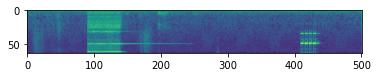

In [9]:
plotSpec(audio_log_mel[100])

In [4]:
class audio_tasks_encoder:
    def __init__(self, db_root, no_of_frames):
        self.db_root = db_root
        self.audio_hard_timestamp = pd.read_csv(db_root + '/meta.csv', sep='\t')
        self.audio_frame_label_path = os.path.join(db_root,'synth_frame_label')
        self.no_of_frames = no_of_frames
        self.audio_tag_path = os.path.join(self.db_root, 'synth_clip_label')


    def one_hot_encoding(self):
        integer_labeling = {key:value for (value,key) in enumerate(sorted(self.audio_hard_timestamp.event_label.unique()))}        # labeling the events as 0 to N
        one_hot_encoded_labels = tf.keras.utils.to_categorical([i for i in integer_labeling.values()],num_classes=len(integer_labeling))        # one hot encoding

        return integer_labeling, one_hot_encoded_labels


    def framelevel_label_ground_truth(self):
        integer_labeling, one_hot_encoded_labels = self.one_hot_encoding()
        
        self.audio_hard_timestamp[['starting_time_frame','stopping_time_frame']] = (((self.audio_hard_timestamp[['onset','offset']]*1000)+20)/20).apply(np.ceil).astype(np.int64)      
        audio_filenames = self.audio_hard_timestamp.filename.unique().tolist()
        no_of_classes = len(list(self.audio_hard_timestamp.event_label.unique()))
        self.audio_hard_timestamp = self.audio_hard_timestamp.set_index(keys=['filename','event_label'])
        framewise_encoded_labels = []
        for file in audio_filenames:
            specific_clip_label_chunk = self.audio_hard_timestamp.xs(file,level=0,drop_level=True).loc[:,['starting_time_frame','stopping_time_frame']]
            frame_labels = np.zeros((self.no_of_frames, no_of_classes))
            for row in specific_clip_label_chunk.iterrows():
                event_label = row[0]
                event_starting_time = row[1]['starting_time_frame']
                event_stopping_time = row[1]['stopping_time_frame']
                event_encoded = one_hot_encoded_labels[integer_labeling[event_label]]
                frame_labels[(event_starting_time-1):(event_stopping_time-1),:]+=event_encoded
            framewise_encoded_labels.append(frame_labels)
        np.save(self.audio_frame_label_path, framewise_encoded_labels)
        return np.ascontiguousarray(framewise_encoded_labels)


    def audio_tag_ground_truth(self):
        integer_labeling, one_hot_encoded_labels = self.one_hot_encoding()
        audio_filenames = self.audio_hard_timestamp.filename.unique().tolist()
        self.audio_hard_timestamp = self.audio_hard_timestamp.set_index(keys=['filename', 'event_label'])
        cliplevel_encoded_labels = []
        for file in audio_filenames:
            specific_clip_label_chunk_unique_labels = self.audio_hard_timestamp.xs(file,level=0).reset_index().event_label.unique().tolist()
            cliplevel_labels = np.zeros((len(integer_labeling)))
            for label in specific_clip_label_chunk_unique_labels:
                cliplevel_labels[integer_labeling[label]]+=1
            cliplevel_encoded_labels.append(cliplevel_labels)
        
        np.save(self.audio_tag_path, np.stack(cliplevel_encoded_labels))
        return np.ascontiguousarray(cliplevel_encoded_labels)


    def weak_label_encoder(self, weak_labels):
        weak_mlc_labels = []
        for label in list(weak_labels.event_labels):
            modf_labels = np.zeros((len(integer_labeling)),dtype=np.float32)
            label_keys = list(integer_labeling.keys())
            if label not in label_keys:
                label = label.split(',')
                for l in label:
                    modf_labels+=one_hot_encoded_labels[integer_labeling[l]]
                weak_mlc_labels.append(modf_labels)
            else:
                weak_mlc_labels.append(one_hot_encoded_labels[integer_labeling[label]])
        return np.ascontiguousarray(weak_mlc_labels)
            


In [8]:
audio_tasks = audio_tasks_encoder(db_root, 501)

In [6]:
framelevel_labels = audio_tasks.framelevel_label_ground_truth()
framelevel_labels[0].shape

(501, 10)

In [9]:
audio_tag = audio_tasks.audio_tag_ground_truth()
audio_tag[0].shape

(10,)

In [34]:
integer_labeling, one_hot_encoded_labels = audio_tasks.one_hot_encoding()

In [35]:
integer_labeling

{'Alarm_bell_ringing': 0,
 'Blender': 1,
 'Cat': 2,
 'Dishes': 3,
 'Dog': 4,
 'Electric_shaver_toothbrush': 5,
 'Frying': 6,
 'Running_water': 7,
 'Speech': 8,
 'Vacuum_cleaner': 9}